# Projeto MTR

0. Pegar o dataset de heart disease (e possivelmente de airbnb)
1. Manipular os dados para deixá-los prontos para treinamento por modelos de ML 
2. Pesquisar e escolher os modelos para serem testados (de preferência modelos que sabemos ter erros correlacionados)
3. Treinar modelos (tentar achar os melhores hiperparâmetros, usar validação cruzada de 5 ou 10 folds)
4. Construir assessores (treinados para tentar prever o erro dos modelos) (também tentar achar melhores hiperparâmetros):

    4.1. Um assessor para cada modelo (RandomForestRegressor ou algum outro)
    
    4.2. Um assessor multi-target para todos os modelos (RegressorChains (outputs relacionados) **e** Single Target Method (outputs independentes))
    
    4.3. Um assessor para cada "família" ou grupo de modelos de ML com erros correlacionados (RegressorChains)

5. Coletar resultados e tirar conclusões para apresentar

## Imports e funções

In [1]:
from utils import *
from MSVR import MSVR
from experiment_setup import ExpSetup, GroupedAssessor

D:\Users\pbsl\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Dataset

In [2]:
DIR = 'churn'

seed = 2133330296#randint(0, 4294967295)
print(seed)

2133330296


In [3]:
setup = ExpSetup(DIR, seed, 0)

Xa_train, Xa_train_norm, Xa_test, Xa_test_norm, ya_train, ya_test, pred_corrls, pred_corrls2, performs = setup.assessorData()

Nº de instâncias: 7043
[REGISTERED: DTREE]
[Training]

Accuracy:         0.9992
Recall:           0.9994
Precision:        0.9989
F1:               0.9992
AUROC:            1.0000
AUPR:             1.0000
1-maxProb média:  0.0008
1-maxProb dp:     0.0168

[Testing]

Accuracy:         0.7391
Recall:           0.5398
Precision:        0.4798
F1:               0.5080
AUROC:            0.6733
AUPR:             0.3745
1-maxProb média:  0.0007
1-maxProb dp:     0.0167

[REGISTERED: SGD]
[Training]

Accuracy:         0.7716
Recall:           0.8012
Precision:        0.7564
F1:               0.7782
AUROC:            0.8484
AUPR:             0.8241
1-maxProb média:  0.2514
1-maxProb dp:     0.1315

[Testing]

Accuracy:         0.7489
Recall:           0.7919
Precision:        0.4980
F1:               0.6114
AUROC:            0.8388
AUPR:             0.6145
1-maxProb média:  0.2403
1-maxProb dp:     0.1405

[REGISTERED: LR]
[Training]

Accuracy:         0.7792
Recall:           0.8193
Precision:

d:\Users\pbsl\Documents\GitHub\proj-mtr\experiment_setup.py:189: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(rdict)
d:\Users\pbsl\Documents\GitHub\proj-mtr\experiment_setup.py:198: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.75       0.76388889 0.875      ... 0.90277778 0.23611111 0.04166667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.Xb_train_norm.loc[:,continuous_cols] = scaler1.fit_transform(self.Xb_train_norm.loc[:,continuous_cols], self.yb_train)
d:\Users\pbsl\Documents\GitHub\proj-mtr\experiment_setup.py:202: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error 

[Training]

Accuracy:         0.9992
Recall:           0.9994
Precision:        0.9989
F1:               0.9992
AUROC:            1.0000
AUPR:             1.0000
1-maxProb média:  0.0008
1-maxProb dp:     0.0168

[Testing]

Accuracy:         0.6974
Recall:           0.6407
Precision:        0.4287
F1:               0.5137
AUROC:            0.7423
AUPR:             0.4387
1-maxProb média:  0.1187
1-maxProb dp:     0.1654

[REGISTERED: SVM_LINEAR]
[Training]

Accuracy:         0.7702
Recall:           0.8250
Precision:        0.7435
F1:               0.7821
AUROC:            0.8520
AUPR:             0.8256
1-maxProb média:  0.2262
1-maxProb dp:     0.1276

[Testing]

Accuracy:         0.7339
Recall:           0.8179
Precision:        0.4804
F1:               0.6053
AUROC:            0.8400
AUPR:             0.6271
1-maxProb média:  0.2194
1-maxProb dp:     0.1408

[REGISTERED: SVM_POLY]
[Training]

Accuracy:         0.9054
Recall:           0.9385
Precision:        0.8803
F1:            

In [4]:
ya_train_copy = ya_train.copy()
ya_test_copy = ya_test.copy()
pred_corrls_copy = pred_corrls.copy()
pred_corrls2_copy = pred_corrls2.copy()

# Assessors

#### Análise de correlações

Conjunto de Treinamento:

O conjunto de teste dos modelos base já é o conjunto de treinamento dos assessores.

In [5]:
groups = {}
model_names = ['lr', 'kan', 'sgd', 'svm_linear'] # ['dtree', 'xgb', 'knn'] #list(performs.keys())

ya_train = ya_train_copy[model_names]
ya_test = ya_test_copy[model_names]
pred_corrls = pred_corrls_copy.loc[model_names, model_names]
pred_corrls2 = pred_corrls2_copy.loc[model_names, model_names]

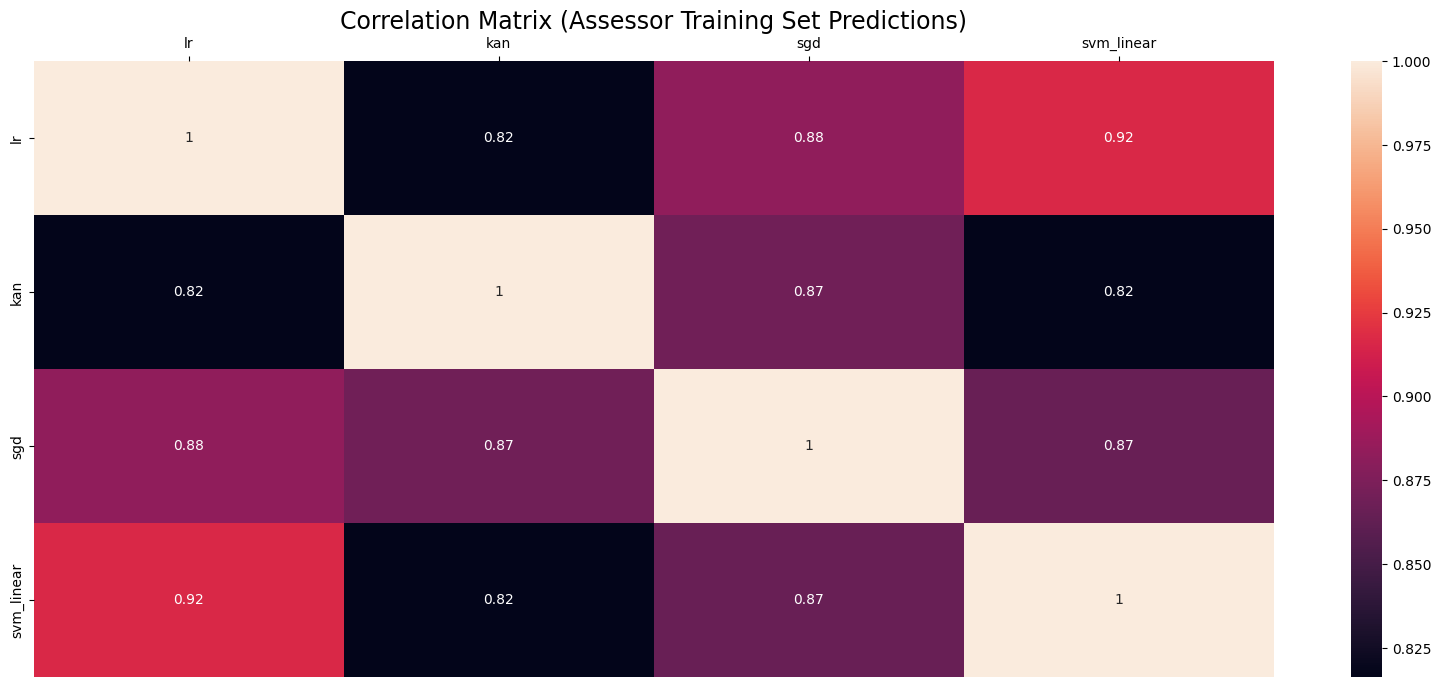

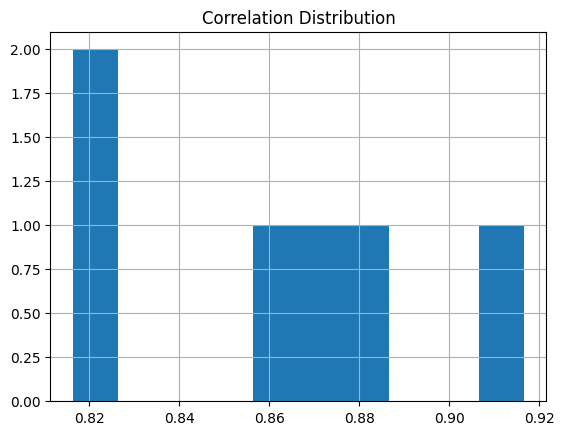

Training correlation distribution:
count    6.000000
mean     0.861177
std      0.039001
min      0.816338
25%      0.828882
50%      0.867475
75%      0.879248
max      0.916581
Name: corr, dtype: float64
[Saved image "cm_atrain.eps"]
[Saved image "cd_atrain.eps"]


In [6]:
correlation_matrix(pred_corrls, True, DIR, 'Assessor', 'Training')

In [7]:
MIN_SCORE = 0.85 #corrls_values['corr'].quantile(0.75)

print('Min_score:', MIN_SCORE)

groups['true_assessor_train'] = group_search(pred_corrls, MIN_SCORE)
groups['true_assessor_train']

Min_score: 0.85


[['lr', 'sgd', 'svm_linear'], ['kan', 'sgd']]

        Min_score: 0.65
        [['svm_rbf', 'svm_poly'],
        ['xgb', 'rforest', 'gb'],
        ['lr', 'kan', 'sgd', 'svm_linear', 'adab'],
        ['knn'],
        ['dtree'],
        ['mlp']] 

Conjunto de Teste:

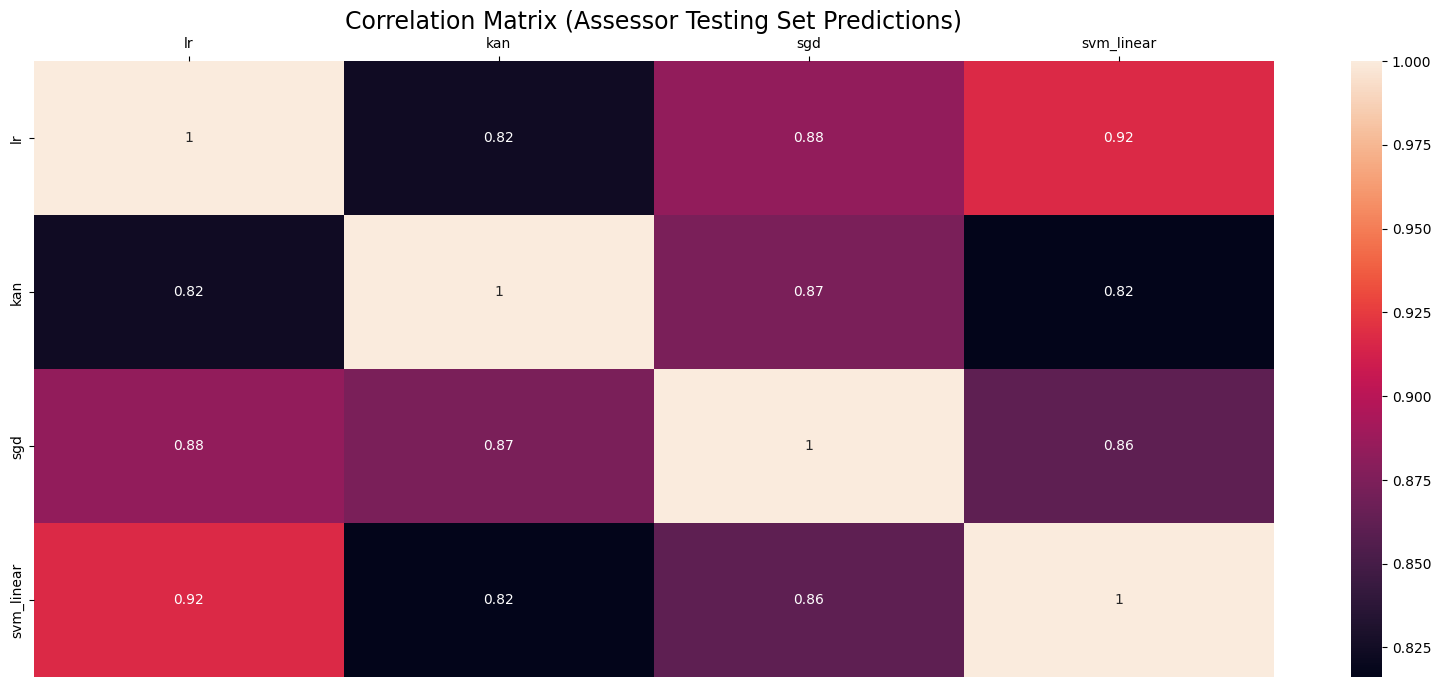

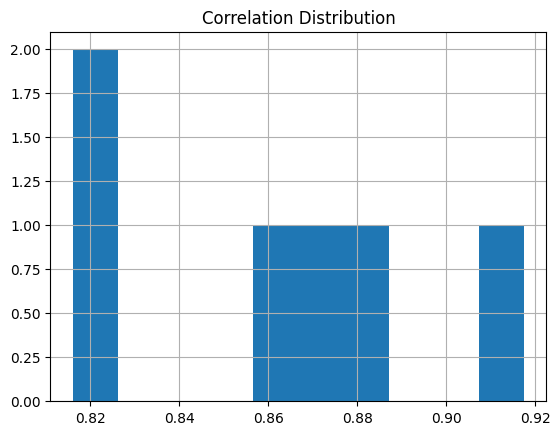

Testing correlation distribution:
count    6.000000
mean     0.862399
std      0.037956
min      0.816173
25%      0.833031
50%      0.866988
75%      0.880591
max      0.917409
Name: corr, dtype: float64
[Saved image "cm_atest.eps"]
[Saved image "cd_atest.eps"]


In [8]:
correlation_matrix(pred_corrls2, True, DIR, 'Assessor', 'Testing')

In [11]:
groups['true_assessor_test'] = group_search(pred_corrls2, MIN_SCORE)
groups['true_assessor_test']

[['lr', 'sgd', 'svm_linear'], ['kan', 'sgd']]

Diferença entre correlações do conjnuto de teste e de treinamento:
MSE:  0.0000
NMSE: 0.0024
MAE:  0.0021
NMAE: 0.0381
aRRMSE: 0.0486
aCC:  0.9993


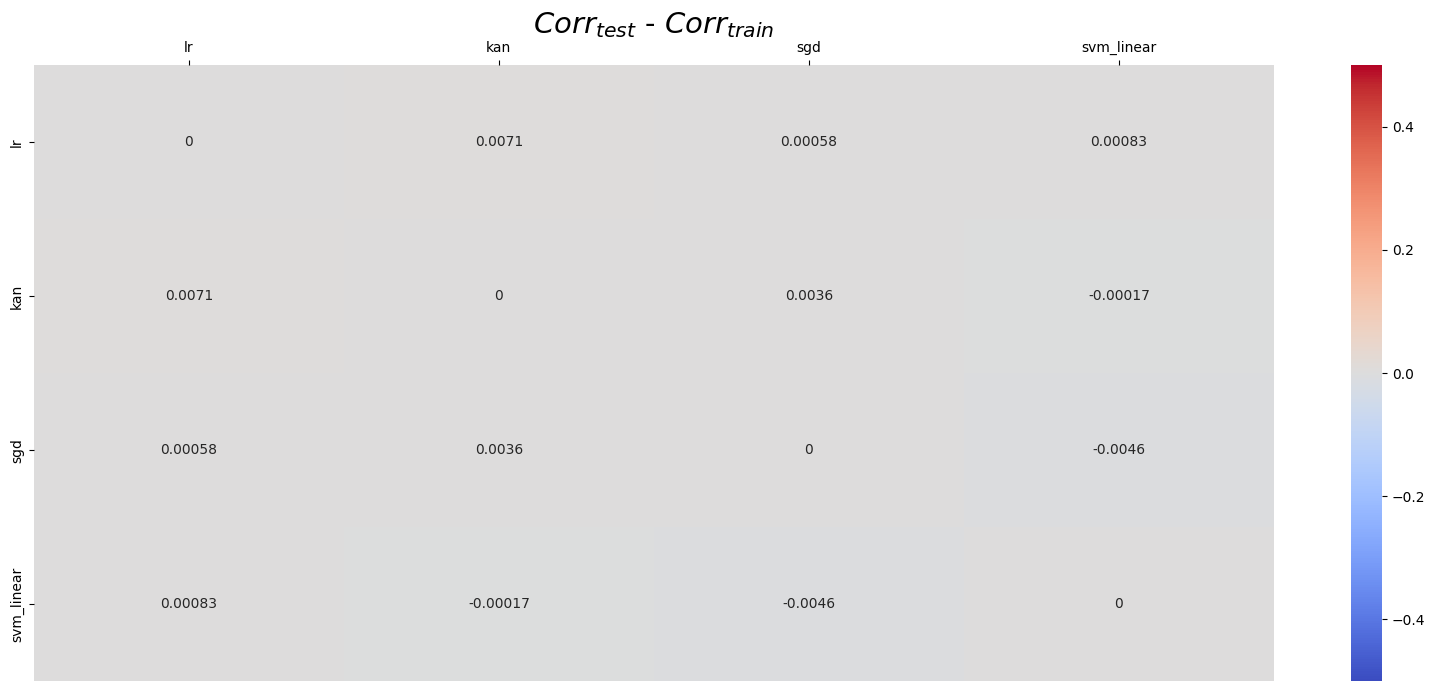

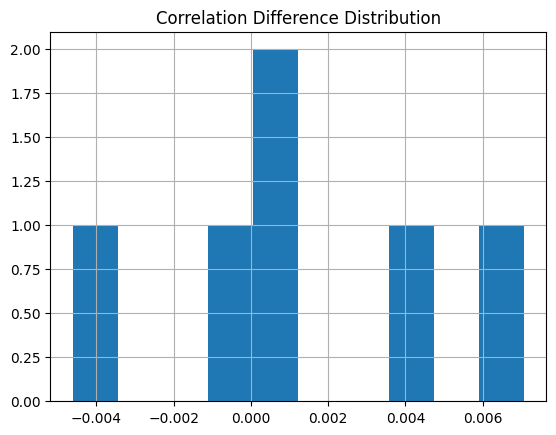

[Saved image "cmd_base.eps"]
[Saved image "cdd_base.eps"]


In [12]:
diff_corrls = pred_corrls2-pred_corrls
diff_corrls_values = corrlArray(diff_corrls)['corr']

print(f'''Diferença entre correlações do conjnuto de teste e de treinamento:
MSE:  {mse(pred_corrls, pred_corrls2):.4f}
NMSE: {nmse(pred_corrls, pred_corrls2):.4f}
MAE:  {mae(pred_corrls, pred_corrls2):.4f}
NMAE: {nmae(pred_corrls, pred_corrls2):.4f}
aRRMSE: {rrmse(pred_corrls, pred_corrls2):.4f}
aCC:  {corrCoeff(pred_corrls, pred_corrls2):.4f}''')

plt.figure(figsize=(20,8))
plt.title(r'$Corr_{test}$ - $Corr_{train}$', fontsize=21)
hm = sns.heatmap(diff_corrls, annot=True, cmap='coolwarm', vmin=-0.5, vmax=0.5)
hm.xaxis.tick_top()
plt.show(hm)

plt.title('Correlation Difference Distribution')
hg = diff_corrls_values.hist()
plt.show(hg)

save2figs(hm, hg, DIR)

## Globais

In [13]:
parameters = {'max_depth':[None,10,20,30],
                    'criterion':['squared_error', 'poisson', 'friedman_mse'],
                    'min_samples_split':[2,5,10,20,40,60],
                    'min_samples_leaf':[1,2,10,30],
                    'n_estimators':[20,50,100,150]}

In [14]:
# Criando o MultiIndex
multi_index = multIdx('ST','MRT','MRT(g)','M-SVR','M-SVR(g)','RC','RC(g)', subindex=model_names)

metrics_cols = ['MSE', 'MAE', 'NMSE', 'NMAE', 'aRRMSE', 'aCC']
metrics_df = pd.DataFrame(columns=metrics_cols, index=multi_index)
diff_metrics = pd.DataFrame(columns=metrics_cols, index=['ST','MRT','MRT(g)','M-SVR','M-SVR(g)','RC','RC(g)'])

### Regressor Chain
(RC)

In [16]:
#study = OptunaStudy(Xa_train, ya_train, 30, seed)
#
#study.search(RegressorChain, cv=5)
#
#rc_params = study.best_params
#regchain = RegressorChain(RandomForestRegressor(random_state=seed).set_params(**rc_params),
#                          random_state=seed, cv=5, verbose=True).fit(Xa_train, ya_train)

In [15]:
regchain = RegressorChain(RandomForestRegressor(random_state=seed), random_state=seed, cv=5,
                          verbose=True, order='random').fit(Xa_train, ya_train)

[Chain] ................... (1 of 4) Processing order 3, total=   0.8s
[Chain] ................... (2 of 4) Processing order 0, total=   1.1s
[Chain] ................... (3 of 4) Processing order 2, total=   1.2s
[Chain] ................... (4 of 4) Processing order 1, total=   1.4s


In [16]:
metrics_df.loc['RC',:] = assr_performance(regchain, Xa_test, ya_test, Xa_train, ya_train)

metrics_df.loc['RC',:]

[TRAINING SET]
MSE: 0.0218
NMSE: 0.3460
MAE: 0.0855
NMAE: 0.4015
aRRMSE: 0.5628
aCC: 0.8078

[TESTING SET]
MSE: 0.0372
NMSE: 0.5815
MAE: 0.1260
NMAE: 0.5832
aRRMSE: 0.7626
aCC: 0.6523


MSE       MAE      NMSE      NMAE    aRRMSE       aCC
Model                                                                 
lr          0.040188  0.591167  0.133254  0.594507  0.768874  0.644206
kan         0.037168  0.591912  0.123581  0.586229  0.769358  0.644486
sgd         0.032903  0.566096  0.118093  0.571083  0.752393  0.662237
svm_linear  0.038628  0.576955  0.129083  0.580858  0.759575  0.658345

#### Análise das correlações

Melhorar esse cálculo de correlação para fazer melhor uso do 1-(probabilidade da classe correta)

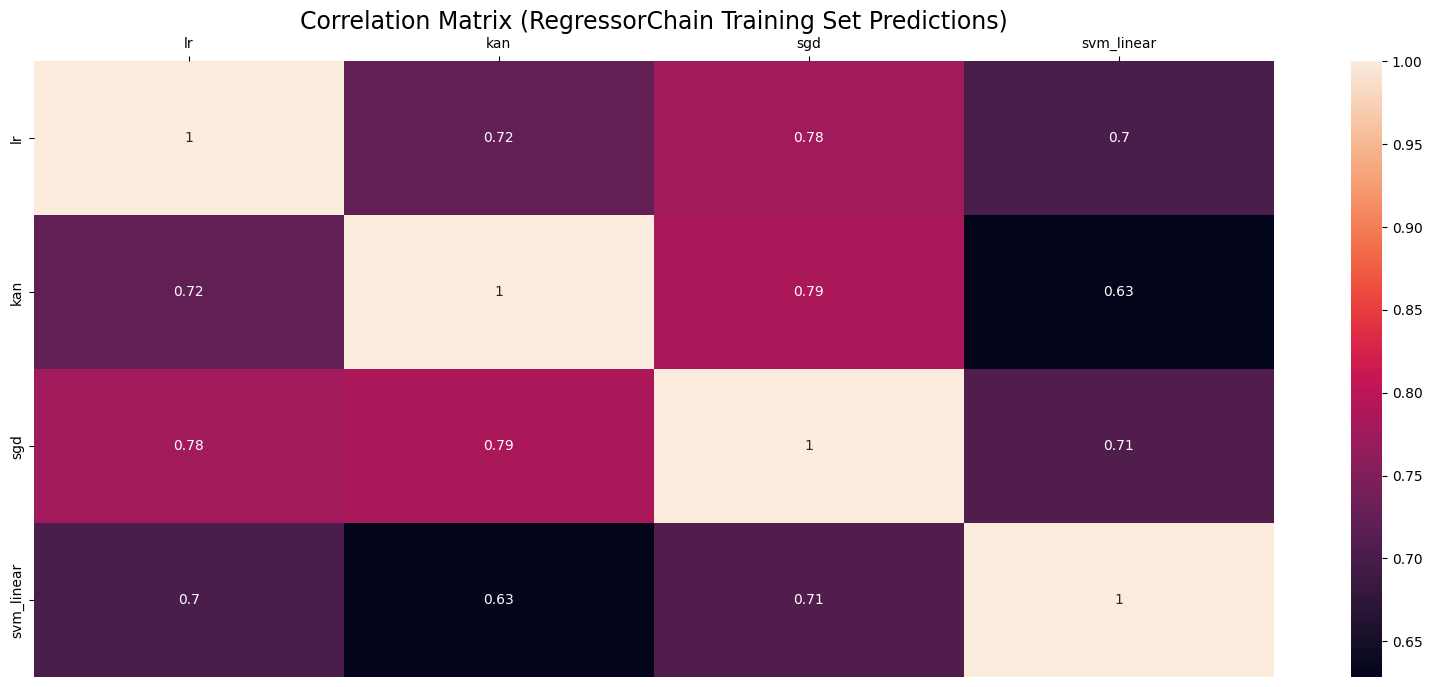

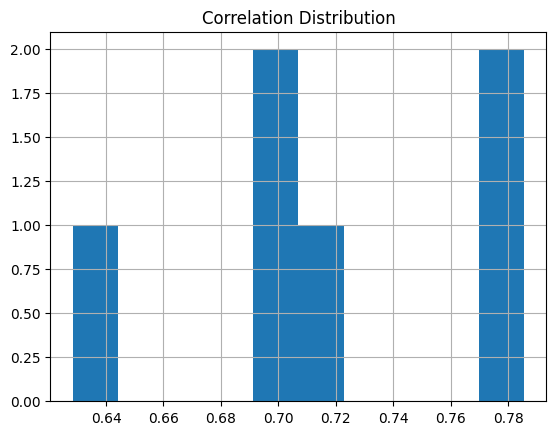

Training correlation distribution:
count    6.000000
mean     0.720453
std      0.057423
min      0.628511
25%      0.703548
50%      0.714202
75%      0.763808
max      0.785462
Name: corr, dtype: float64


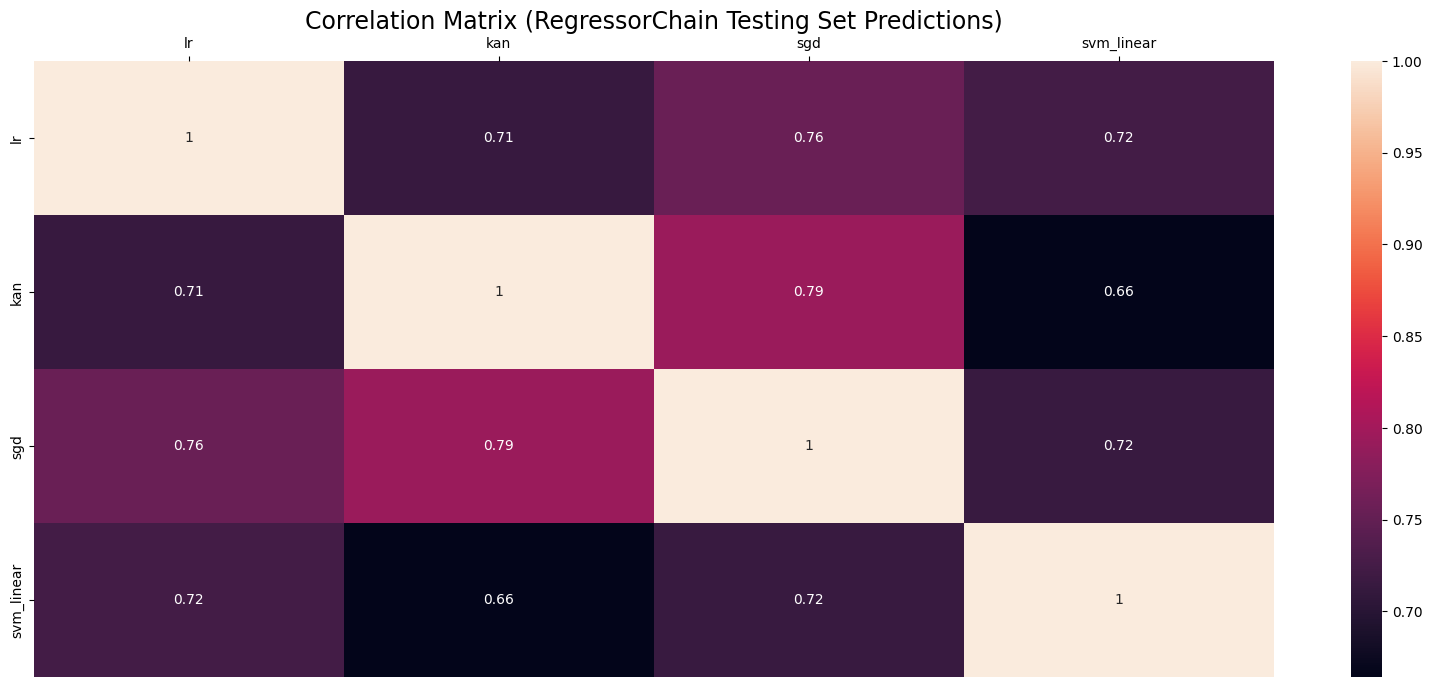

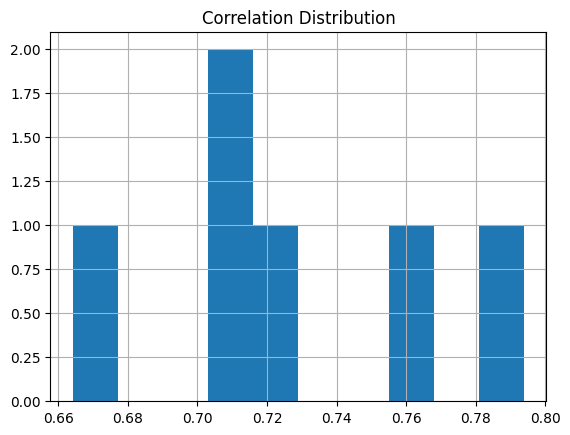

Testing correlation distribution:
count    6.000000
mean     0.727458
std      0.043747
min      0.664219
25%      0.713369
50%      0.719306
75%      0.747298
max      0.793900
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0146
NMSE: 0.1012
MAE: 3.4668
NMAE: 1.8372
aRRMSE: 1.8417
aCC: 0.9406


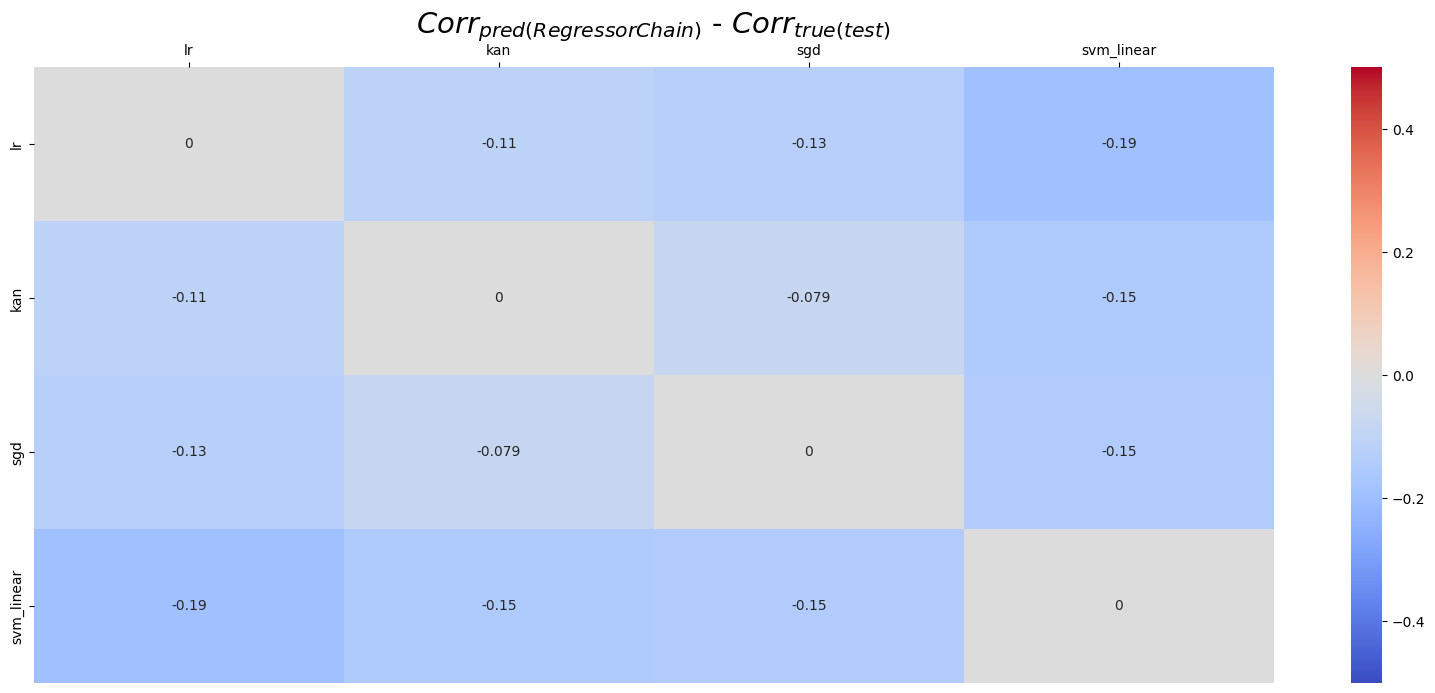

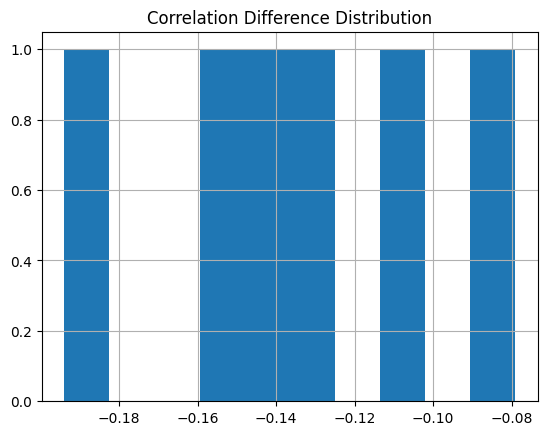

In [17]:
#regchain_corrls = pd.DataFrame(regchain.predict(Xa_train), 
#                               index=Xa_train.index,
#                               columns=model_names).corr('kendall') 

results = correlation_pred_performance(regchain, Xa_test, ya_test, Xa_train, 
                                       min_score=MIN_SCORE, name="RegressorChain",
                                       show_plot=True, save_plot=None)

In [18]:
diff_metrics.loc['RC',:] = results['results']
diff_metrics.loc['RC',:]

MSE       0.014611
MAE       0.101206
NMSE      3.466774
NMAE      1.837188
aRRMSE    1.841709
aCC       0.940557
Name: RC, dtype: object

In [19]:
groups['regchain_assessor'] = results['groups']
groups['regchain_assessor']['test']

[['lr'], ['kan'], ['sgd'], ['svm_linear']]

In [20]:
regchain=None

### Ensemble of Regressor Chains

In [57]:
num_chains = 10
rc_ac = f'RC[{num_chains}]'

rc_ests = [RegressorChain(base_estimator=RandomForestRegressor(random_state=seed),
                          random_state=seed+i,
                          order='random', cv=5) for i in range(num_chains)]

rc_plus = GroupedAssessor(rc_ests).fit(Xa_train, ya_train)

In [58]:
# keeping the concat because multiple numbers of chains could be recorded
if(rc_ac in metrics_df.index):
    metrics_df.loc[rc_ac,:] = assr_performance(rc_plus, Xa_test, ya_test, Xa_train, ya_train)
else:
    new_df = pd.DataFrame(assr_performance(rc_plus, Xa_test, ya_test, Xa_train, ya_train), 
                          columns=metrics_cols,
                          index=multIdx(rc_ac, subindex=model_names))

    metrics_df = pd.concat([metrics_df, new_df])
metrics_df.loc[rc_ac,:]

[TRAINING SET]
MSE: 0.0187
NMSE: 0.2965
MAE: 0.0843
NMAE: 0.3944
aRRMSE: 0.5404
aCC: 0.8485

[TESTING SET]
MSE: 0.0354
NMSE: 0.5528
MAE: 0.1246
NMAE: 0.5767
aRRMSE: 0.7434
aCC: 0.6703


MSE       MAE      NMSE      NMAE    aRRMSE       aCC
Model                                                                 
lr          0.038879  0.571907  0.132105   0.58938  0.756245   0.65624
kan         0.035189  0.560394  0.121432  0.576035  0.748595  0.665101
sgd         0.031081  0.534757  0.116127  0.561576  0.731271  0.682709
svm_linear  0.036427  0.544076  0.128813  0.579641  0.737615  0.677237

#### Análise das correlações

Melhorar esse cálculo de correlação para fazer melhor uso do 1-(probabilidade da classe correta)

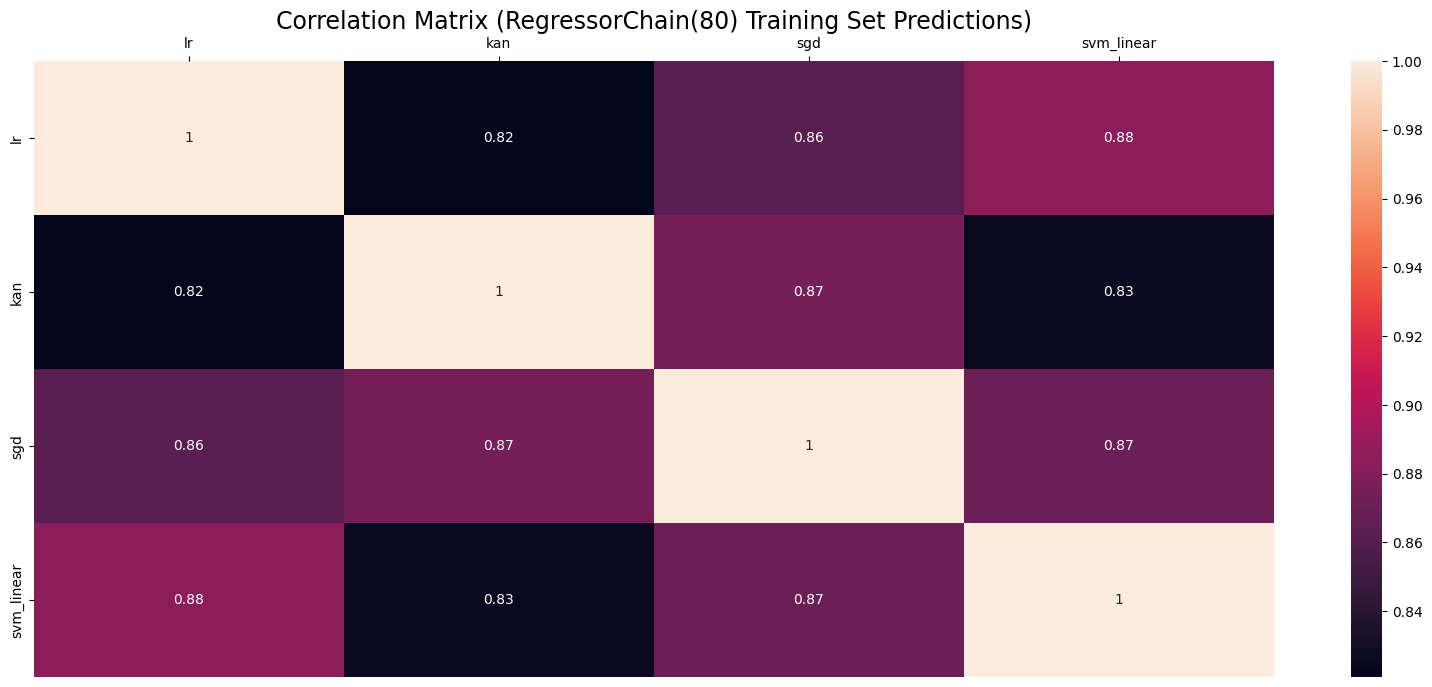

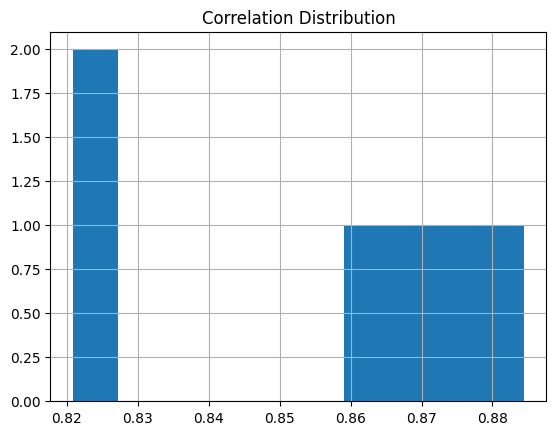

Training correlation distribution:
count    6.000000
mean     0.856418
std      0.026491
min      0.820860
25%      0.835292
50%      0.866354
75%      0.873268
max      0.884431
Name: corr, dtype: float64


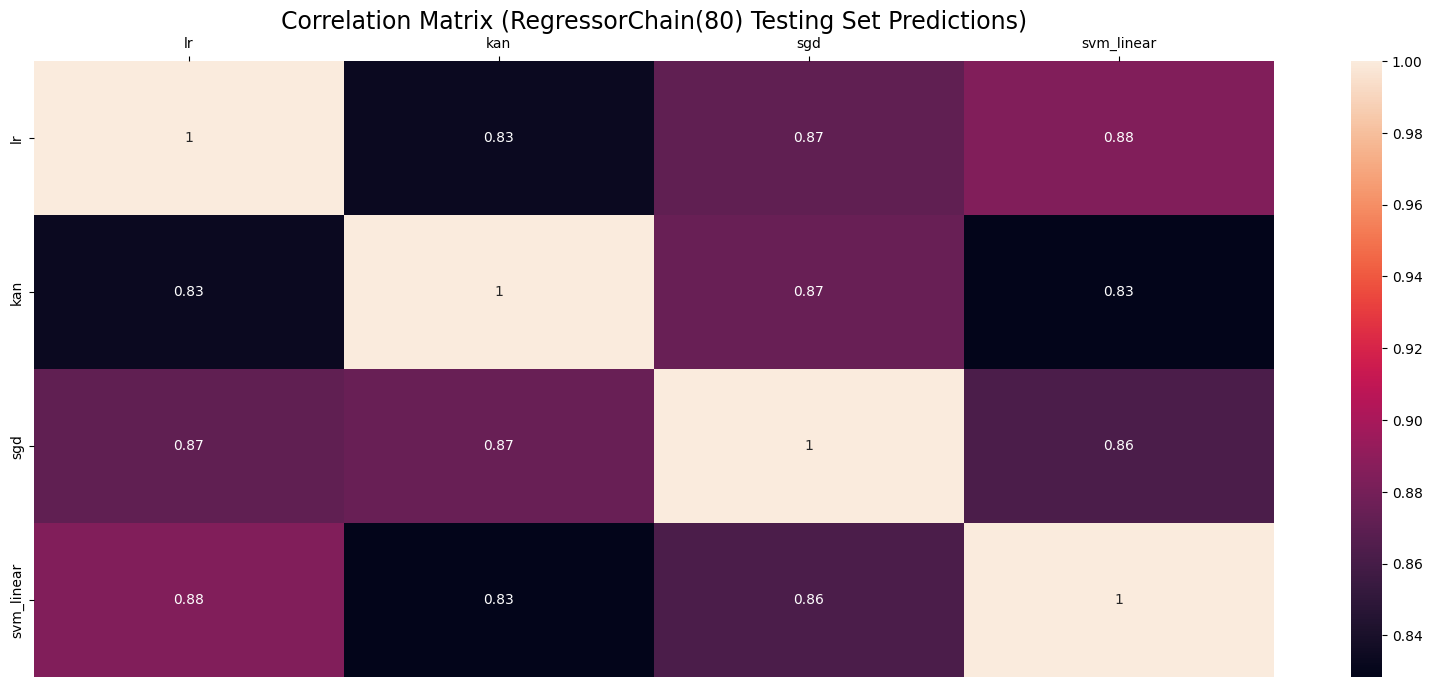

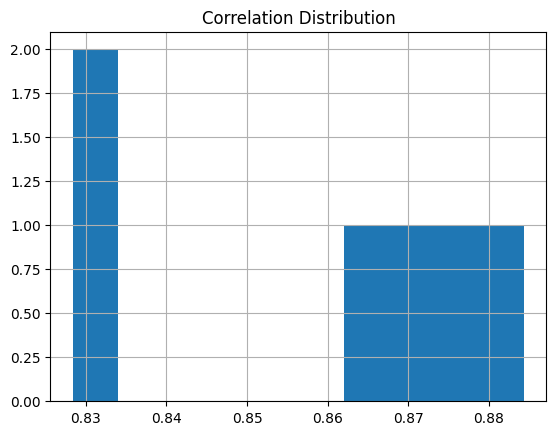

Testing correlation distribution:
count    6.000000
mean     0.859047
std      0.022850
min      0.828431
25%      0.840854
50%      0.866661
75%      0.873632
max      0.884323
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0002
NMSE: 0.0088
MAE: 0.0430
NMAE: 0.1576
aRRMSE: 0.1903
aCC: 0.9829


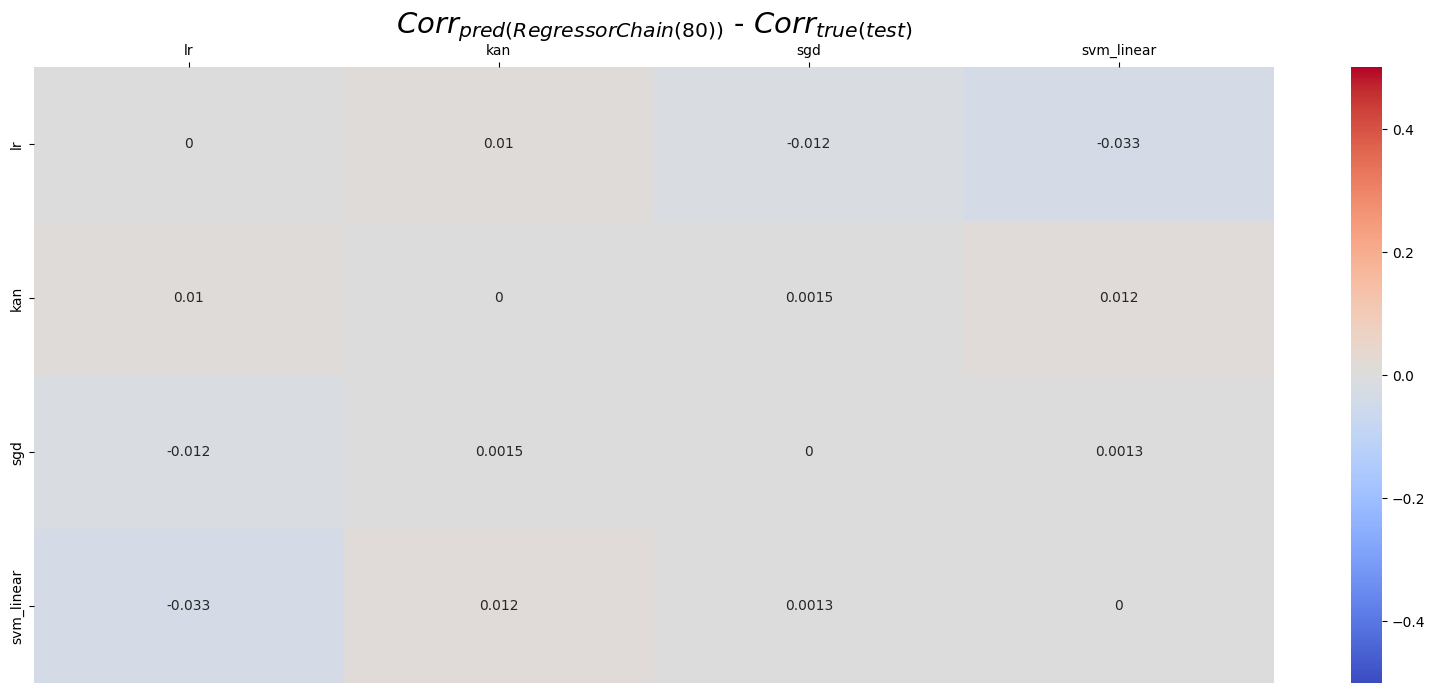

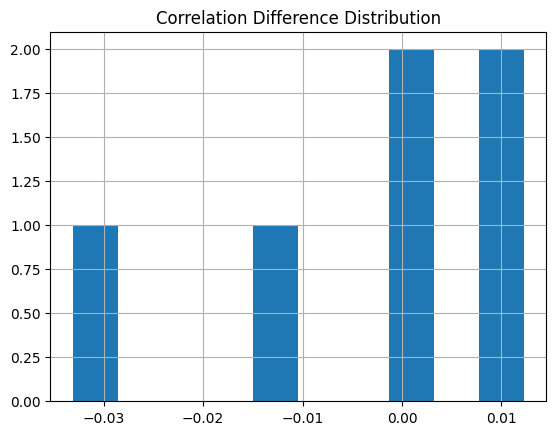

In [51]:
#regchain_corrls = pd.DataFrame(regchain.predict(Xa_train), 
#                               index=Xa_train.index,
#                               columns=model_names).corr('kendall') 
#80chains
results = correlation_pred_performance(rc_plus, Xa_test, ya_test, Xa_train, 
                                       min_score=MIN_SCORE, name=f"RegressorChain({num_chains})",
                                       show_plot=True, save_plot=None)

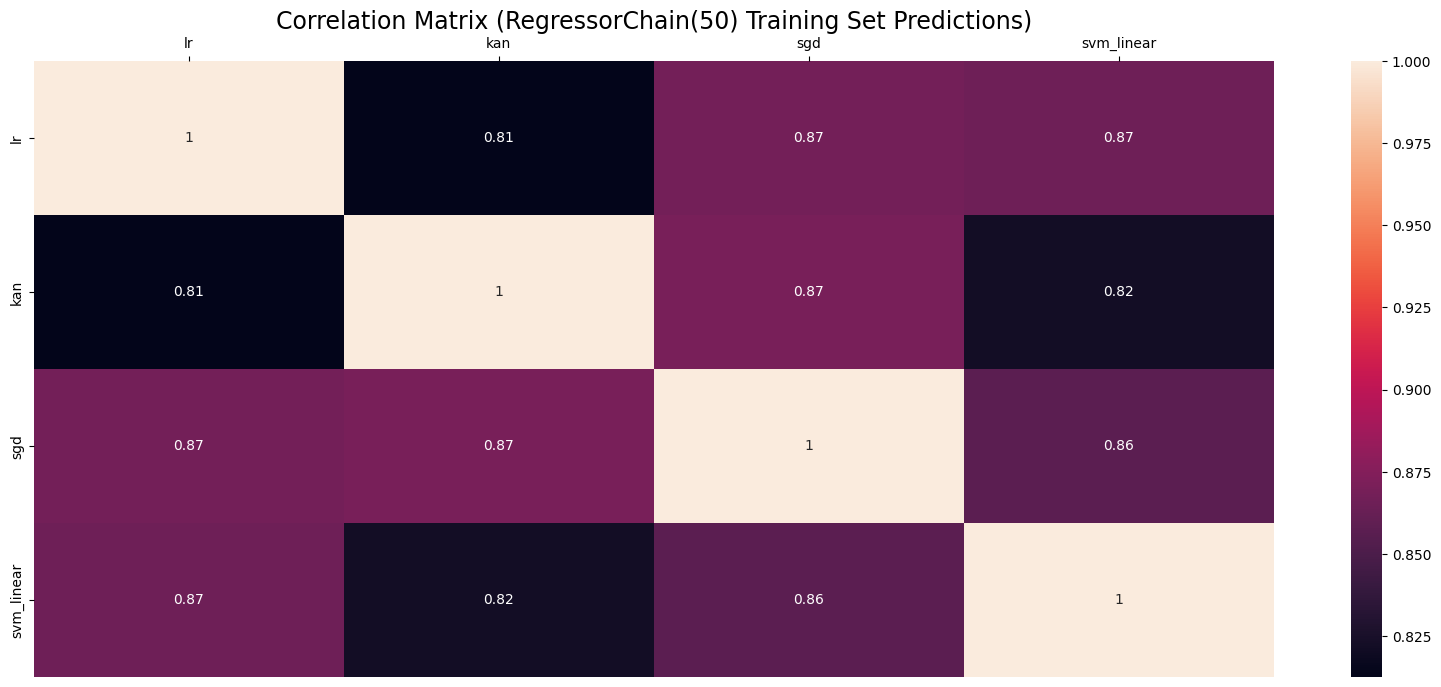

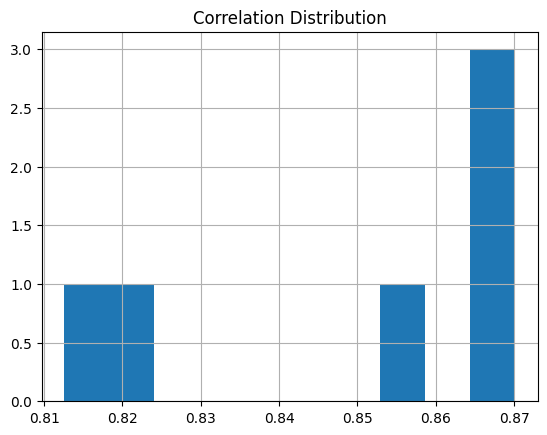

Training correlation distribution:
count    6.000000
mean     0.849125
std      0.025409
min      0.812565
25%      0.830370
50%      0.861388
75%      0.867271
max      0.870146
Name: corr, dtype: float64


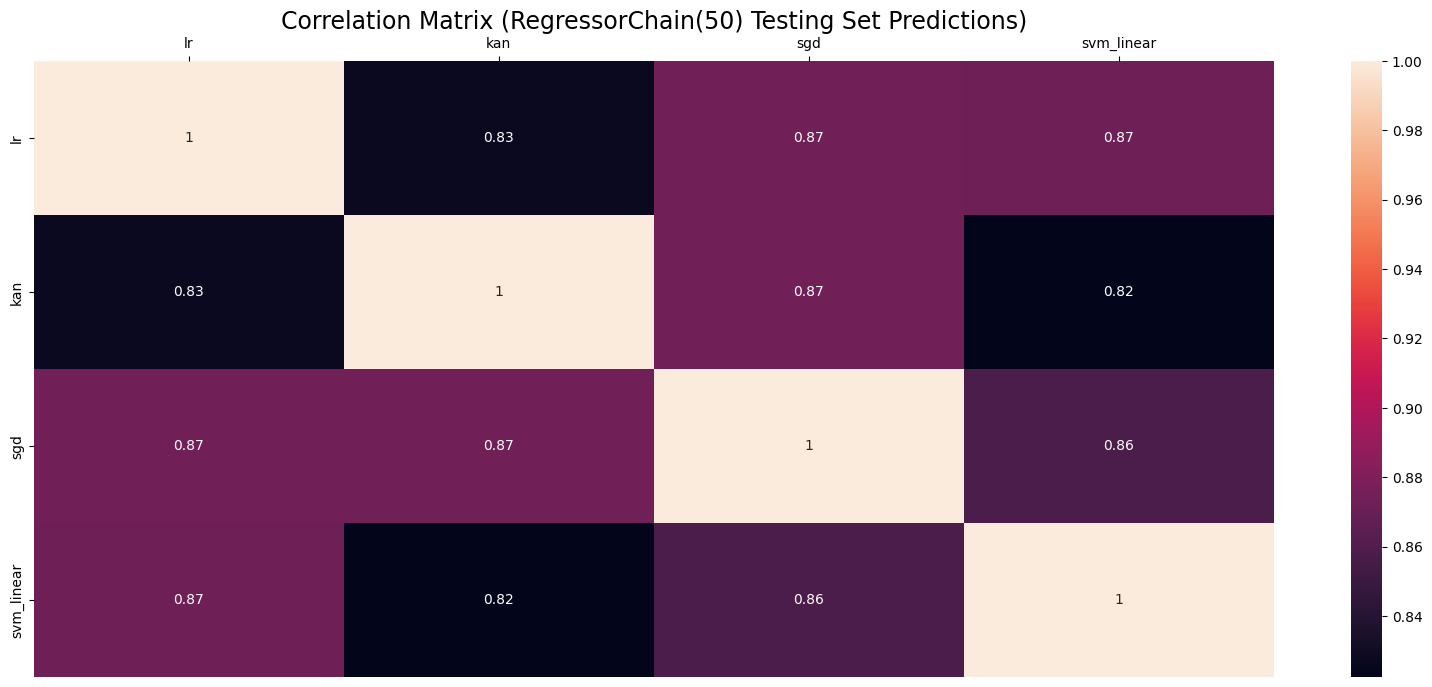

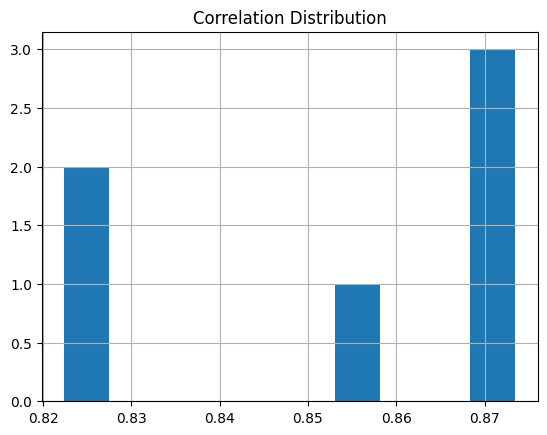

Testing correlation distribution:
count    6.000000
mean     0.854205
std      0.023765
min      0.822403
25%      0.834414
50%      0.864716
75%      0.872895
max      0.873464
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0003
NMSE: 0.0086
MAE: 0.0636
NMAE: 0.1553
aRRMSE: 0.2100
aCC: 0.9772


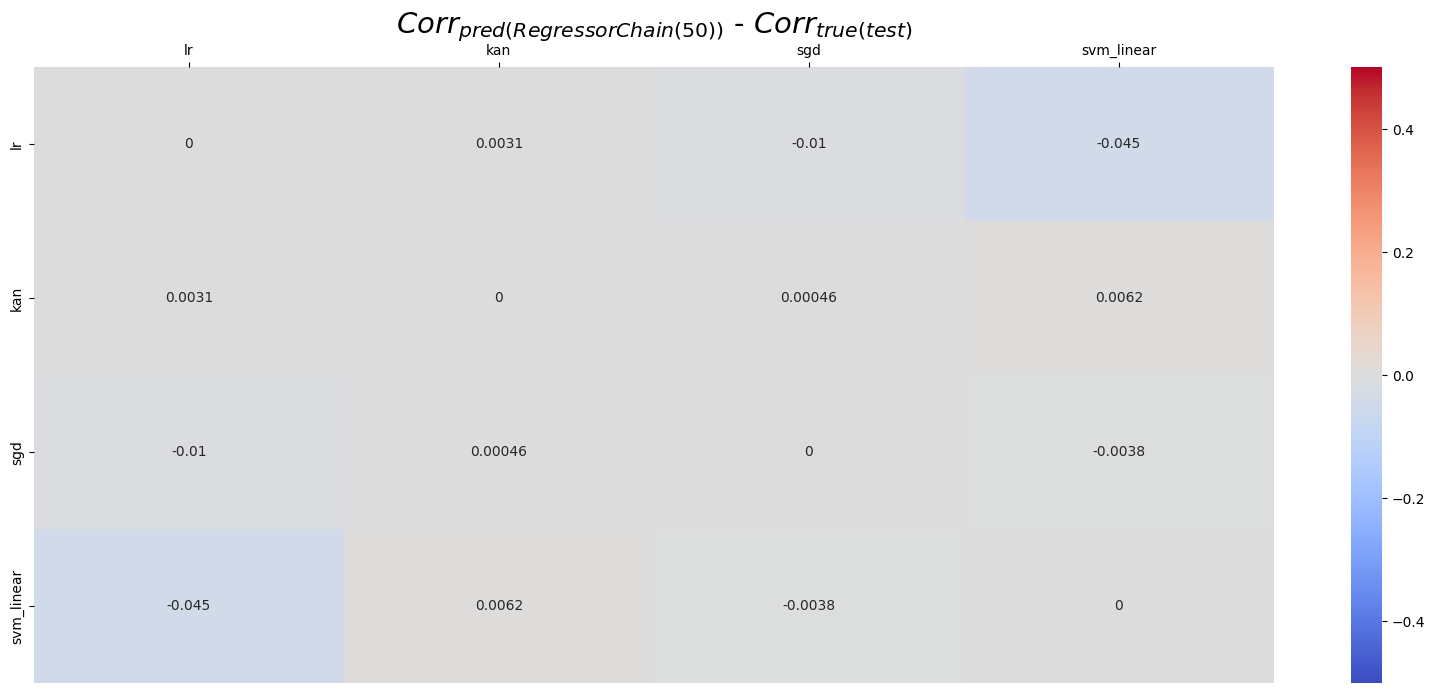

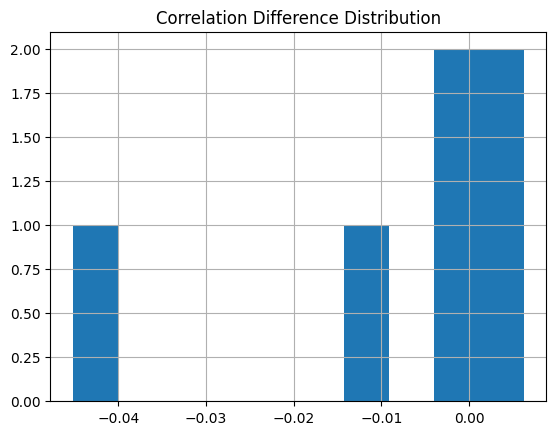

In [44]:
#regchain_corrls = pd.DataFrame(regchain.predict(Xa_train), 
#                               index=Xa_train.index,
#                               columns=model_names).corr('kendall') 
#50chains
results = correlation_pred_performance(rc_plus, Xa_test, ya_test, Xa_train, 
                                       min_score=MIN_SCORE, name=f"RegressorChain({num_chains})",
                                       show_plot=True, save_plot=None)

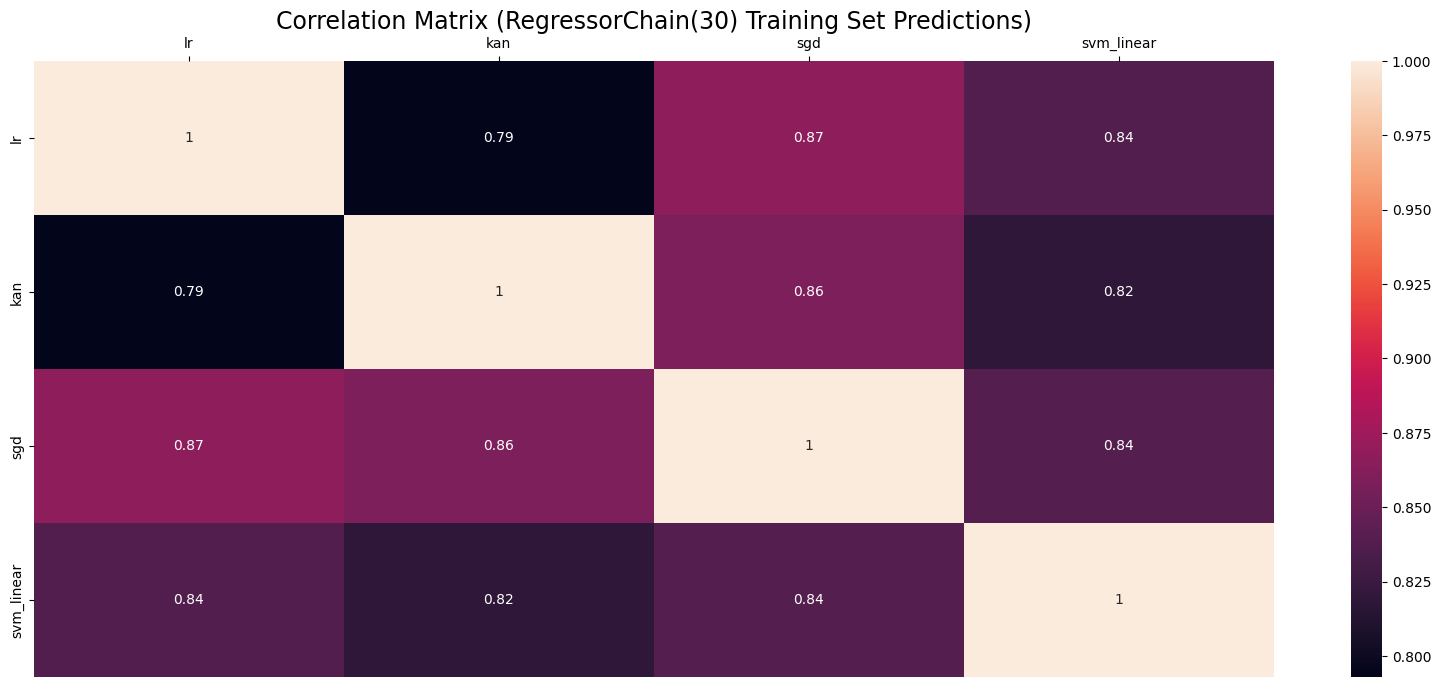

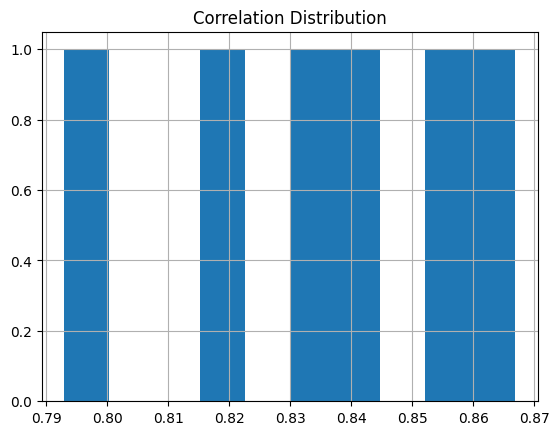

Training correlation distribution:
count    6.000000
mean     0.835387
std      0.026974
min      0.792940
25%      0.823070
50%      0.837643
75%      0.853661
max      0.866885
Name: corr, dtype: float64


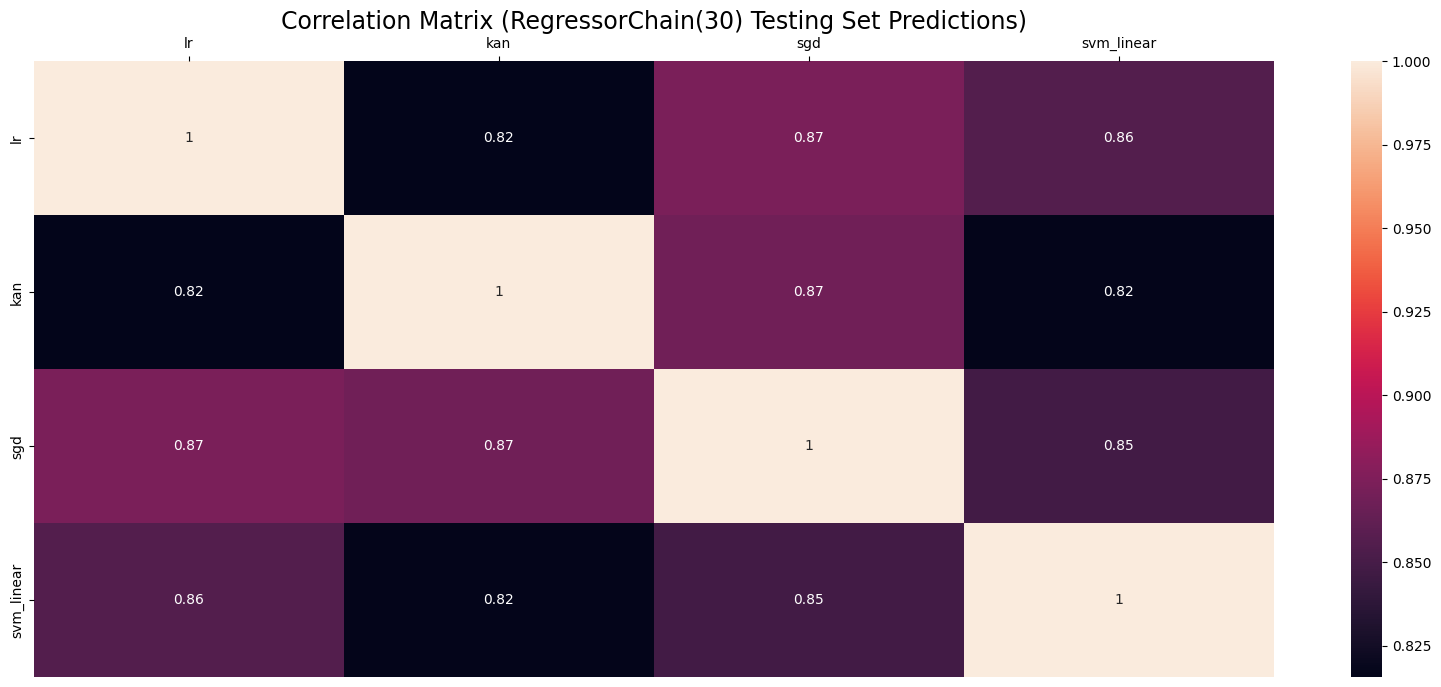

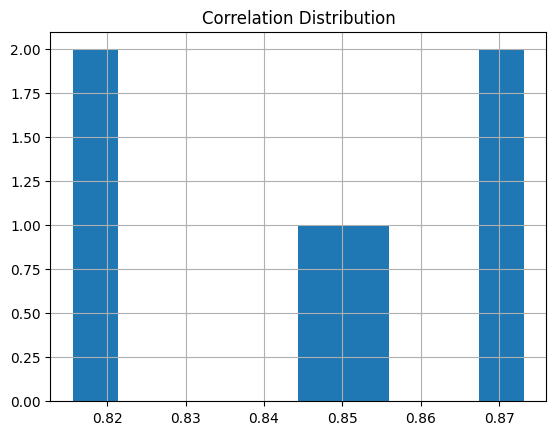

Testing correlation distribution:
count    6.000000
mean     0.846313
std      0.025060
min      0.815650
25%      0.824429
50%      0.851718
75%      0.865667
max      0.873142
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0005
NMSE: 0.0122
MAE: 0.1202
NMAE: 0.2219
aRRMSE: 0.2918
aCC: 0.9669


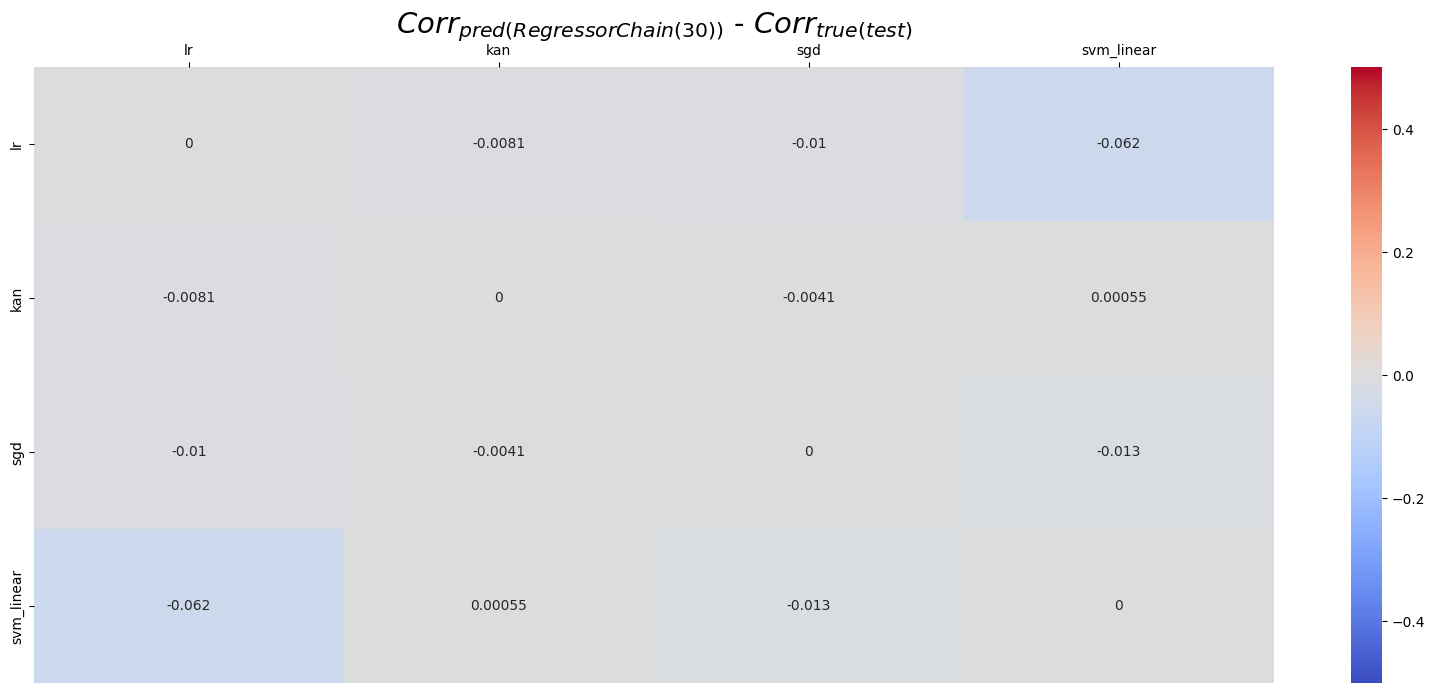

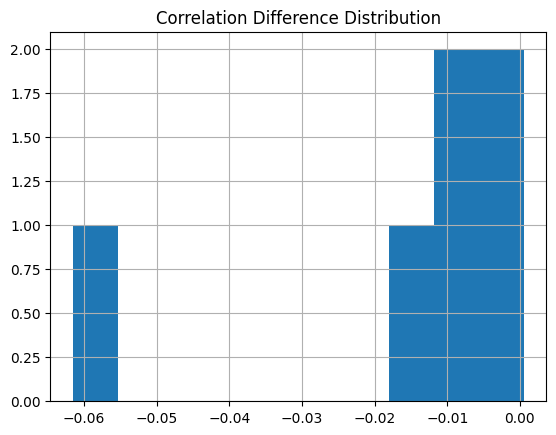

In [37]:
#regchain_corrls = pd.DataFrame(regchain.predict(Xa_train), 
#                               index=Xa_train.index,
#                               columns=model_names).corr('kendall') 
#30chains
results = correlation_pred_performance(rc_plus, Xa_test, ya_test, Xa_train, 
                                       min_score=MIN_SCORE, name=f"RegressorChain({num_chains})",
                                       show_plot=True, save_plot=None)

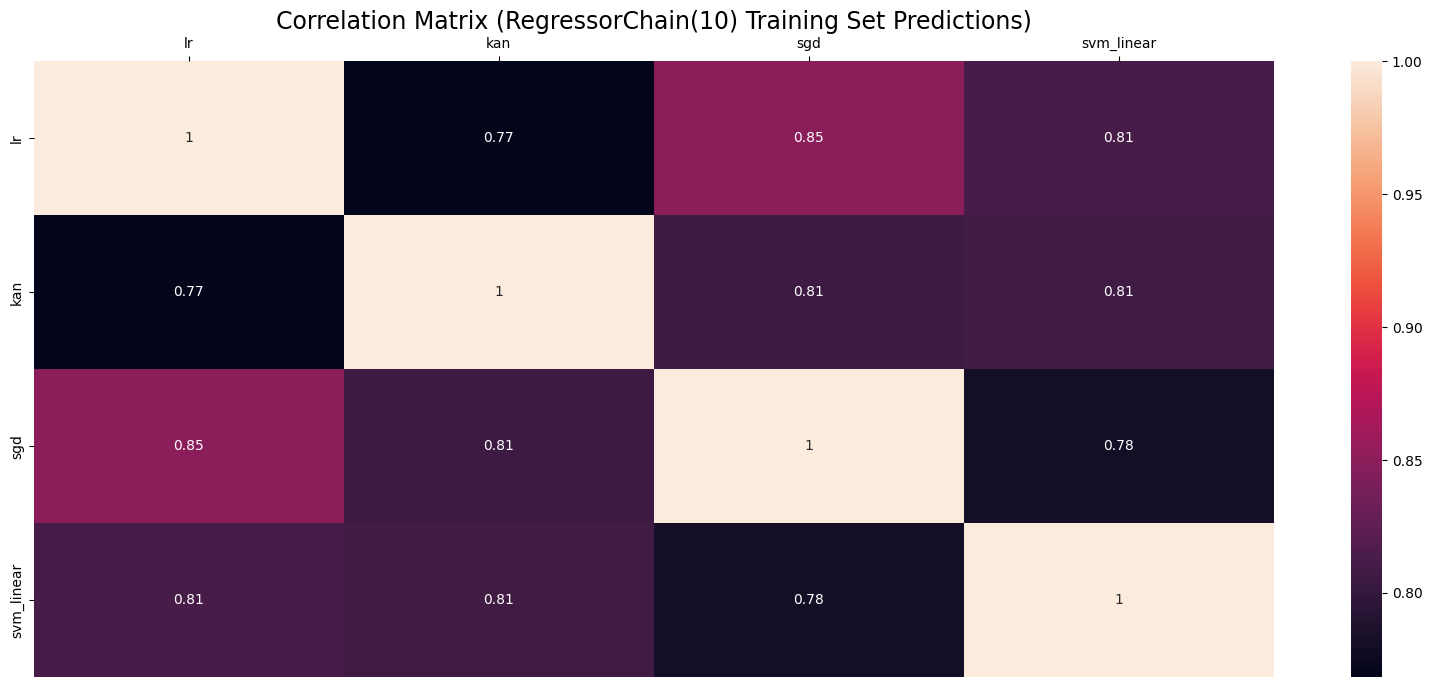

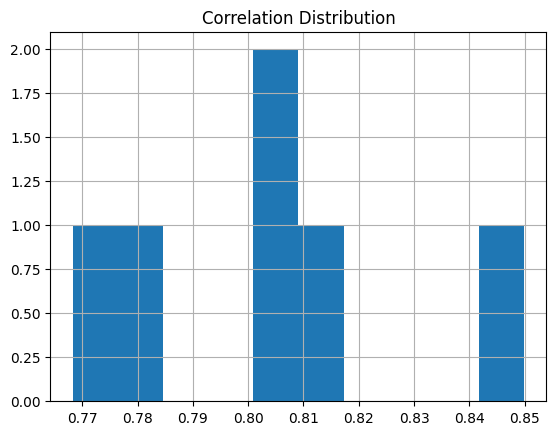

Training correlation distribution:
count    6.000000
mean     0.804082
std      0.028321
min      0.768322
25%      0.786851
50%      0.806488
75%      0.811385
max      0.849874
Name: corr, dtype: float64


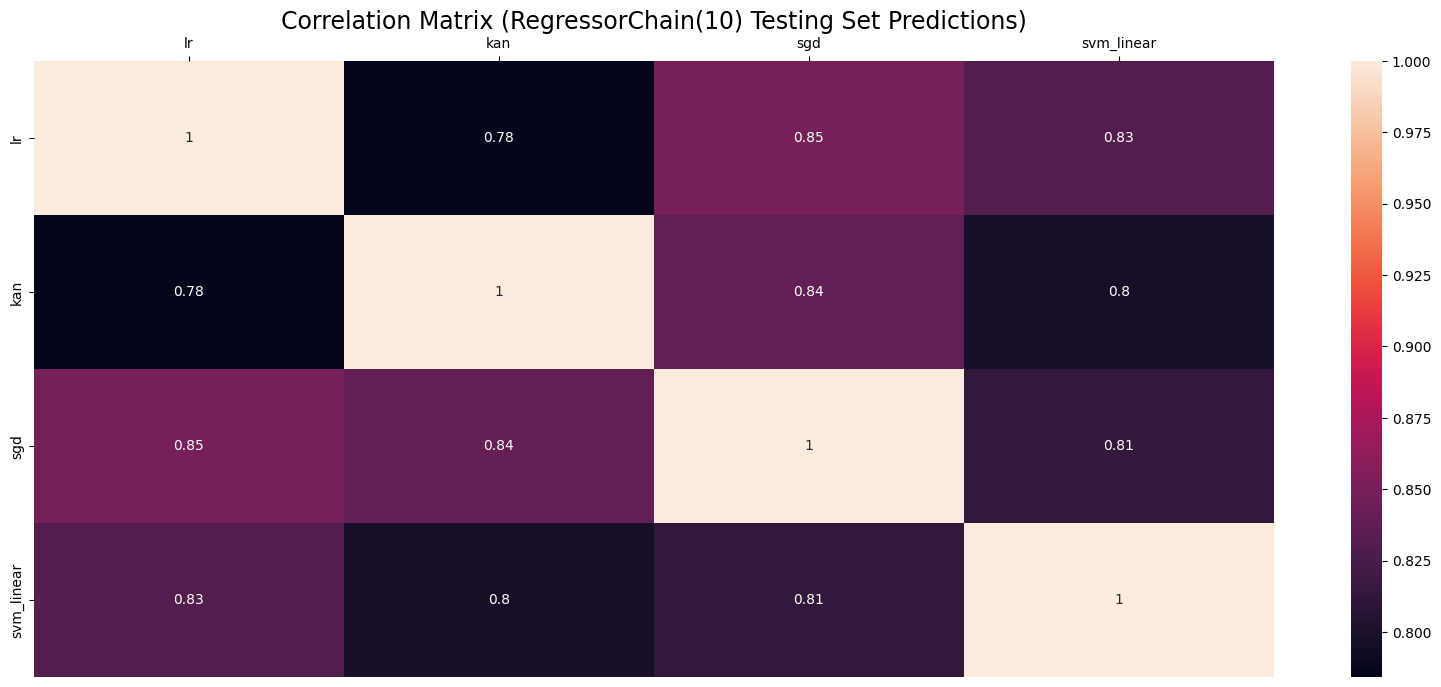

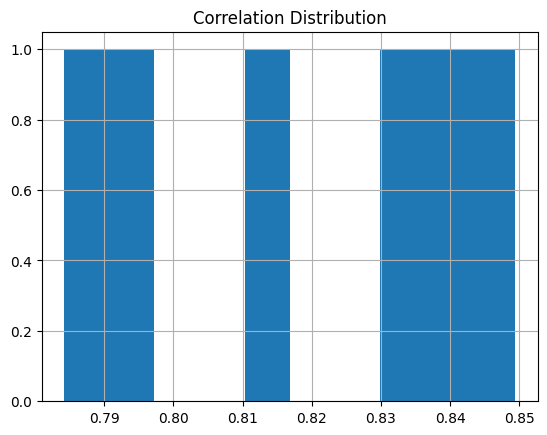

Testing correlation distribution:
count    6.000000
mean     0.819050
std      0.025346
min      0.784235
25%      0.801044
50%      0.822199
75%      0.837259
max      0.849397
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0017
NMSE: 0.0325
MAE: 0.4160
NMAE: 0.5940
aRRMSE: 0.6253
aCC: 0.9626


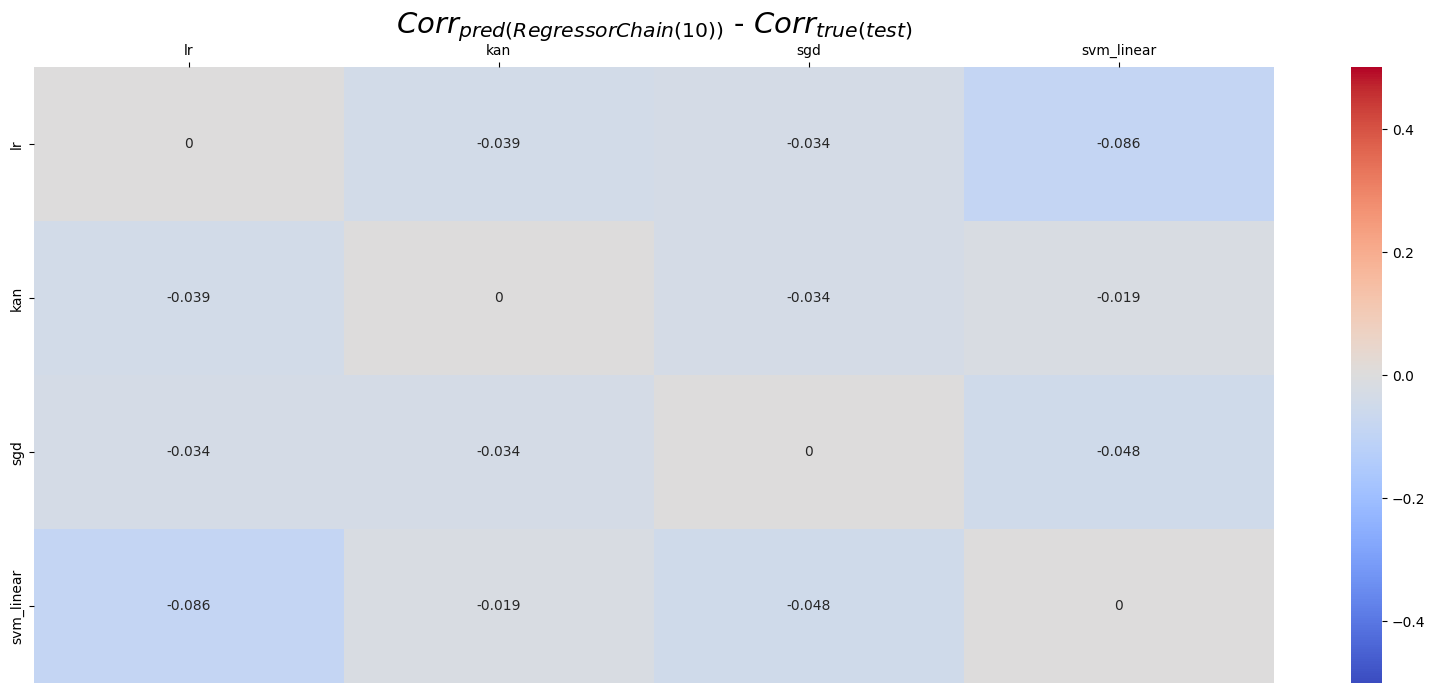

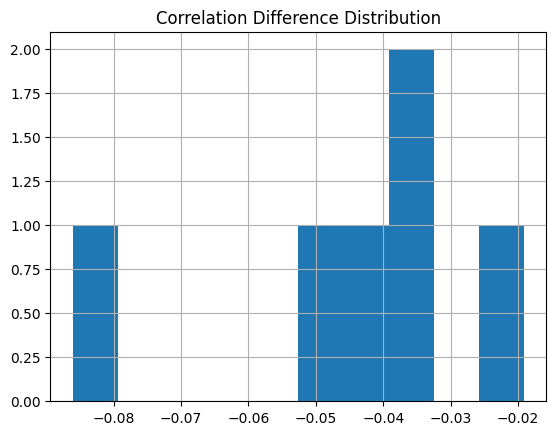

In [59]:
#regchain_corrls = pd.DataFrame(regchain.predict(Xa_train), 
#                               index=Xa_train.index,
#                               columns=model_names).corr('kendall') 
#10chains
results = correlation_pred_performance(rc_plus, Xa_test, ya_test, Xa_train, 
                                       min_score=MIN_SCORE, name=f"RegressorChain({num_chains})",
                                       show_plot=True, save_plot=None)

In [60]:
diff_metrics.loc[rc_ac,:] = results['results']
diff_metrics.loc[rc_ac,:]

MSE       0.001738
MAE       0.032512
NMSE      0.415974
NMAE      0.593957
aRRMSE    0.625252
aCC       0.962595
Name: RC[10], dtype: object

In [61]:
groups[f'regchain{num_chains}_assessor'] = results['groups']
groups[f'regchain{num_chains}_assessor']['test']

[['lr'], ['kan'], ['sgd'], ['svm_linear']]

In [ ]:
rc_plus = None

### Multi-Output Random Forest Regressor 

In [19]:
mrf = RandomForestRegressor(random_state=seed).fit(Xa_train, ya_train)

In [20]:
metrics_df.loc['MRT',:] = assr_performance(mrf, Xa_test, ya_test, Xa_train, ya_train)

[TRAINING SET]
MSE: 0.0103
NMSE: 0.0998
MAE: 0.0670
NMAE: 0.2609
aRRMSE: 0.3143
aCC: 0.9667

[TESTING SET]
MSE: 0.0775
NMSE: 0.7410
MAE: 0.1885
NMAE: 0.7196
aRRMSE: 0.8577
aCC: 0.5131


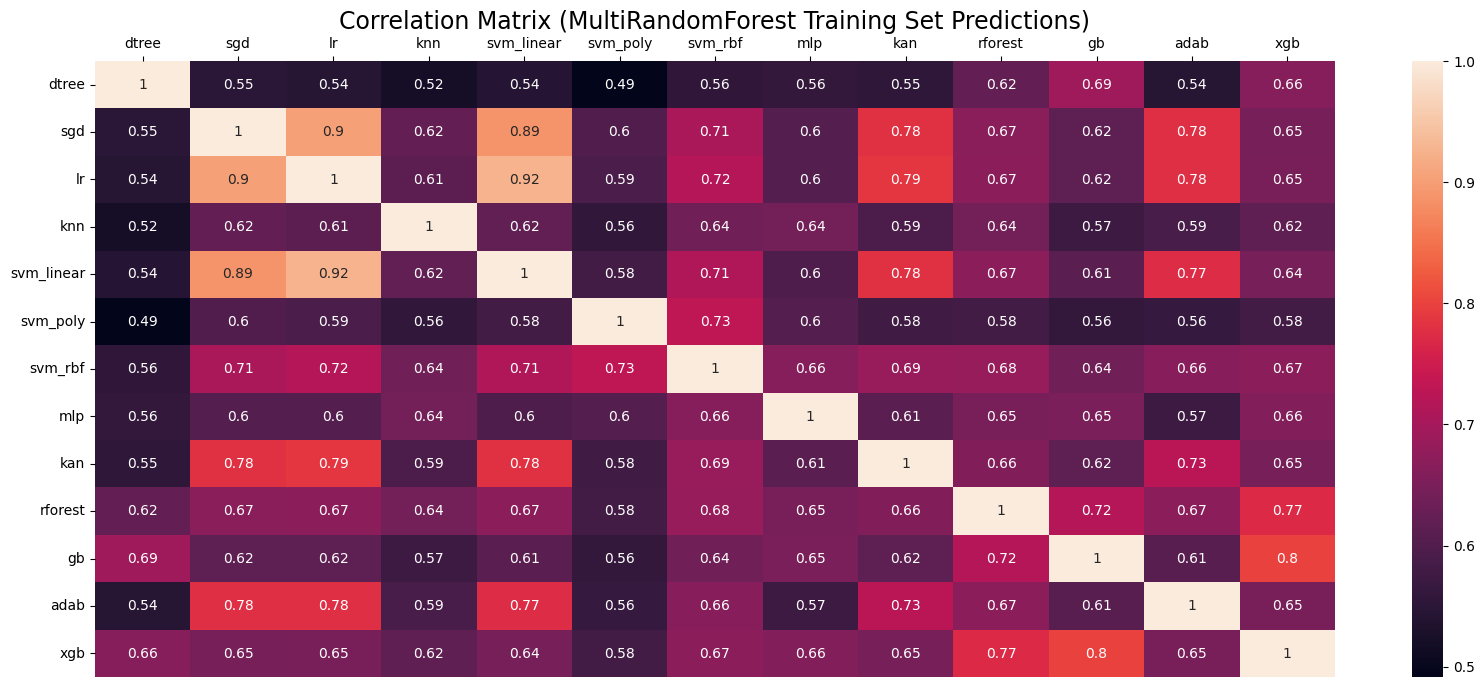

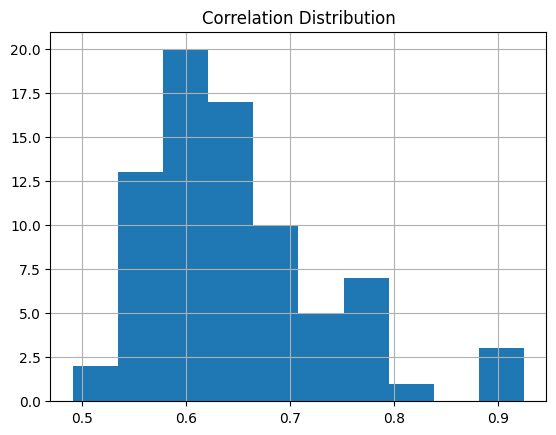

Training correlation distribution:
count    78.000000
mean      0.649394
std       0.086184
min       0.491501
25%       0.592814
50%       0.639770
75%       0.680961
max       0.924809
Name: corr, dtype: float64


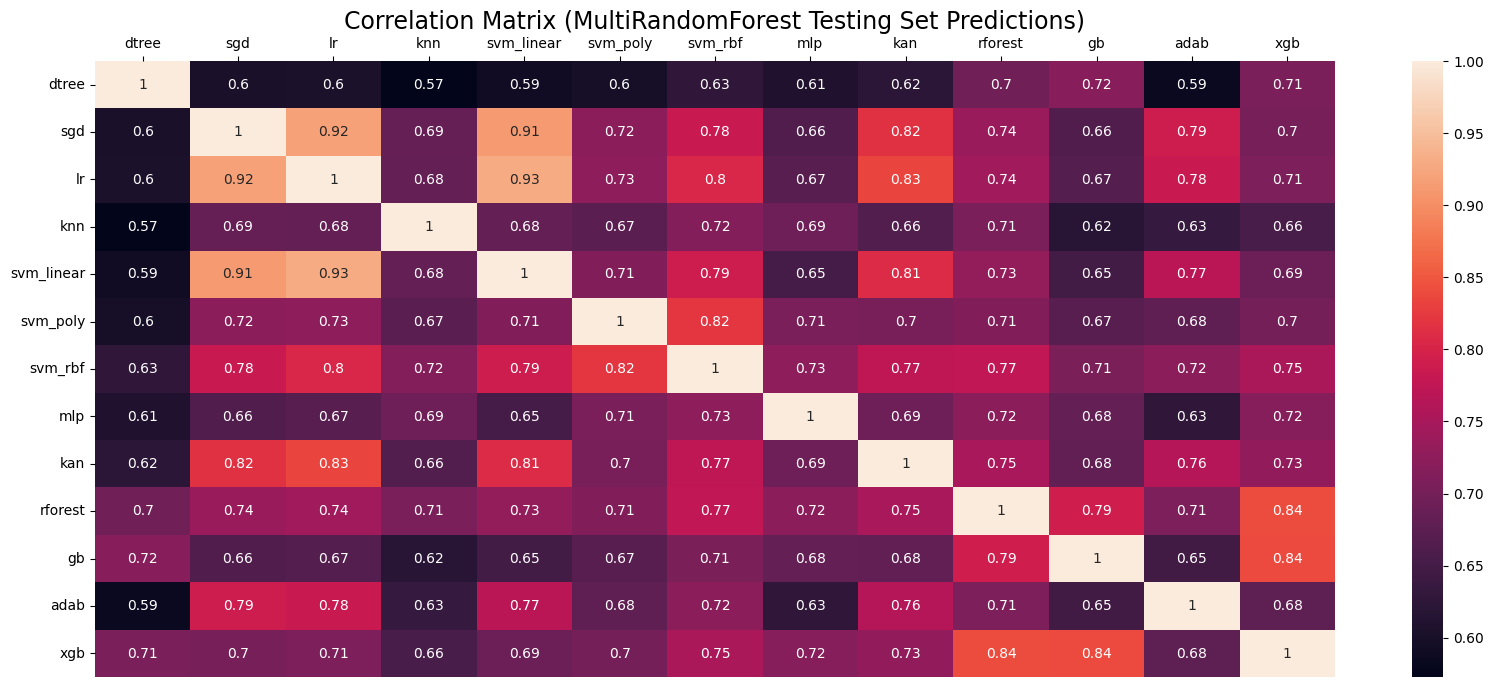

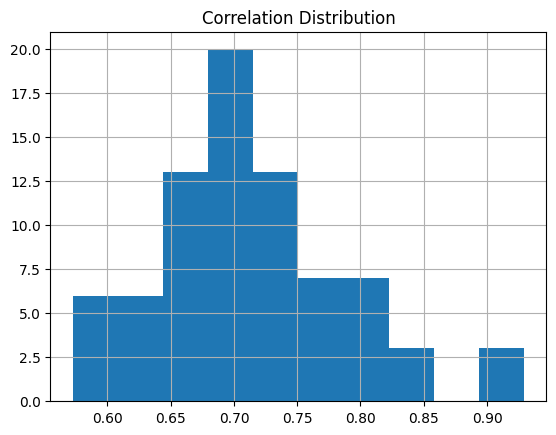

Testing correlation distribution:
count    78.000000
mean      0.713229
std       0.075439
min       0.572807
25%       0.667190
50%       0.705275
75%       0.751300
max       0.929167
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0288
NMSE: 0.1528
MAE: 1.2063
NMAE: 1.4591
aRRMSE: 1.0786
aCC: 0.9710


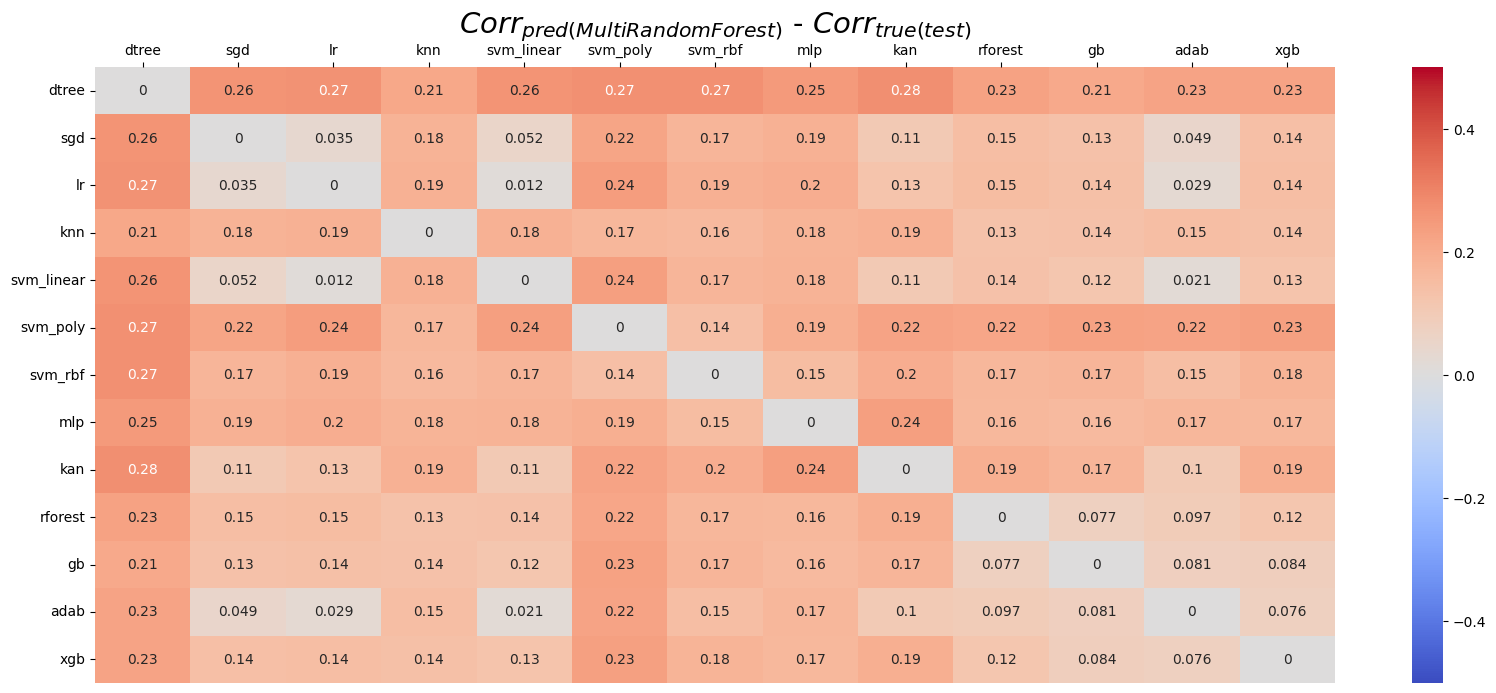

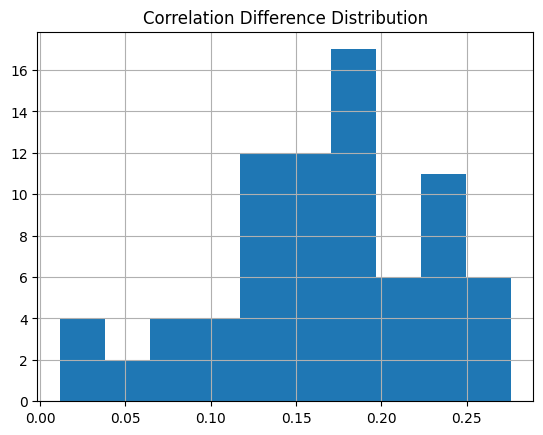

In [21]:
results = correlation_pred_performance(mrf, Xa_test, ya_test, Xa_train, 
                                       MIN_SCORE, name="MultiRandomForest")

In [22]:
diff_metrics.loc['MRT',:] = results['results']
diff_metrics.loc['MRT',:]

MSE       0.028811
MAE       0.152754
NMSE      1.206294
NMAE      1.459116
aRRMSE    1.078645
aCC       0.970998
Name: MRT, dtype: object

In [23]:
groups['mrf_assessor'] = results['groups']
groups['mrf_assessor']['test']

[['lr',
  'rforest',
  'svm_rbf',
  'svm_linear',
  'xgb',
  'kan',
  'svm_poly',
  'knn',
  'sgd'],
 ['lr',
  'rforest',
  'svm_rbf',
  'svm_linear',
  'xgb',
  'kan',
  'adab',
  'svm_poly',
  'sgd'],
 ['mlp', 'lr', 'rforest', 'svm_rbf', 'xgb', 'kan', 'svm_poly', 'gb', 'sgd'],
 ['mlp', 'lr', 'rforest', 'svm_rbf', 'xgb', 'kan', 'svm_poly', 'knn', 'sgd'],
 ['xgb', 'rforest', 'dtree', 'gb']]

### Multi-Output SVR

In [24]:
#msvr = MSVR()
#msvr.fit(np.asarray(Xa_train_norm), np.asarray(ya_train))
#msvr_params = product(svm_rbf_params)
#g_search = GridSearchCV(MSVR(), svm_rbf_params, scoring='neg_mean_squared_error', n_jobs=-1).fit(np.asarray(Xa_train_norm), np.asarray(ya_train))
#print(g_search.best_params_)
#msvr = g_search.best_estimator_

In [25]:
#study_norm = OptunaStudy(Xa_train_norm, ya_train.values, 200)
#study_norm.search(MSVR)

In [26]:
msvr = MSVR().fit(Xa_train_norm, ya_train.values)

In [27]:
metrics_df.loc['M-SVR',:] = assr_performance(msvr, Xa_test_norm, ya_test, Xa_train_norm, ya_train)

[TRAINING SET]
MSE: 0.0638
NMSE: 0.6471
MAE: 0.1816
NMAE: 0.7493
aRRMSE: 0.8012
aCC: 0.5936

[TESTING SET]
MSE: 0.0738
NMSE: 0.7293
MAE: 0.1958
NMAE: 0.7884
aRRMSE: 0.8510
aCC: 0.5121


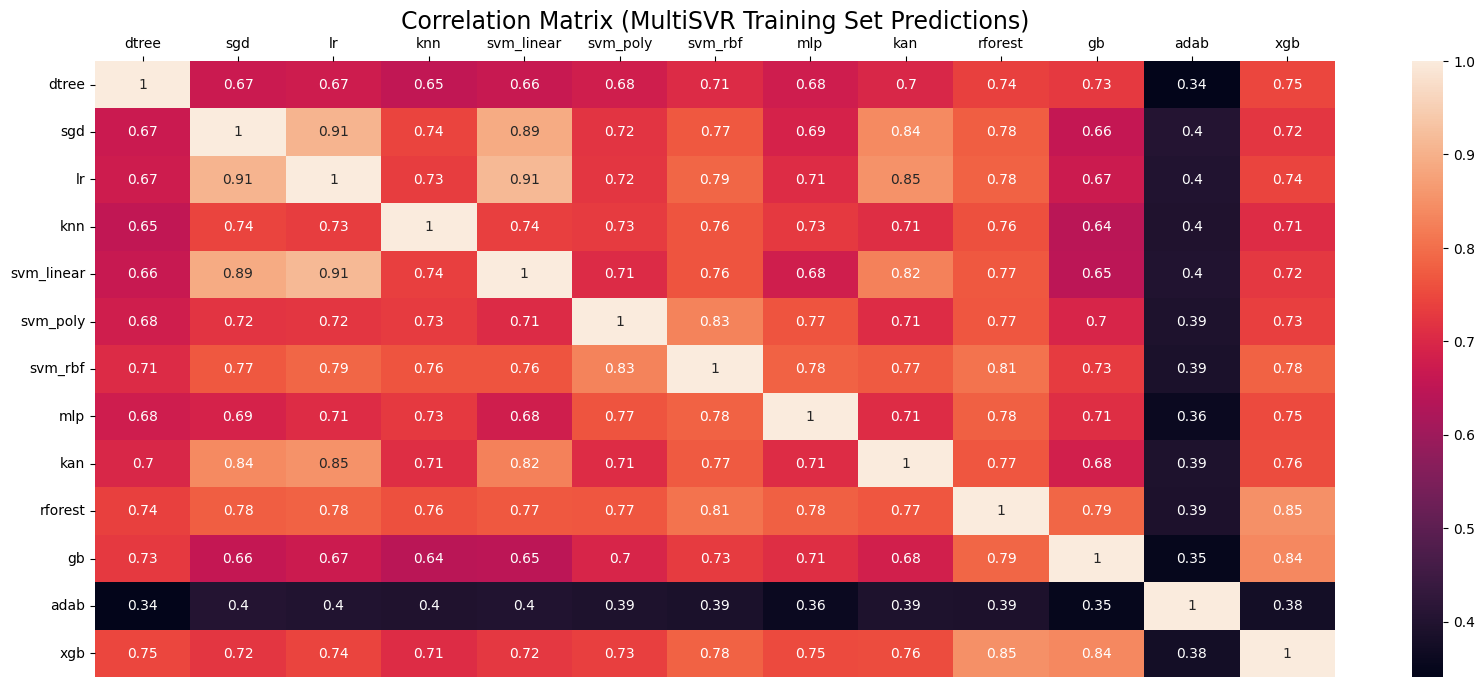

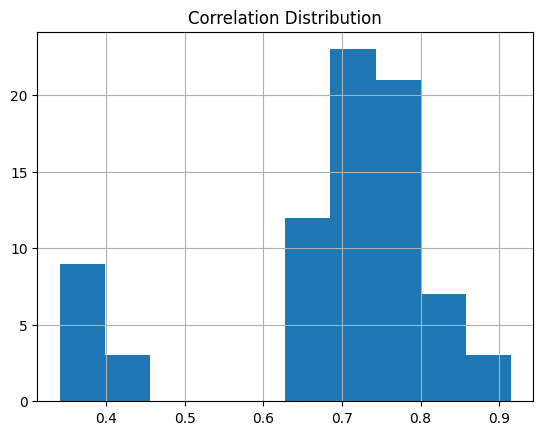

Training correlation distribution:
count    78.000000
mean      0.689237
std       0.143246
min       0.340751
25%       0.675307
50%       0.725917
75%       0.768832
max       0.914916
Name: corr, dtype: float64


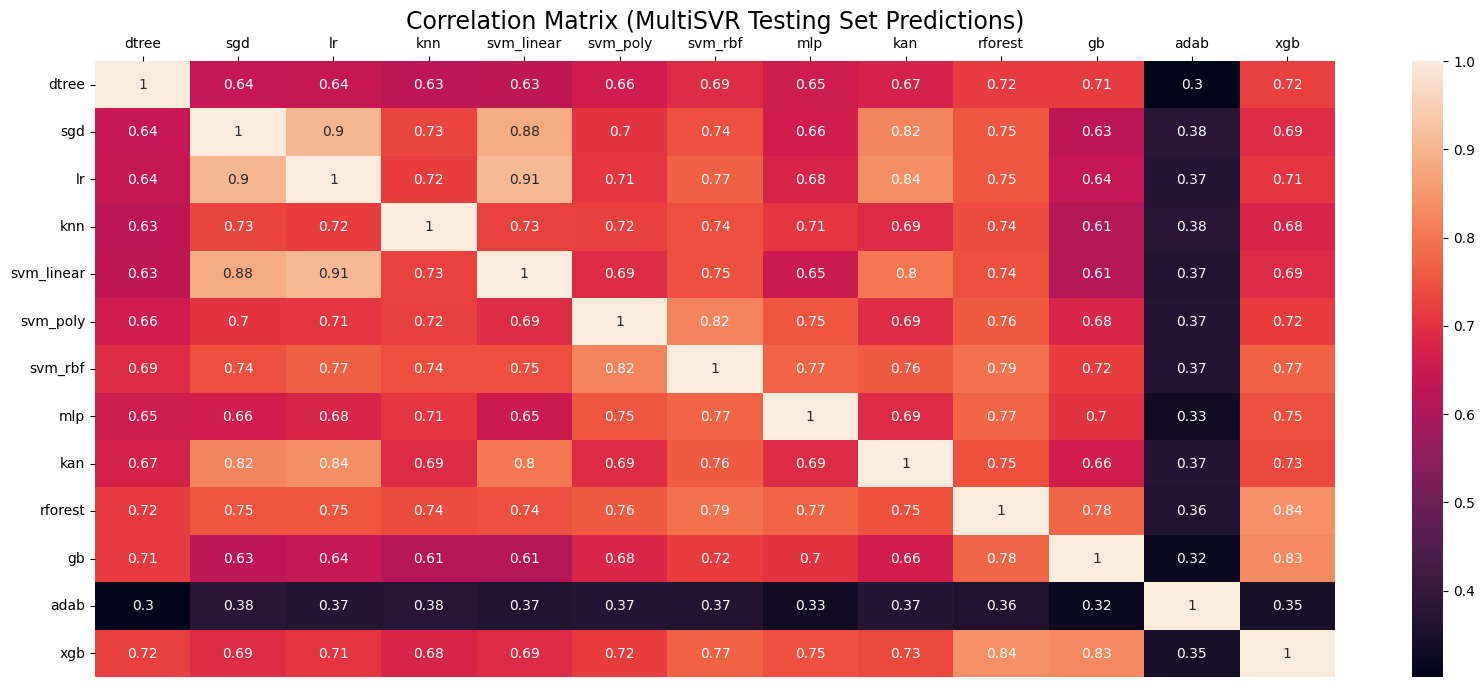

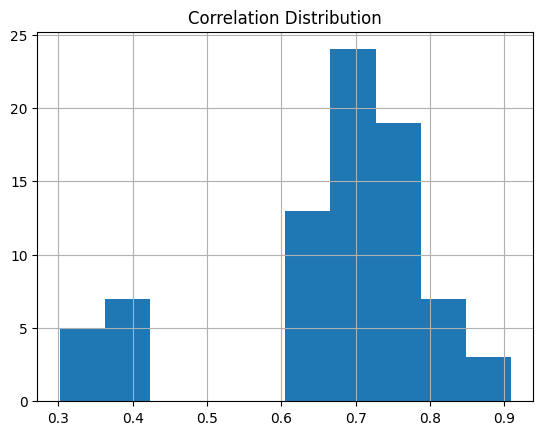

Testing correlation distribution:
count    78.000000
mean      0.668570
std       0.148023
min       0.301995
25%       0.644207
50%       0.706341
75%       0.751336
max       0.908680
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0398
NMSE: 0.1767
MAE: 1.6421
NMAE: 1.6685
aRRMSE: 1.2675
aCC: 0.6332


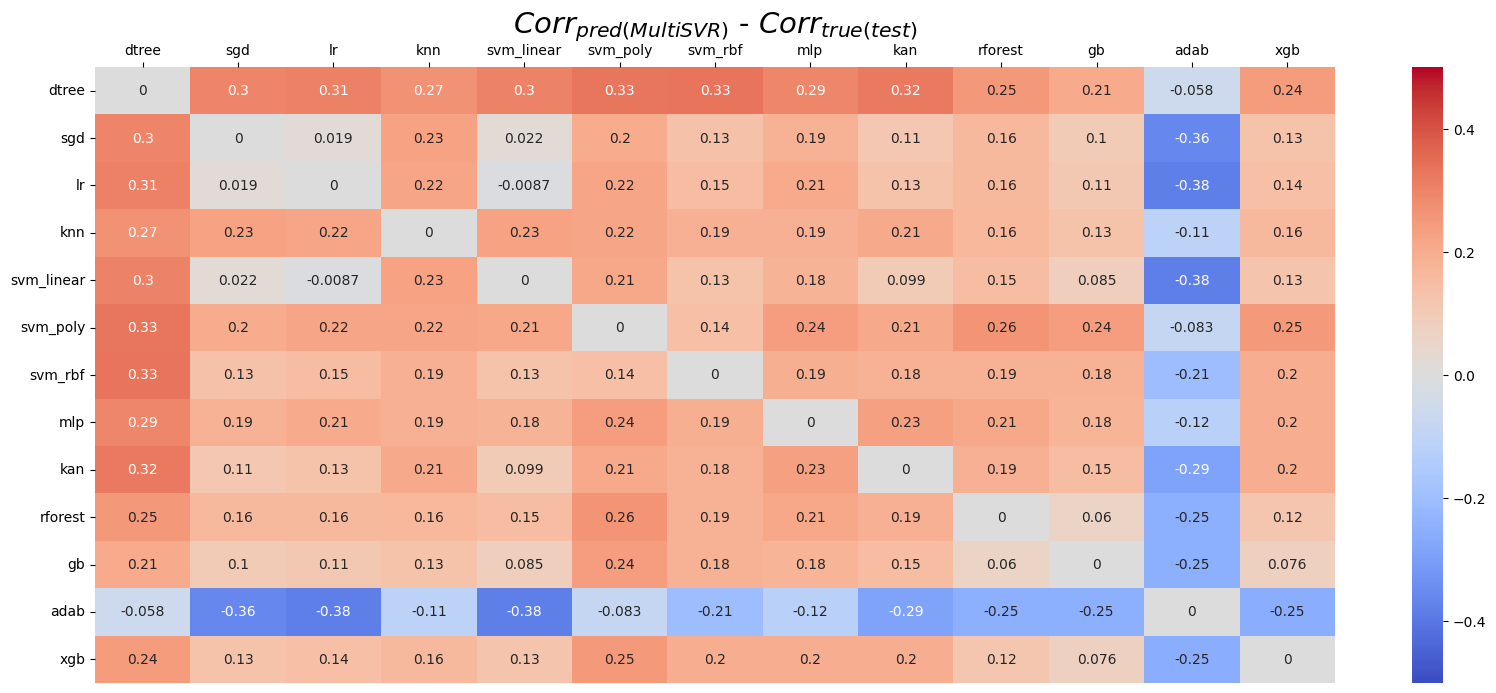

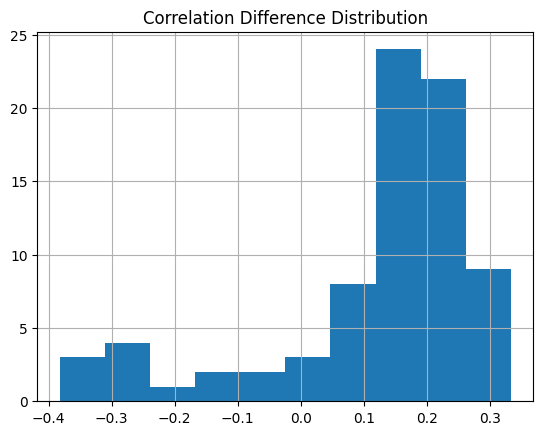

In [28]:
results = correlation_pred_performance(msvr, 
                                       pd.DataFrame(Xa_test_norm, index=Xa_test.index), 
                                       ya_test,
                                       pd.DataFrame(Xa_train_norm, index=Xa_train.index), 
                                       MIN_SCORE, name="MultiSVR")

In [29]:
diff_metrics.loc['M-SVR',:] = results['results']
diff_metrics.loc['M-SVR',:]

MSE       0.039805
MAE       0.176721
NMSE      1.642144
NMAE      1.668478
aRRMSE    1.267542
aCC       0.633198
Name: M-SVR, dtype: object

In [30]:
groups['msvr_assessor'] = results['groups']
groups['msvr_assessor']['test']

[['mlp',
  'lr',
  'rforest',
  'svm_rbf',
  'svm_linear',
  'xgb',
  'kan',
  'svm_poly',
  'knn',
  'sgd'],
 ['mlp', 'rforest', 'svm_rbf', 'xgb', 'kan', 'dtree', 'svm_poly', 'gb'],
 ['adab']]

### Multi-Output Regressor 
(ST)

In [25]:
single_tgt = MultiOutputRegressor(RandomForestRegressor(random_state=seed), 
                                  n_jobs=-1).fit(Xa_train, ya_train)

In [26]:
metrics_df.loc['ST',:] = assr_performance(single_tgt, Xa_test, ya_test, Xa_train, ya_train)

[TRAINING SET]
MSE: 0.0048
NMSE: 0.0753
MAE: 0.0438
NMAE: 0.2045
aRRMSE: 0.2743
aCC: 0.9693

[TESTING SET]
MSE: 0.0374
NMSE: 0.5839
MAE: 0.1244
NMAE: 0.5756
aRRMSE: 0.7641
aCC: 0.6528


#### Análise das correlações

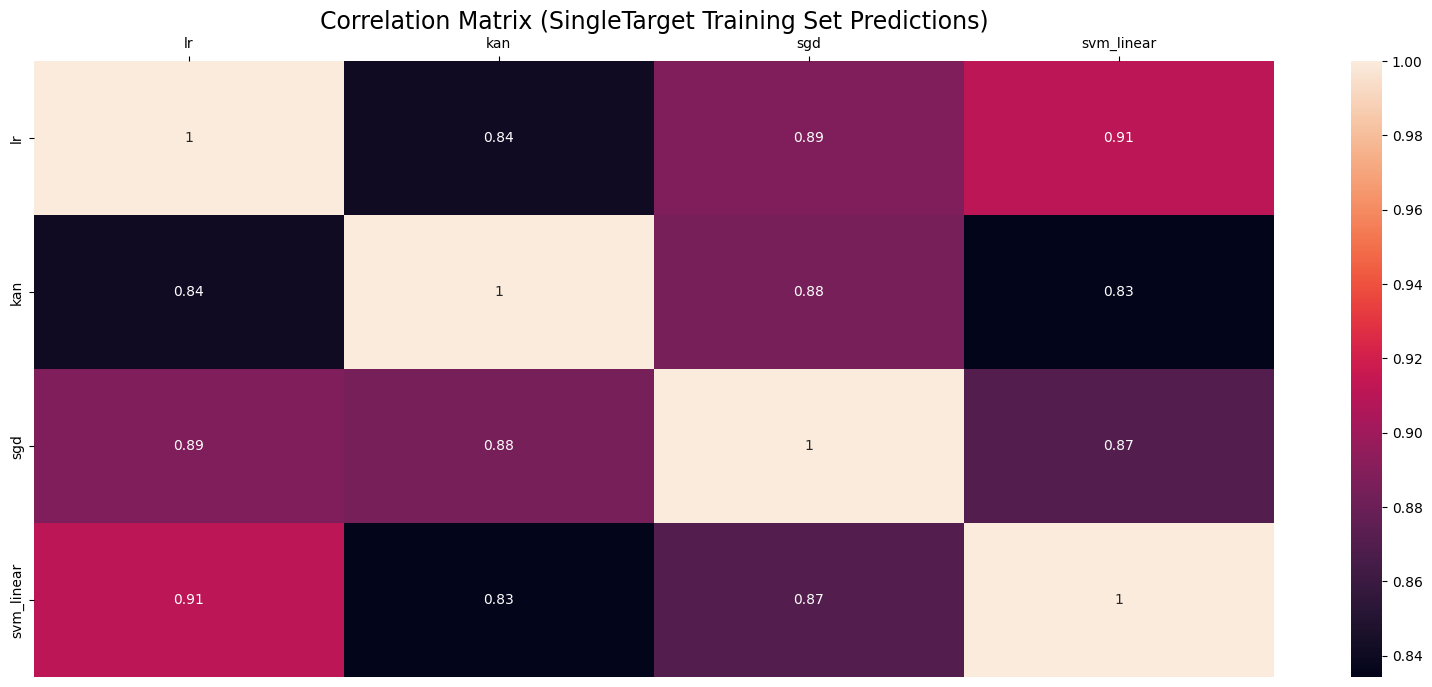

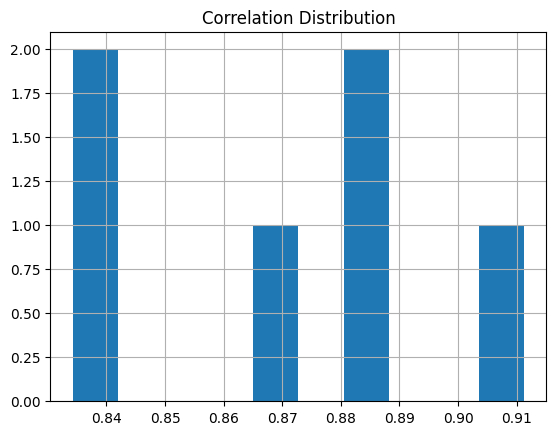

Training correlation distribution:
count    6.000000
mean     0.871530
std      0.029404
min      0.834294
25%      0.848402
50%      0.877357
75%      0.886968
max      0.911250
Name: corr, dtype: float64


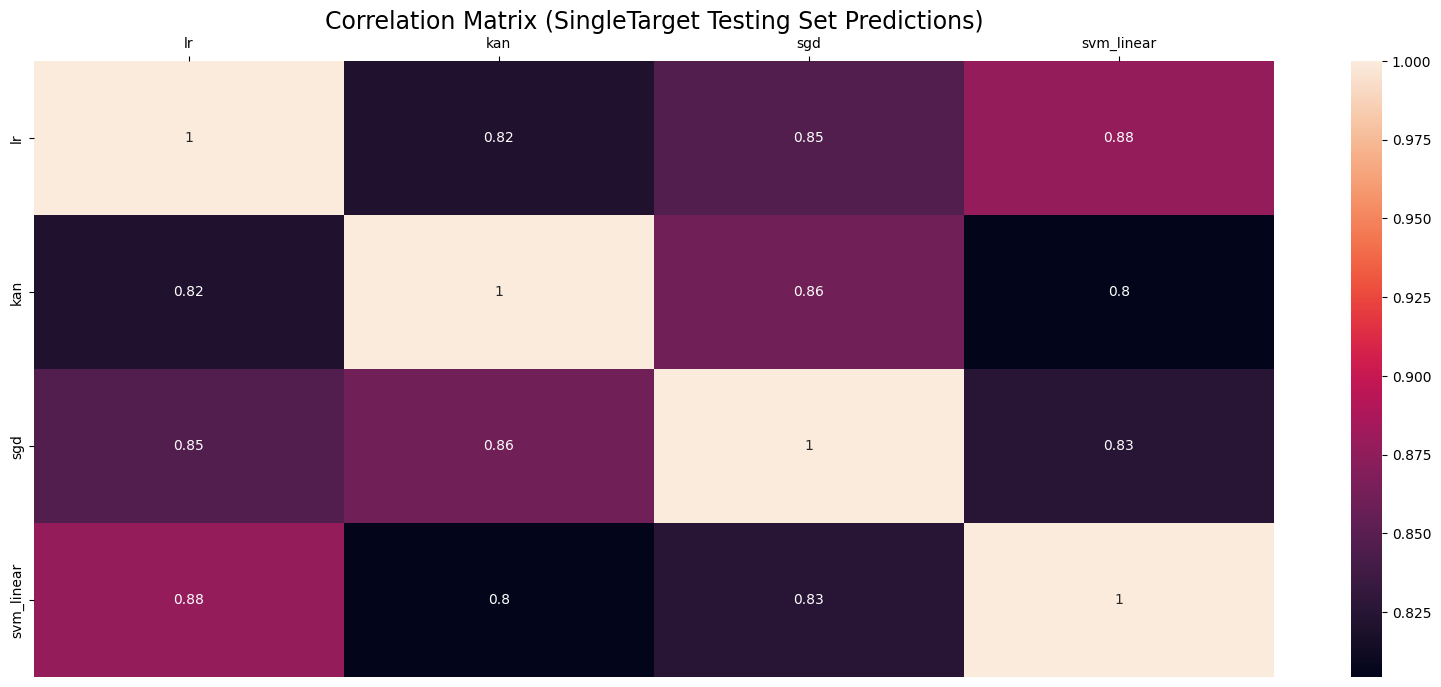

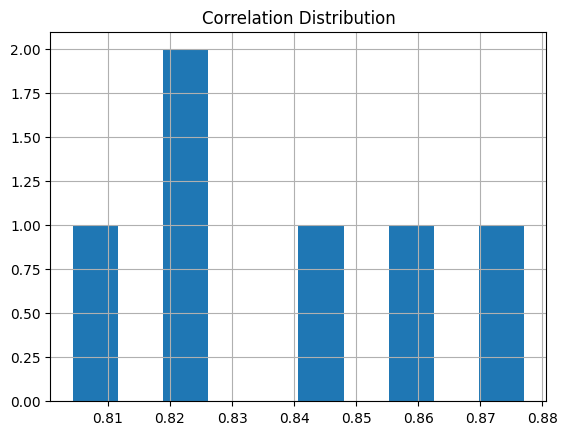

Testing correlation distribution:
count    6.000000
mean     0.839089
std      0.027195
min      0.804386
25%      0.821796
50%      0.835830
75%      0.857227
max      0.877012
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0006
NMSE: 0.0175
MAE: 0.1454
NMAE: 0.3249
aRRMSE: 0.3548
aCC: 0.9824


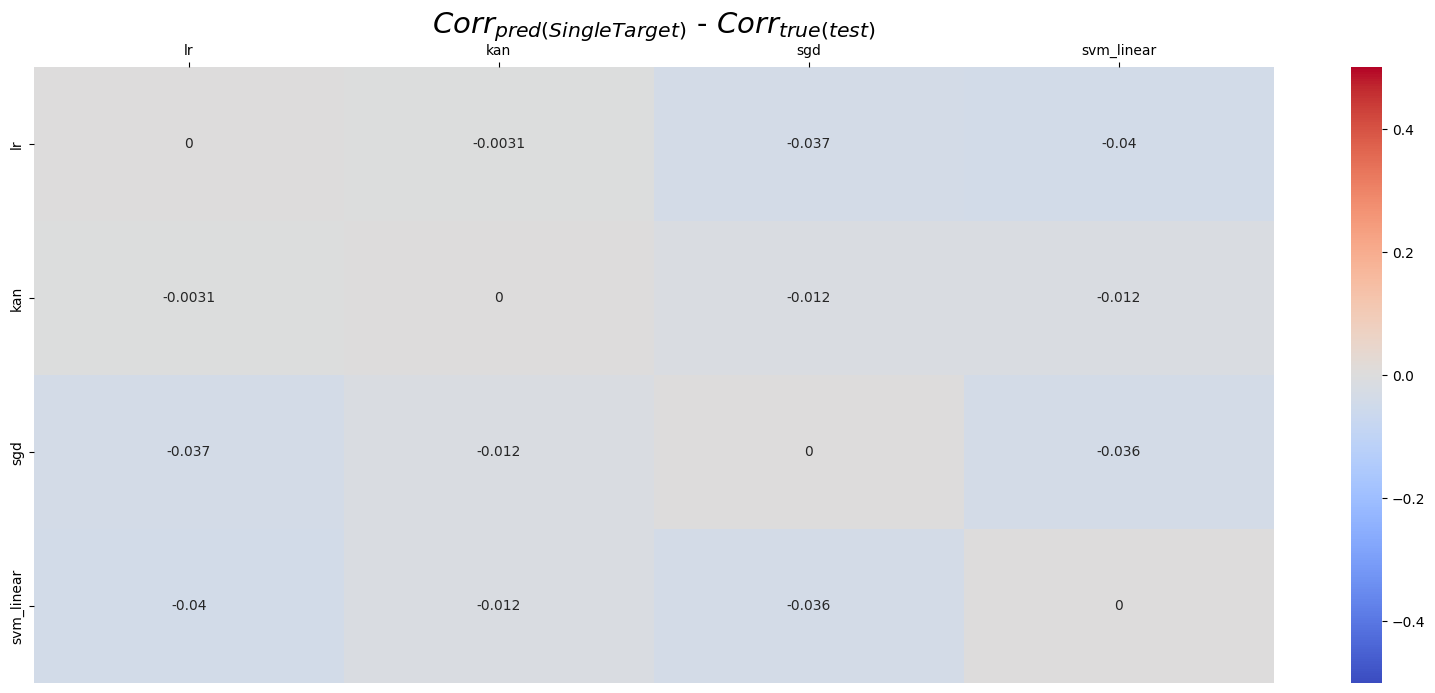

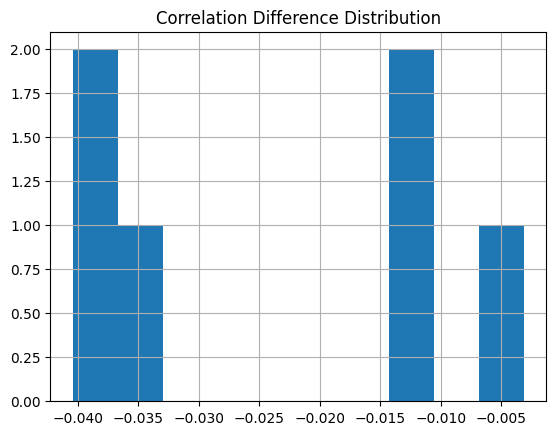

In [27]:
results = correlation_pred_performance(single_tgt, Xa_test, ya_test, Xa_train,
                                       MIN_SCORE, name="SingleTarget")

In [28]:
diff_metrics.loc['ST',:] = results['results']
diff_metrics.loc['ST',:]

MSE       0.000569
MAE       0.017482
NMSE      0.145393
NMAE      0.324896
aRRMSE    0.354796
aCC        0.98244
Name: ST, dtype: object

In [29]:
groups['st_assessor'] = results['groups']
groups['st_assessor']['test']

[['lr', 'svm_linear'], ['kan', 'sgd']]

## Grupais

In [38]:
#keys = list(groups.keys())
#for i in range(len(keys)):
#    for j in range(i+1, len(keys)):
#        print(f'{keys[i]}({len(groups[keys[i]])}) & {keys[j]}({len(groups[keys[j]])}):')
#        count = 0
#        for g in groups[keys[i]]:
#            if(g in groups[keys[j]]):
#                print(g)
#                count += 1
#        print(f'Número de grupos em comum: {count}\n\n')

In [30]:
for g in groups['true_assessor_train']:
    if(len(g)!=1):
        teste = []
        for i, m in enumerate(g):
            for n in g[i+1:]:
                teste.append(pred_corrls.loc[m,n])
        print(g)
        print(f'total: {np.mean(teste)}\n')

['lr', 'sgd', 'svm_linear']
total: 0.8882314253865937

['kan', 'sgd']
total: 0.8693757637363885



### Regressor Chain

In [31]:
#[RegressorChain(base_estimator=RandomForestRegressor(random_state=seed),
#                random_state=seed,
#                order='random', cv=5) for _ in range(num_chains)]

rcg = GroupedAssessor([RegressorChain(base_estimator=RandomForestRegressor(random_state=seed),
                                      random_state=seed,
                                      order='random', 
                                      cv=5) for _ in range(len(groups['true_assessor_train']))])

rcg.fit(Xa_train, ya_train, groups=groups['true_assessor_train'])

[TRAINING SET]
MSE: 0.0152
NMSE: 0.2418
MAE: 0.0699
NMAE: 0.3274
aRRMSE: 0.4565
aCC: 0.8713

[TESTING SET]
MSE: 0.0370
NMSE: 0.5775
MAE: 0.1251
NMAE: 0.5788
aRRMSE: 0.7598
aCC: 0.6557


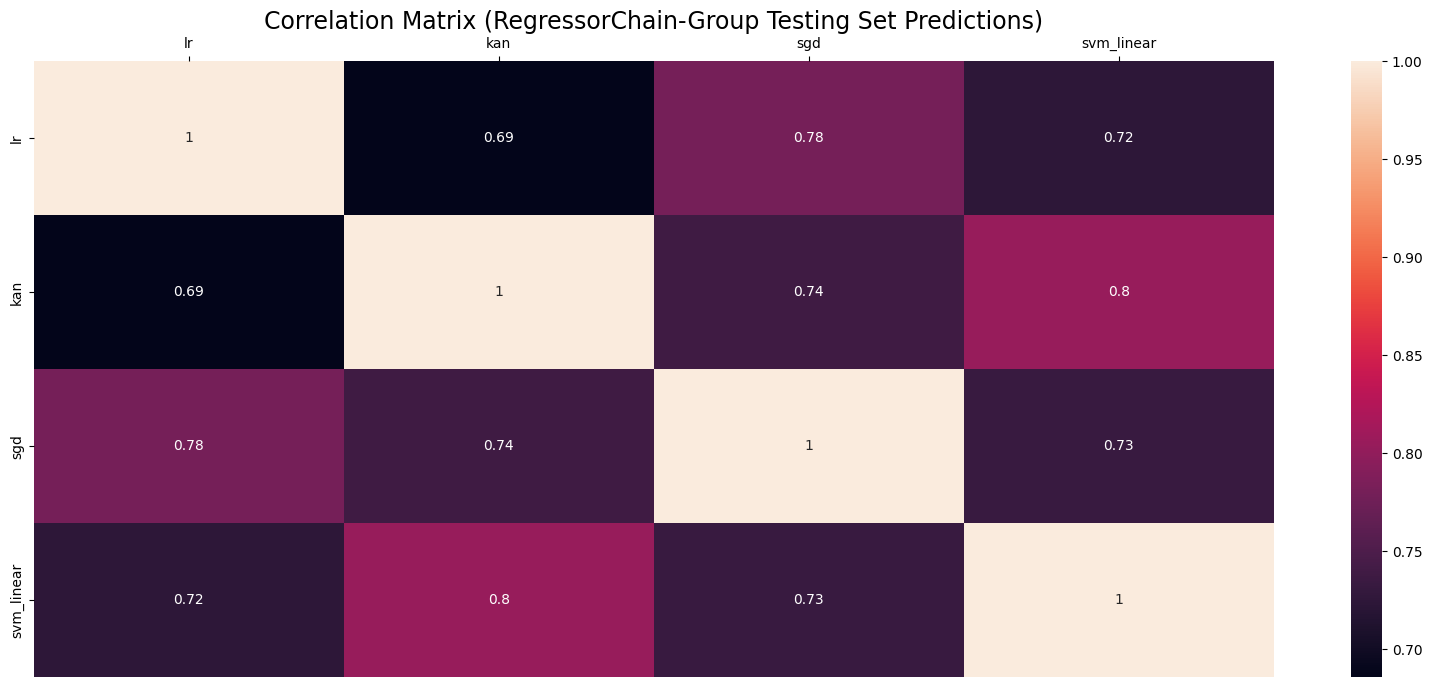

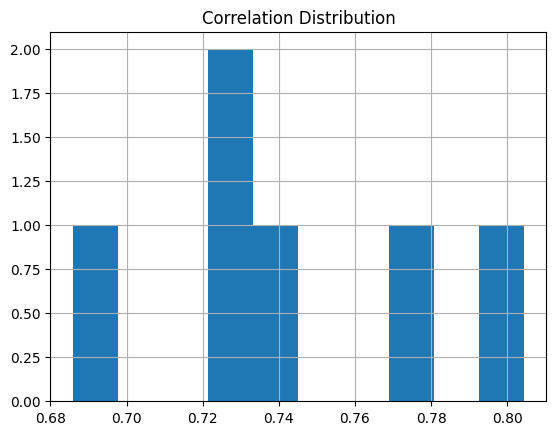

Testing correlation distribution:
count    6.000000
mean     0.743952
std      0.042105
min      0.685920
25%      0.725744
50%      0.735261
75%      0.769051
max      0.804386
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0128
NMSE: 0.0888
MAE: 3.0983
NMAE: 1.6362
aRRMSE: 1.7387
aCC: 0.8634


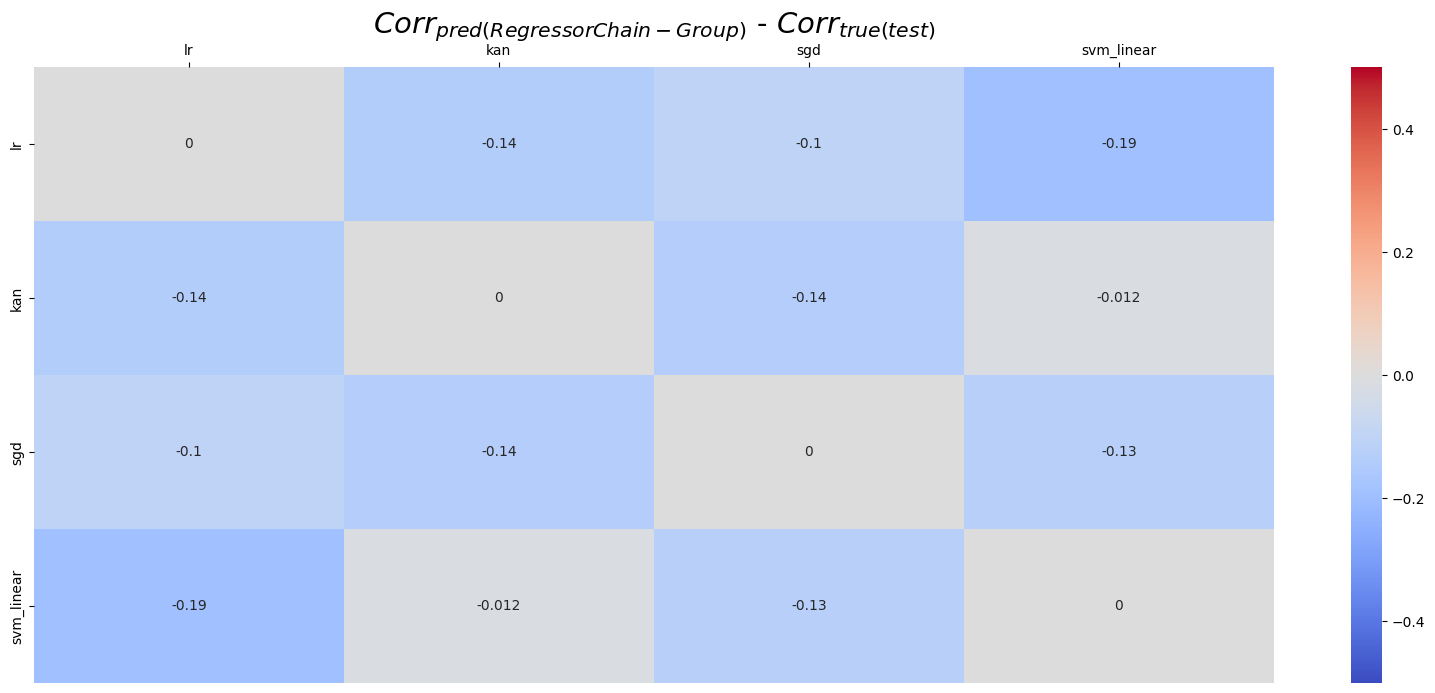

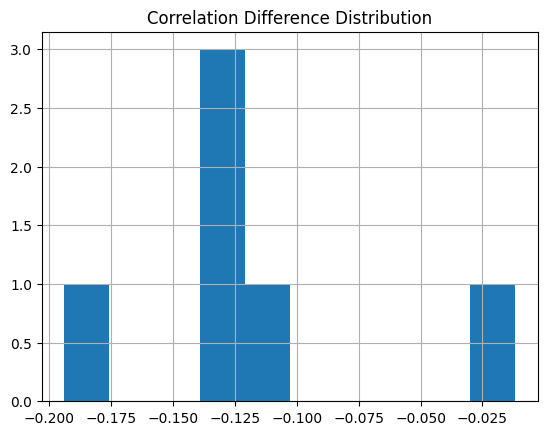

[['lr'], ['kan'], ['sgd'], ['svm_linear']]


In [32]:
metrics_df.loc['RC(g)',:] = assr_performance(rcg, Xa_test, ya_test, Xa_train, ya_train)

results = correlation_pred_performance(rcg, Xa_test, ya_test, min_score=MIN_SCORE, name="RegressorChain-Group")

diff_metrics.loc['RC(g)',:] = results['results']

groups['rcg_assessor'] = results['groups']
print(groups['rcg_assessor']['test'])

In [31]:
results

{'results': [0.014366009870071278,
  0.09917262436310684,
  np.float64(3.3604957700143228),
  np.float64(1.796393942433553),
  np.float64(1.8274526664244597),
  np.float64(0.9161043070095591)],
 'groups': {'test': [['lr'], ['sgd'], ['svm_linear'], ['kan']]}}

In [28]:
rcg = None

### Ensemble of Regressor Chains

In [54]:
#rcg = GroupedAssessor(RegressorChain, model_names, random_state=seed)
#rcg.fit(Xa_train, ya_train, groups['true_assessor_train'], base_estimator=RandomForestRegressor(random_state=seed), 
#        random_state=seed, order='random', cv=5)

#rcg_plus = GroupedAssessor(VotingRegressor, model_names, random_state=seed,
#                           estimators=rc_ests, n_jobs=-1)

rcg_ac = f'RC[{num_chains}](g)'

rcg_plus = GroupedAssessor([GroupedAssessor([RegressorChain(
                                                base_estimator=RandomForestRegressor(random_state=seed),
                                                random_state=seed+i,
                                                order='random', cv=5) for i in range(num_chains)]
                                            ) for _ in range(len(groups['true_assessor_train']))])

rcg_plus.fit(Xa_train, ya_train, groups=groups['true_assessor_train'])

[TRAINING SET]
MSE: 0.0153
NMSE: 0.2393
MAE: 0.0761
NMAE: 0.3552
aRRMSE: 0.4878
aCC: 0.8856

[TESTING SET]
MSE: 0.0356
NMSE: 0.5557
MAE: 0.1244
NMAE: 0.5757
aRRMSE: 0.7454
aCC: 0.6689


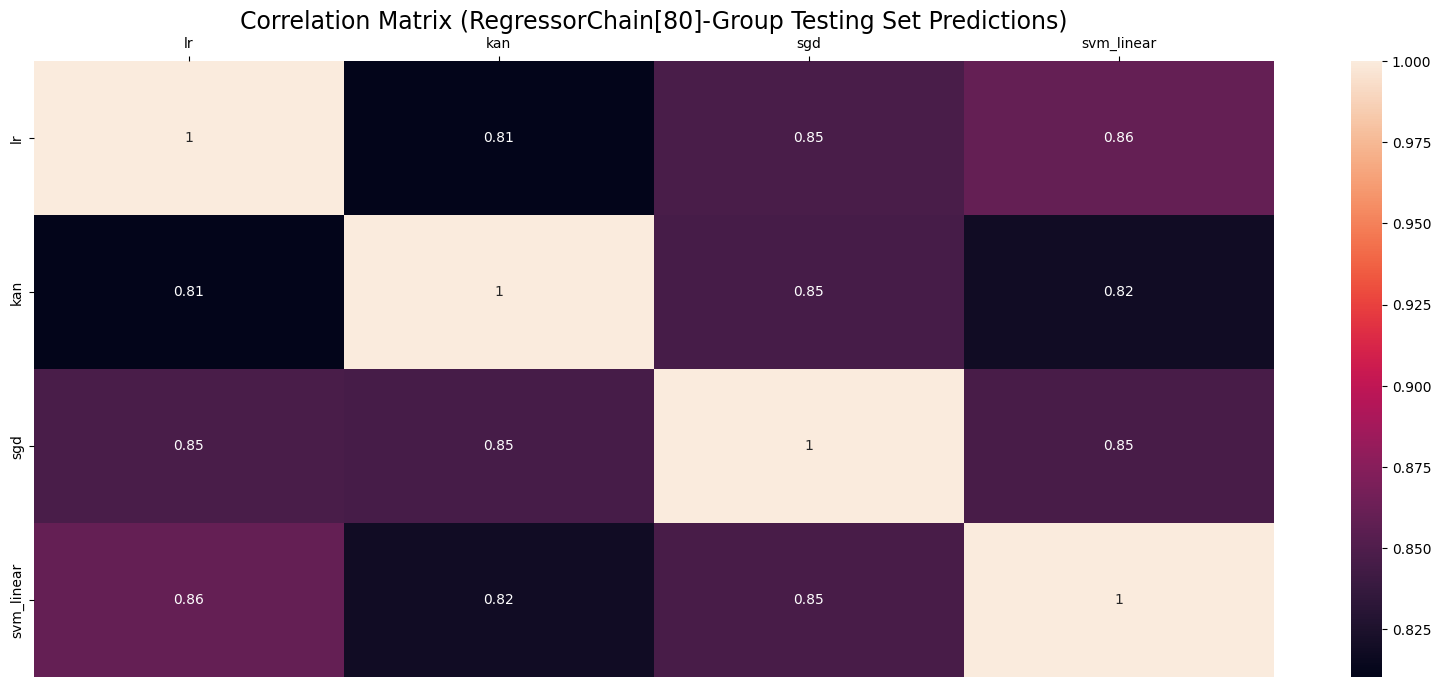

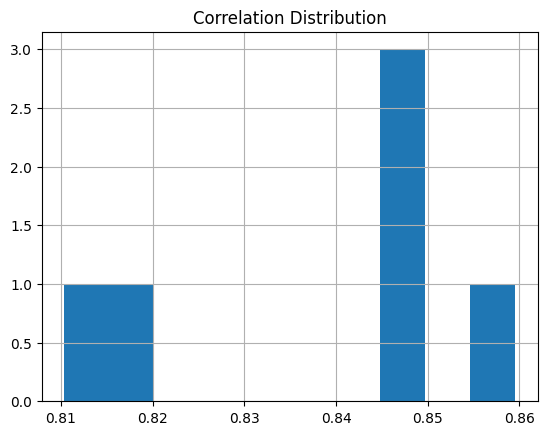

Testing correlation distribution:
count    6.000000
mean     0.837782
std      0.018991
min      0.810358
25%      0.825257
50%      0.845714
75%      0.846625
max      0.859541
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0007
NMSE: 0.0191
MAE: 0.1791
NMAE: 0.3533
aRRMSE: 0.4051
aCC: 0.9682


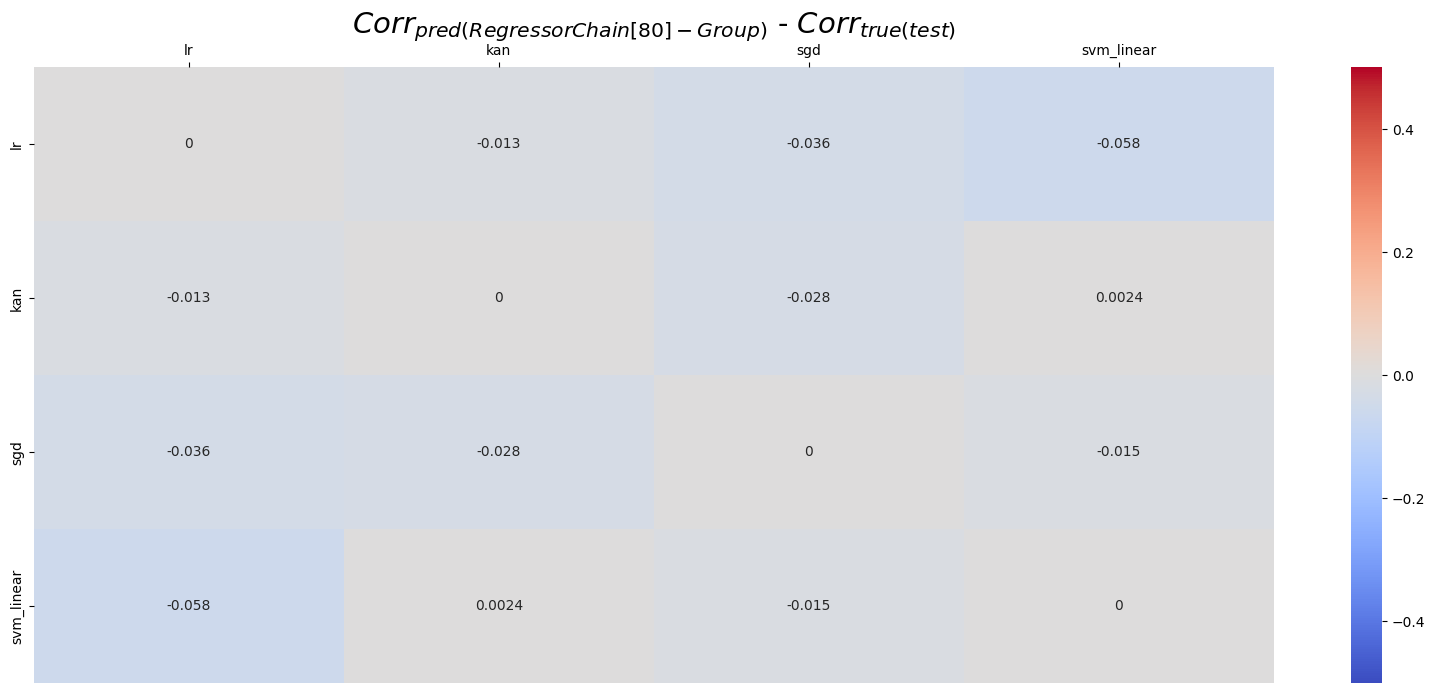

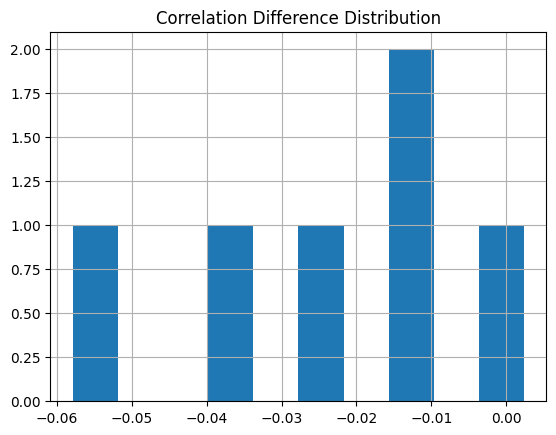

[['lr', 'svm_linear'], ['kan'], ['sgd']]


In [55]:
# keeping the concat because multiple numbers of chains could be recorded
#80chains
if(rcg_ac in metrics_df.index):
    metrics_df.loc[rcg_ac,:] = assr_performance(rcg_plus, Xa_test, ya_test, Xa_train, ya_train)
else:
    new_df = pd.DataFrame(assr_performance(rcg_plus, Xa_test, ya_test, Xa_train, ya_train), 
                          columns=metrics_cols,
                          index=multIdx(rcg_ac, subindex=model_names))

    metrics_df = pd.concat([metrics_df, new_df])

results = correlation_pred_performance(rcg_plus, Xa_test, ya_test, min_score=MIN_SCORE, name=f"RegressorChain[{num_chains}]-Group")

diff_metrics.loc[rcg_ac,:] = results['results']

groups[f'rcg({num_chains})_assessor'] = results['groups']
print(groups[f'rcg({num_chains})_assessor']['test'])

[TRAINING SET]
MSE: 0.0151
NMSE: 0.2370
MAE: 0.0757
NMAE: 0.3536
aRRMSE: 0.4857
aCC: 0.8870

[TESTING SET]
MSE: 0.0355
NMSE: 0.5554
MAE: 0.1244
NMAE: 0.5755
aRRMSE: 0.7452
aCC: 0.6691


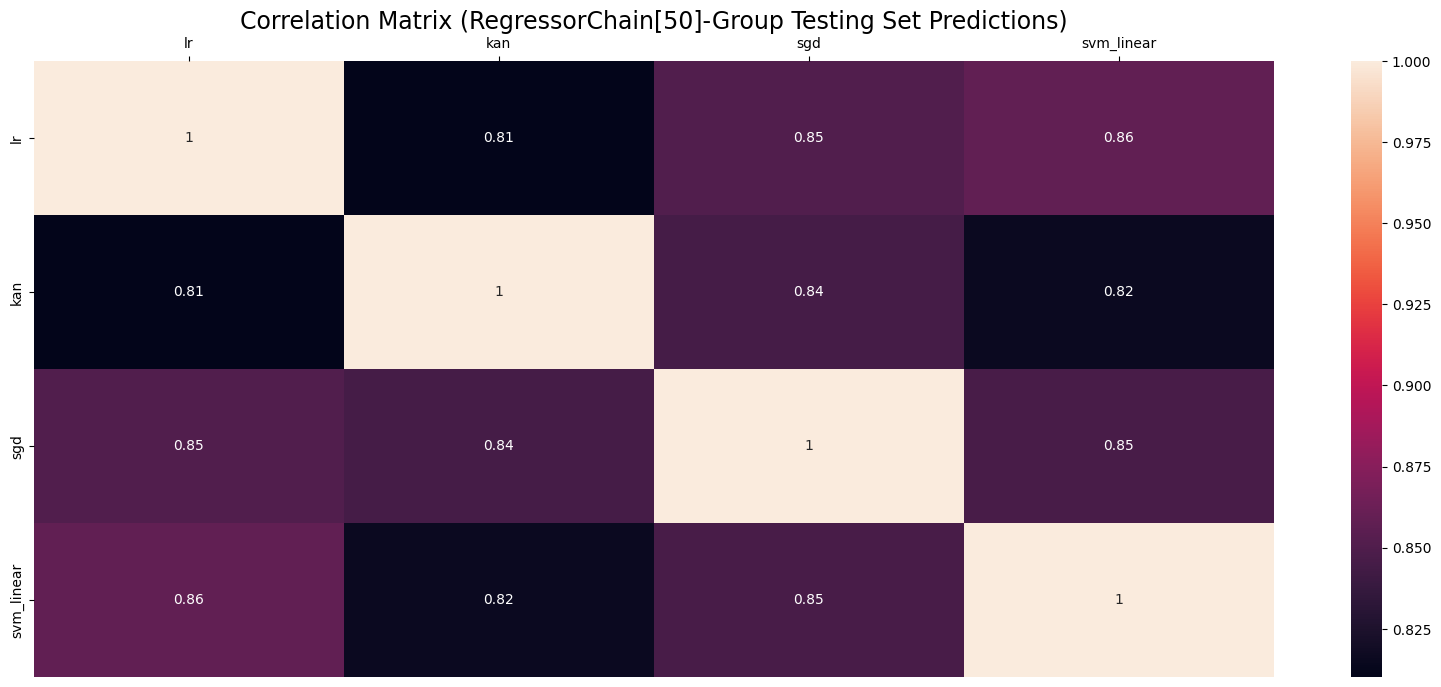

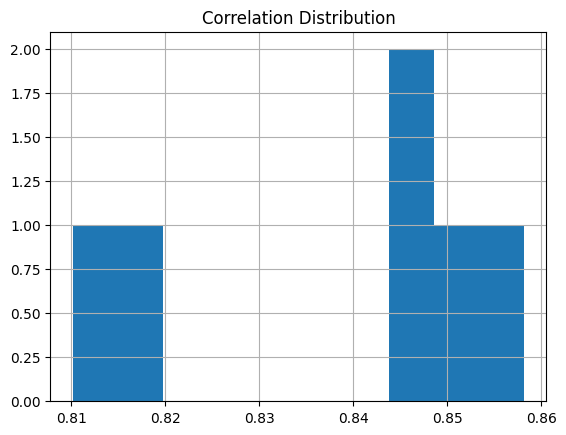

Testing correlation distribution:
count    6.000000
mean     0.837556
std      0.019649
min      0.810167
25%      0.823071
50%      0.845107
75%      0.849599
max      0.858132
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0007
NMSE: 0.0186
MAE: 0.1761
NMAE: 0.3452
aRRMSE: 0.4027
aCC: 0.9688


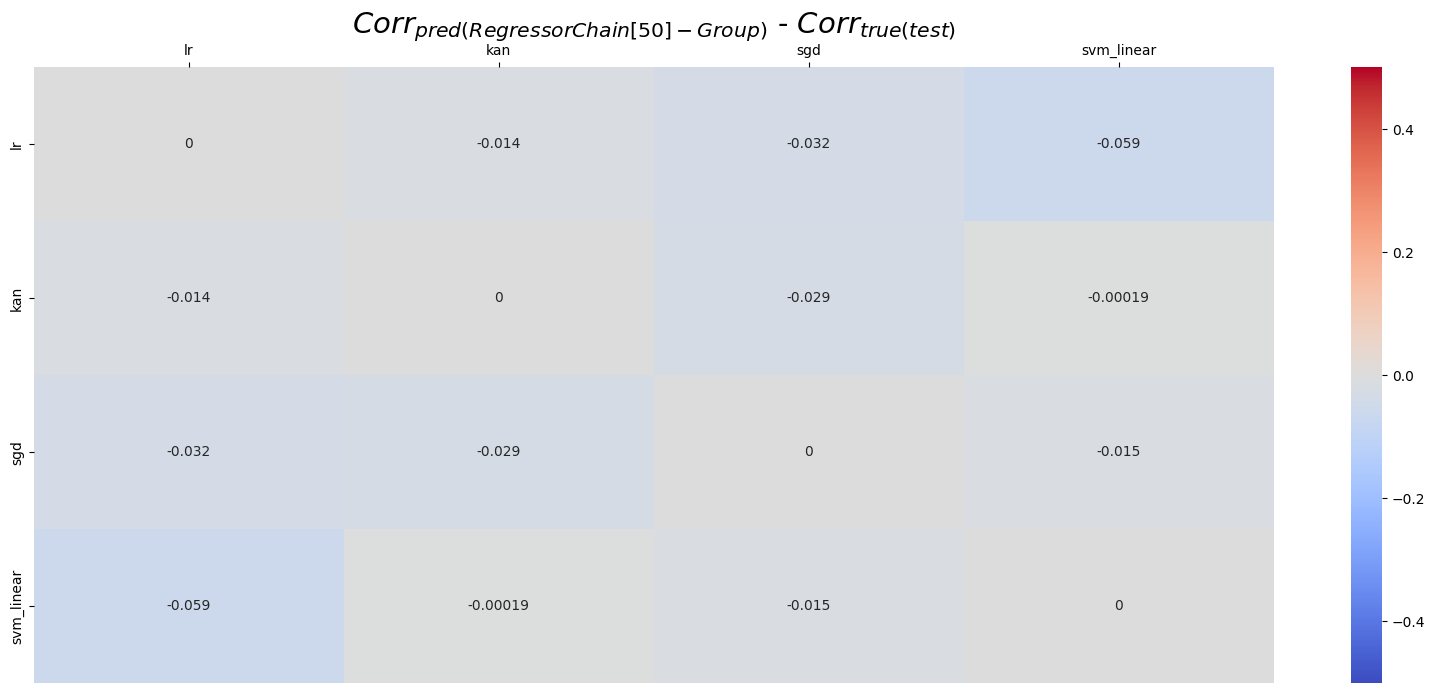

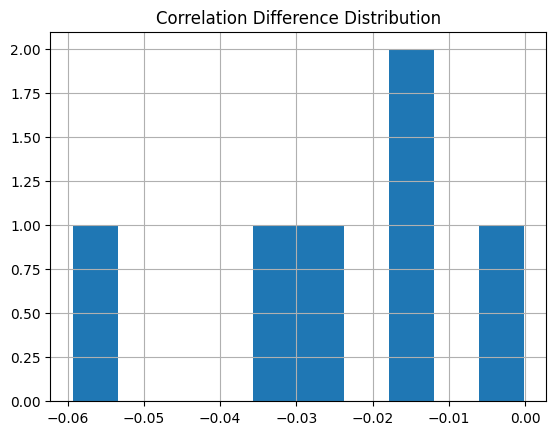

[['lr', 'sgd'], ['lr', 'svm_linear'], ['kan']]


In [48]:
# keeping the concat because multiple numbers of chains could be recorded
#50chains
if(rcg_ac in metrics_df.index):
    metrics_df.loc[rcg_ac,:] = assr_performance(rcg_plus, Xa_test, ya_test, Xa_train, ya_train)
else:
    new_df = pd.DataFrame(assr_performance(rcg_plus, Xa_test, ya_test, Xa_train, ya_train), 
                          columns=metrics_cols,
                          index=multIdx(rcg_ac, subindex=model_names))

    metrics_df = pd.concat([metrics_df, new_df])

results = correlation_pred_performance(rcg_plus, Xa_test, ya_test, min_score=MIN_SCORE, name=f"RegressorChain[{num_chains}]-Group")

diff_metrics.loc[rcg_ac,:] = results['results']

groups[f'rcg({num_chains})_assessor'] = results['groups']
print(groups[f'rcg({num_chains})_assessor']['test'])

[TRAINING SET]
MSE: 0.0152
NMSE: 0.2382
MAE: 0.0761
NMAE: 0.3552
aRRMSE: 0.4876
aCC: 0.8867

[TESTING SET]
MSE: 0.0355
NMSE: 0.5549
MAE: 0.1244
NMAE: 0.5754
aRRMSE: 0.7448
aCC: 0.6694


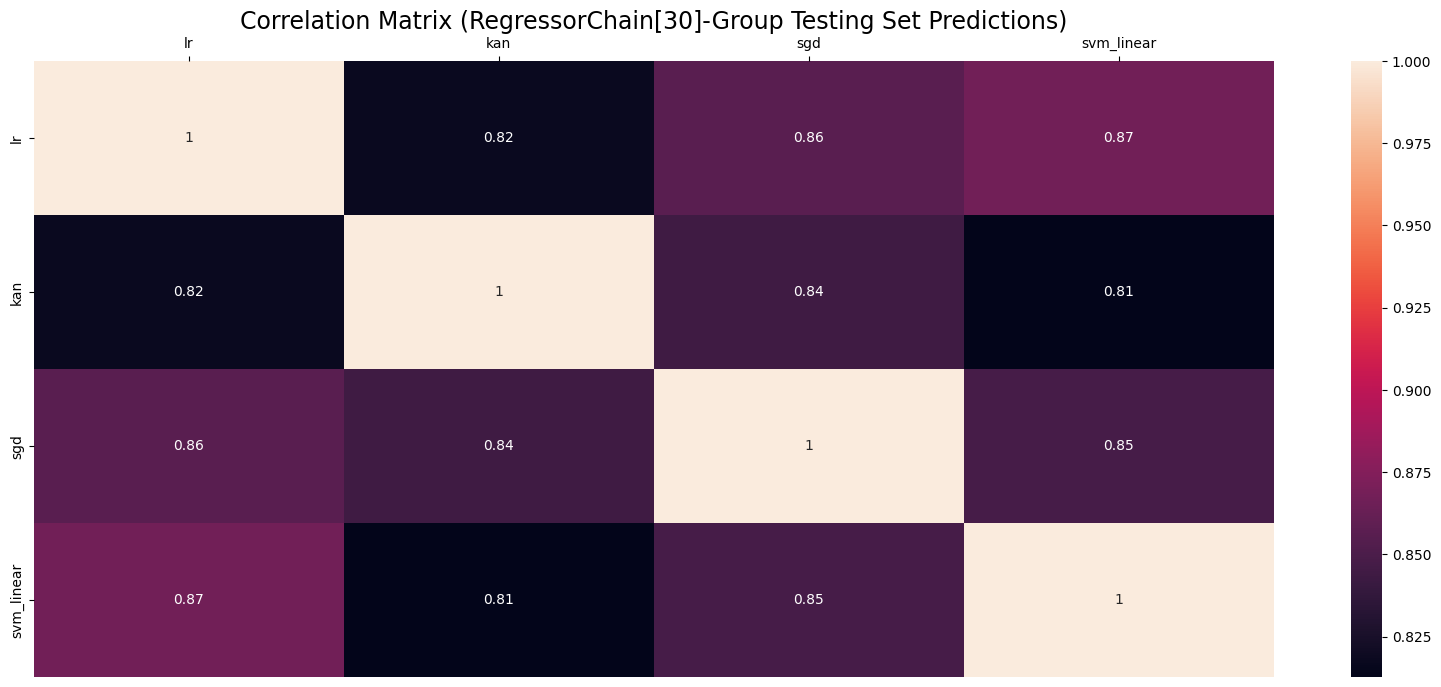

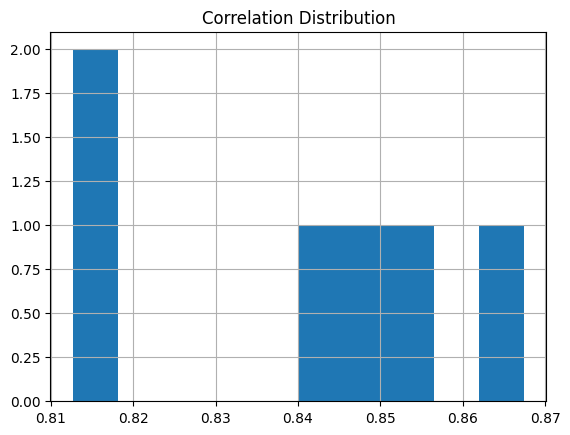

Testing correlation distribution:
count    6.000000
mean     0.840788
std      0.021576
min      0.812696
25%      0.824013
50%      0.845558
75%      0.853877
max      0.867436
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0005
NMSE: 0.0162
MAE: 0.1322
NMAE: 0.3001
aRRMSE: 0.3524
aCC: 0.9756


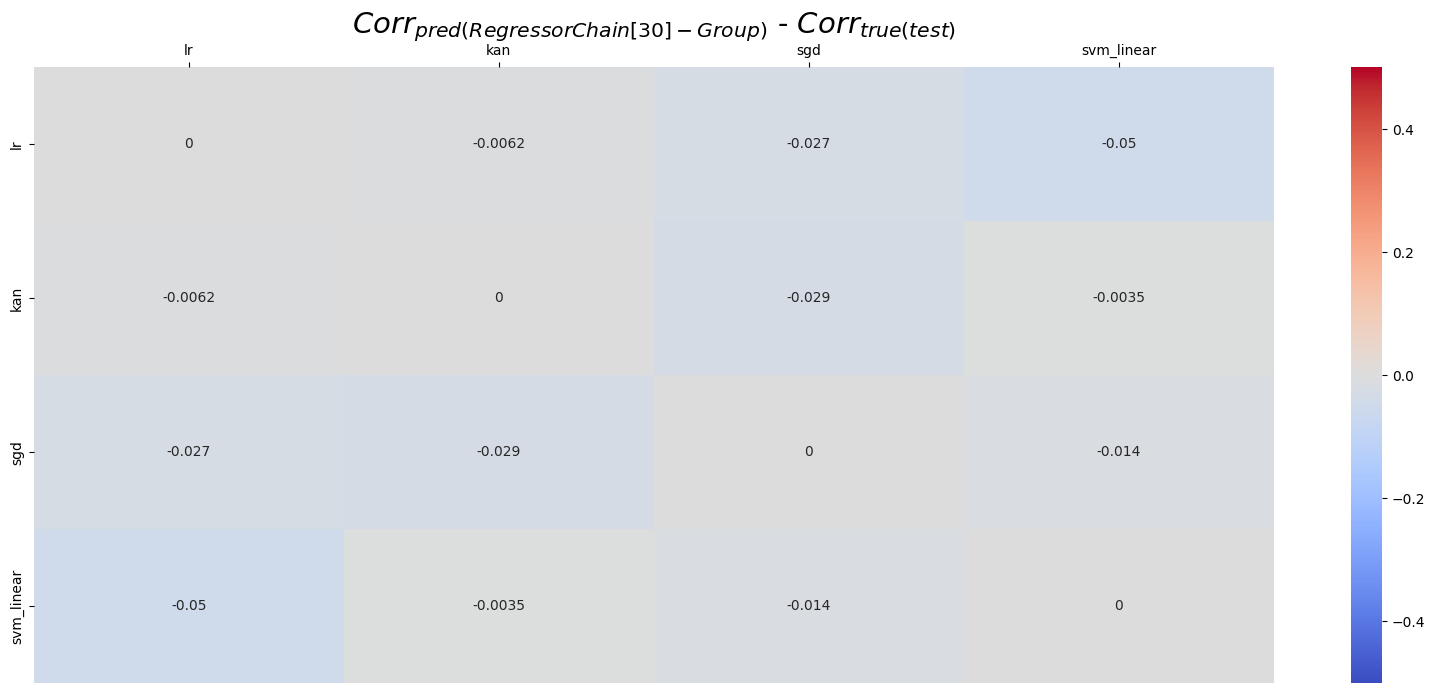

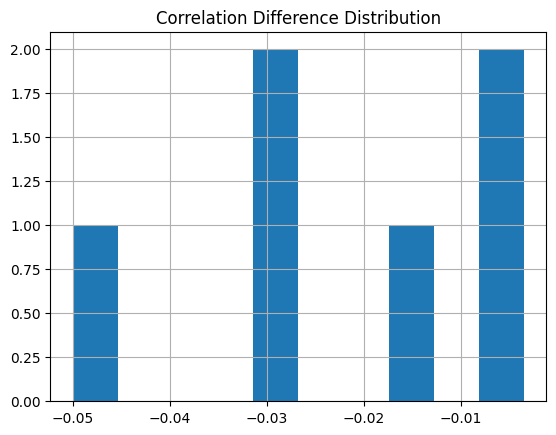

[['lr', 'sgd'], ['lr', 'svm_linear'], ['kan']]


In [41]:
# keeping the concat because multiple numbers of chains could be recorded
#30chains
if(rcg_ac in metrics_df.index):
    metrics_df.loc[rcg_ac,:] = assr_performance(rcg_plus, Xa_test, ya_test, Xa_train, ya_train)
else:
    new_df = pd.DataFrame(assr_performance(rcg_plus, Xa_test, ya_test, Xa_train, ya_train), 
                          columns=metrics_cols,
                          index=multIdx(rcg_ac, subindex=model_names))

    metrics_df = pd.concat([metrics_df, new_df])

results = correlation_pred_performance(rcg_plus, Xa_test, ya_test, min_score=MIN_SCORE, name=f"RegressorChain[{num_chains}]-Group")

diff_metrics.loc[rcg_ac,:] = results['results']

groups[f'rcg({num_chains})_assessor'] = results['groups']
print(groups[f'rcg({num_chains})_assessor']['test'])

[TRAINING SET]
MSE: 0.0151
NMSE: 0.2366
MAE: 0.0759
NMAE: 0.3545
aRRMSE: 0.4863
aCC: 0.8878

[TESTING SET]
MSE: 0.0355
NMSE: 0.5553
MAE: 0.1244
NMAE: 0.5755
aRRMSE: 0.7451
aCC: 0.6691


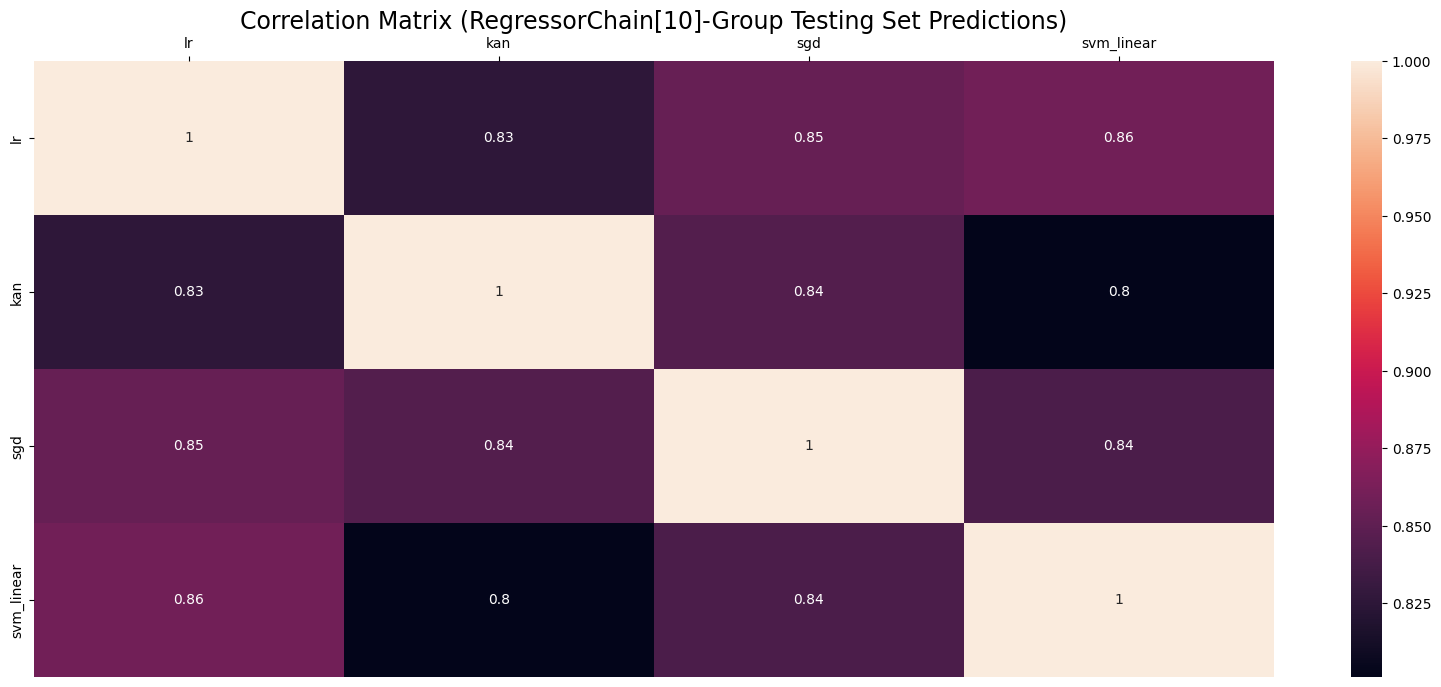

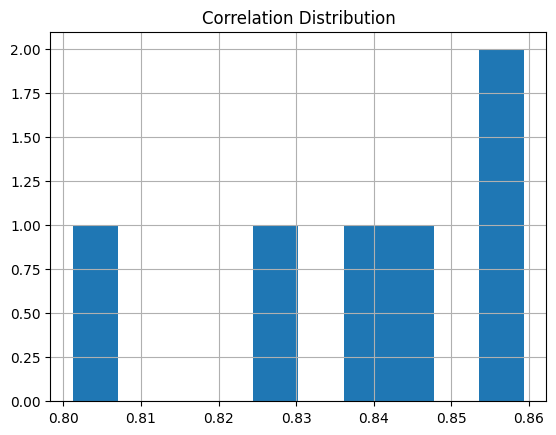

Testing correlation distribution:
count    6.000000
mean     0.837440
std      0.021204
min      0.801238
25%      0.829362
50%      0.842268
75%      0.851380
max      0.859388
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0007
NMSE: 0.0192
MAE: 0.1731
NMAE: 0.3537
aRRMSE: 0.4010
aCC: 0.9693


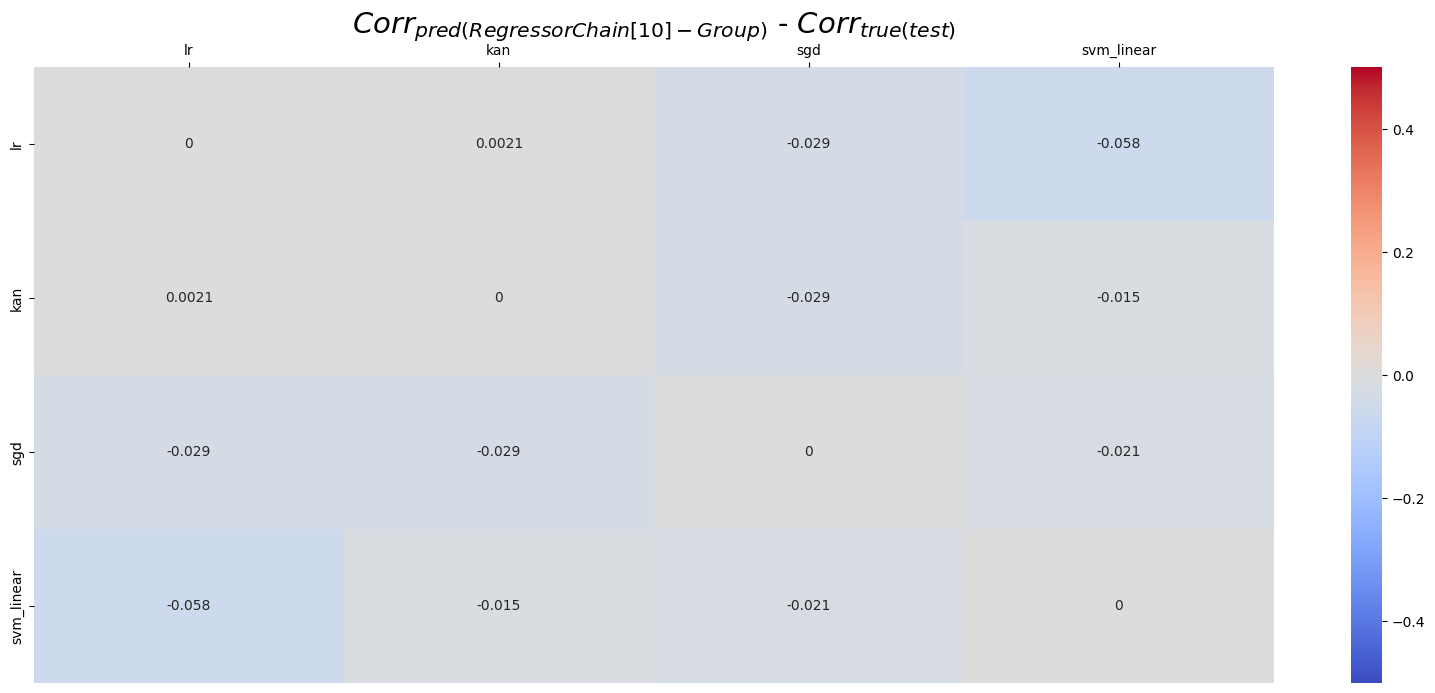

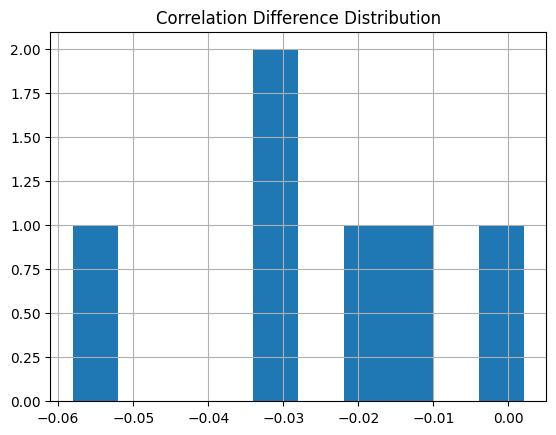

[['lr', 'sgd'], ['lr', 'svm_linear'], ['kan']]


In [34]:
# keeping the concat because multiple numbers of chains could be recorded
#10chains
if(rcg_ac in metrics_df.index):
    metrics_df.loc[rcg_ac,:] = assr_performance(rcg_plus, Xa_test, ya_test, Xa_train, ya_train)
else:
    new_df = pd.DataFrame(assr_performance(rcg_plus, Xa_test, ya_test, Xa_train, ya_train), 
                          columns=metrics_cols,
                          index=multIdx(rcg_ac, subindex=model_names))

    metrics_df = pd.concat([metrics_df, new_df])

results = correlation_pred_performance(rcg_plus, Xa_test, ya_test, min_score=MIN_SCORE, name=f"RegressorChain[{num_chains}]-Group")

diff_metrics.loc[rcg_ac,:] = results['results']

groups[f'rcg({num_chains})_assessor'] = results['groups']
print(groups[f'rcg({num_chains})_assessor']['test'])

In [31]:
rcg_plus = None

### Multi-Output SVR

In [ ]:
msvrg = GroupedAssessor([MSVR() for _ in range(len(groups['true_assessor_train']))])

msvrg.fit(Xa_train_norm, ya_train, groups['true_assessor_train'])

c:\Users\pedro\Documents\NOVOdeltadelta\pog\meu\proj-mtr\MSVR.py:74: RuntimeWarning: divide by zero encountered in divide
  a = 2 * C * (u - epsi) / u
c:\Users\pedro\Documents\NOVOdeltadelta\pog\meu\proj-mtr\MSVR.py:74: RuntimeWarning: divide by zero encountered in divide
  a = 2 * C * (u - epsi) / u


[TRAINING SET]
MSE: 0.0716
NMSE: 0.7840
MAE: 0.1894
NMAE: 0.8278
aRRMSE: 0.8695
aCC: 0.5485

[TESTING SET]
MSE: 0.0802
NMSE: 0.8254
MAE: 0.2006
NMAE: 0.8448
aRRMSE: 0.8991
aCC: 0.4799


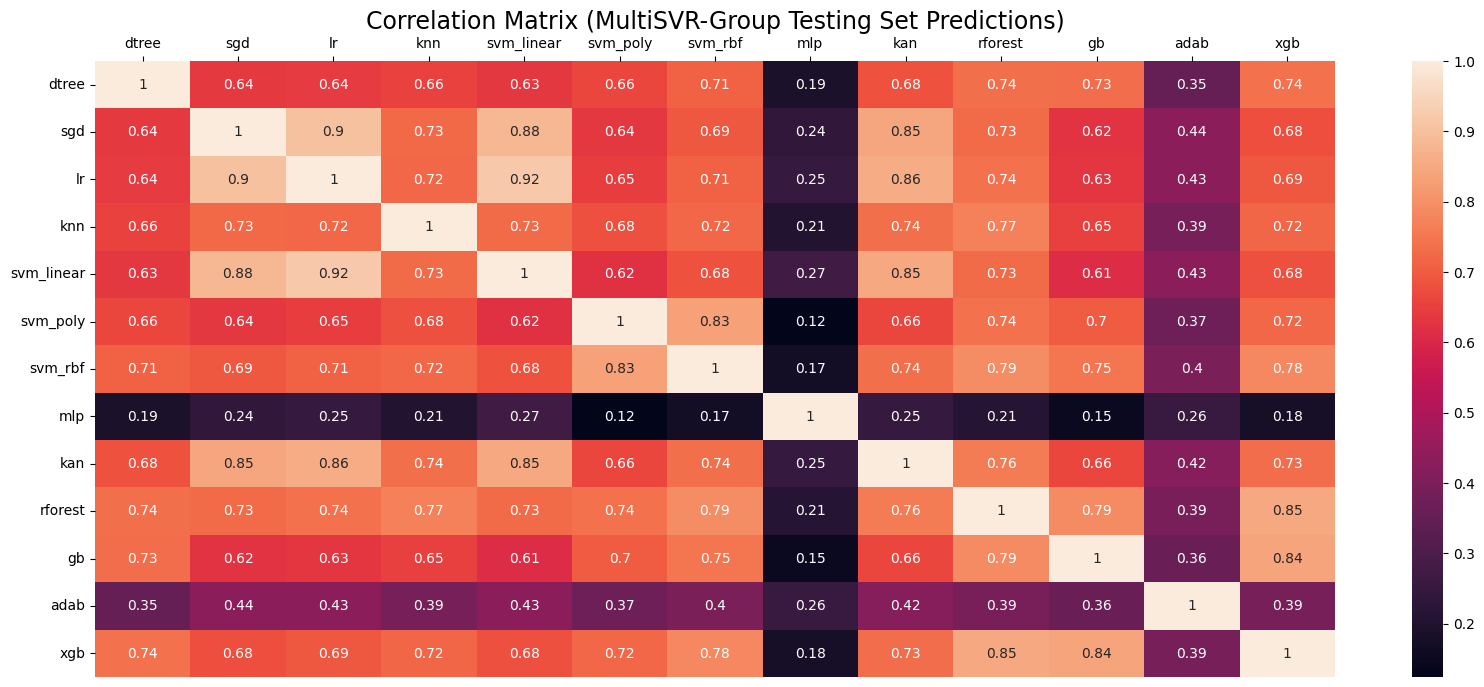

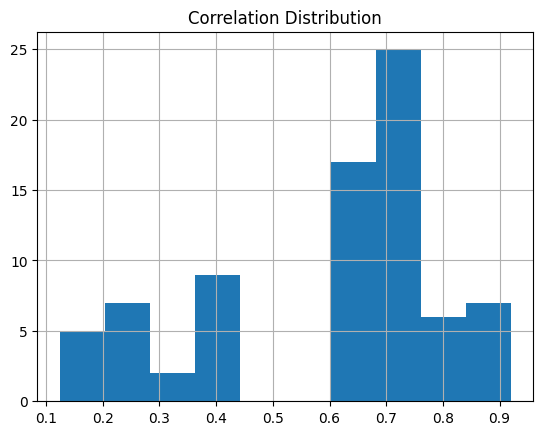

Testing correlation distribution:
count    78.000000
mean      0.600884
std       0.214307
min       0.124314
25%       0.422323
50%       0.678512
75%       0.735569
max       0.919881
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0439
NMSE: 0.1821
MAE: 1.8827
NMAE: 1.7511
aRRMSE: 1.3410
aCC: 0.5953


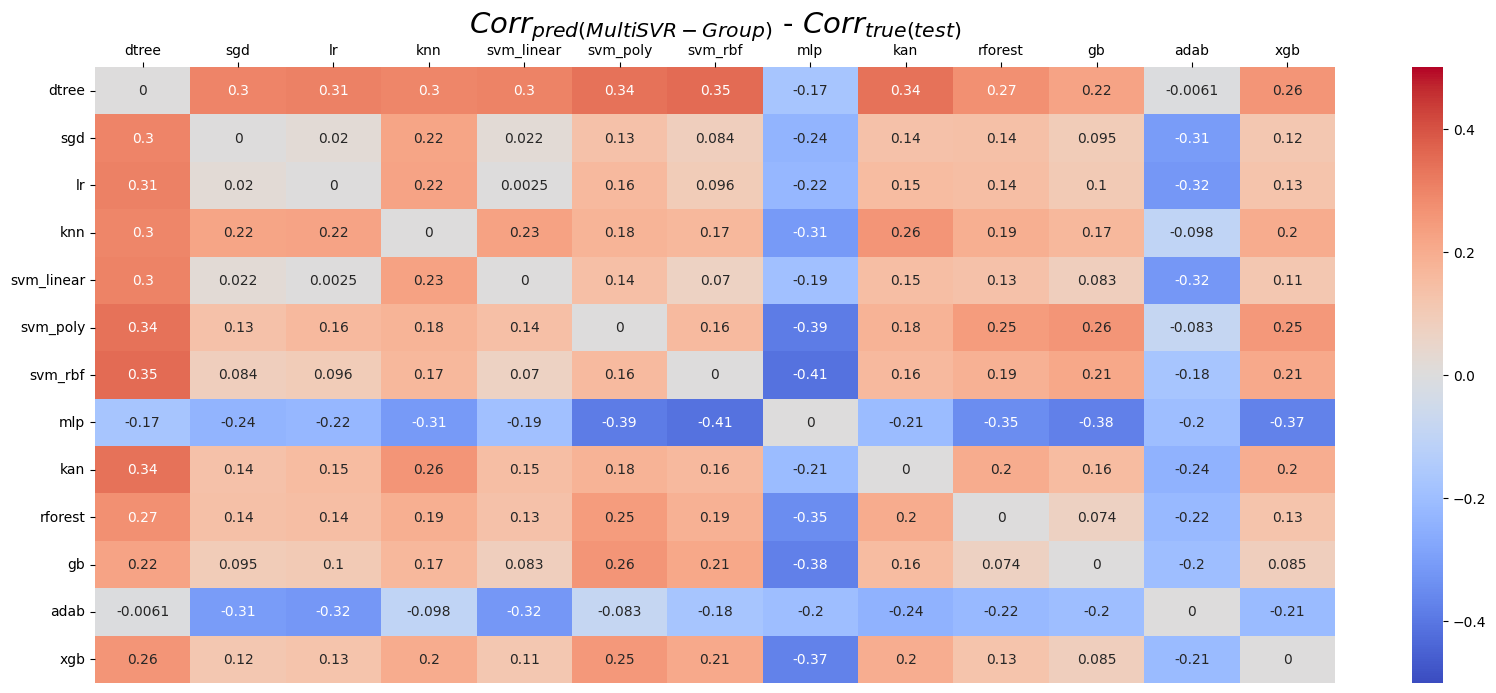

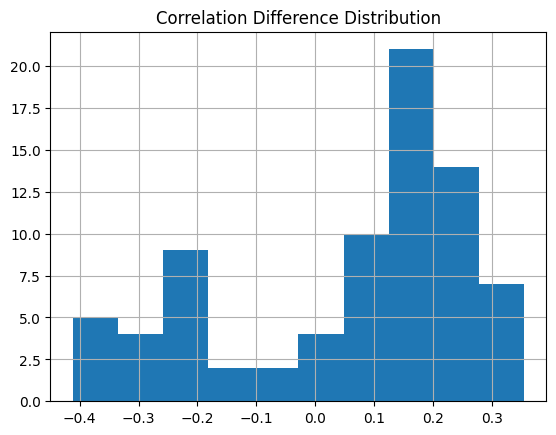

[['mlp'], ['rforest', 'svm_rbf', 'xgb', 'kan', 'dtree', 'svm_poly', 'gb'], ['lr', 'rforest', 'svm_rbf', 'svm_linear', 'xgb', 'kan', 'knn', 'sgd'], ['rforest', 'svm_rbf', 'xgb', 'kan', 'dtree', 'svm_poly', 'knn'], ['adab']]


In [44]:
metrics_df.loc['M-SVR(g)',:] = assr_performance(msvrg, Xa_test_norm, ya_test, Xa_train_norm, ya_train)

results = correlation_pred_performance(msvrg, pd.DataFrame(Xa_test_norm, index=Xa_test.index), 
                                       ya_test, min_score=MIN_SCORE, name="MultiSVR-Group")

diff_metrics.loc['M-SVR(g)',:] = results['results']

groups['msvrg_assessor'] = results['groups']
print(groups['msvrg_assessor']['test'])

### Multi-Target Random Forest Regressor

In [ ]:
mrfg = GroupedAssessor([RandomForestRegressor(random_state=seed) for _ in range(len(groups['true_assessor_train']))])

mrfg.fit(Xa_train, ya_train, groups['true_assessor_train'])

c:\Users\pedro\pyenvs\mainpy\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\pedro\pyenvs\mainpy\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\pedro\pyenvs\mainpy\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[TRAINING SET]
MSE: 0.0103
NMSE: 0.0996
MAE: 0.0666
NMAE: 0.2563
aRRMSE: 0.3141
aCC: 0.9660

[TESTING SET]
MSE: 0.0772
NMSE: 0.7313
MAE: 0.1874
NMAE: 0.7067
aRRMSE: 0.8513
aCC: 0.5200


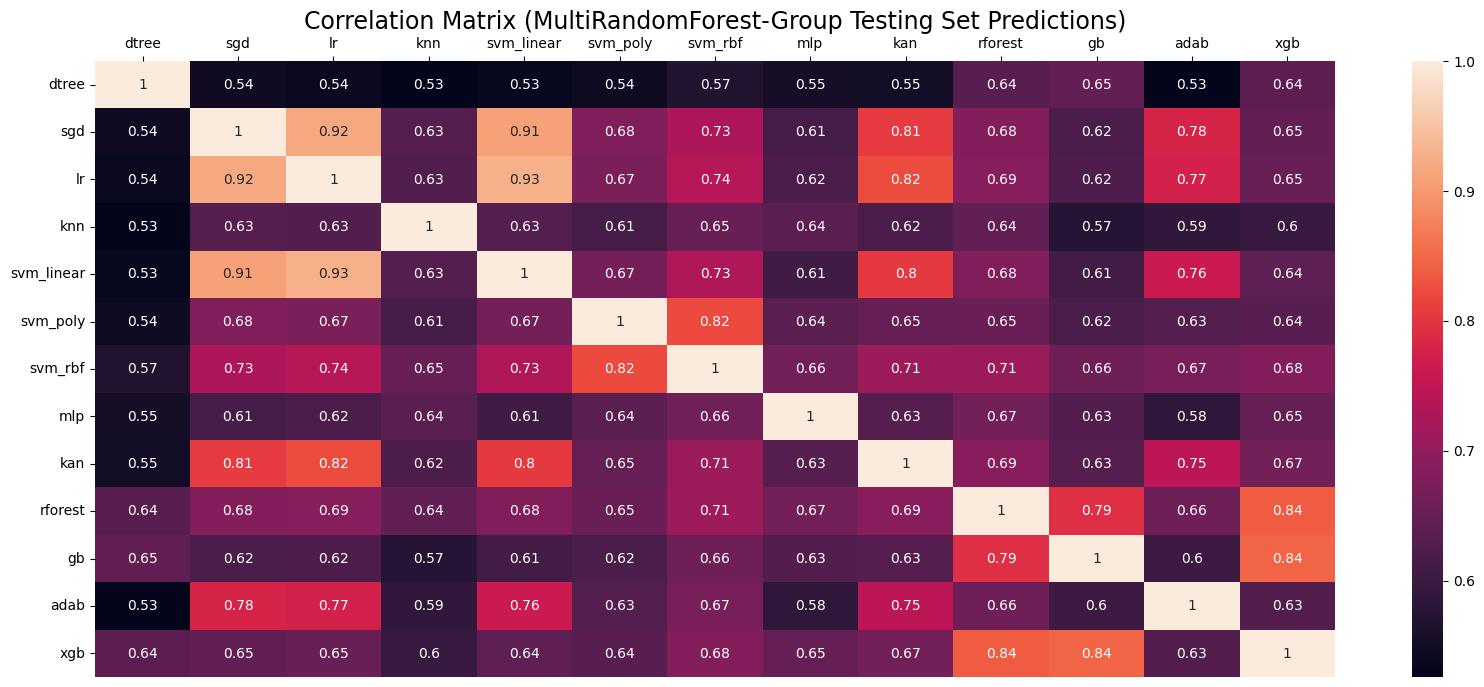

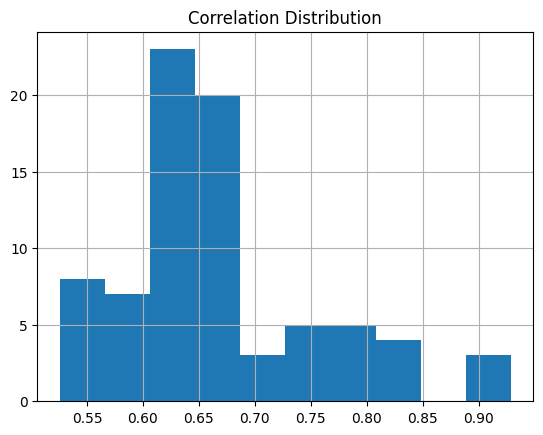

Testing correlation distribution:
count    78.000000
mean      0.667226
std       0.090310
min       0.525744
25%       0.619699
50%       0.647656
75%       0.687940
max       0.928777
Name: corr, dtype: float64

Diferença entre correlações das previsões do assessor e do conjunto de teste:
MSE: 0.0154
NMSE: 0.1103
MAE: 0.6356
NMAE: 1.0473
aRRMSE: 0.7821
aCC: 0.9780


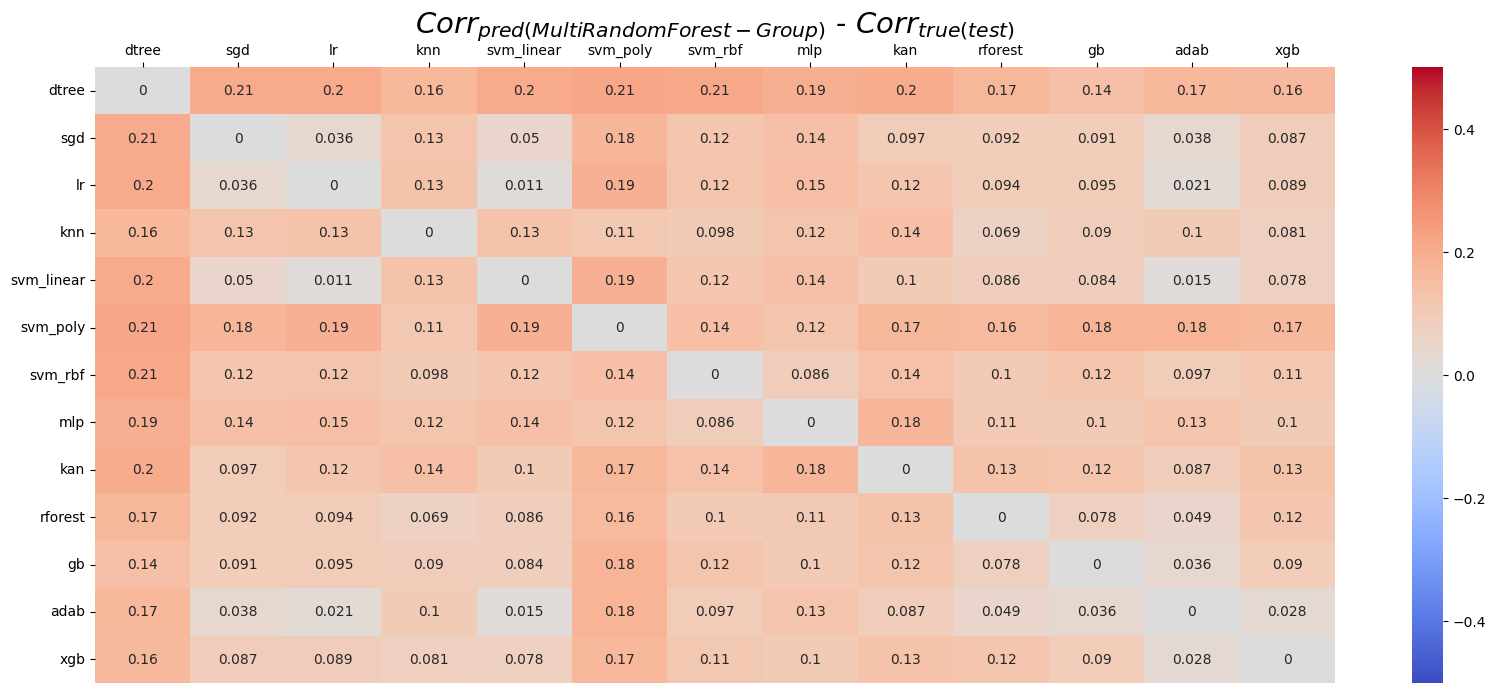

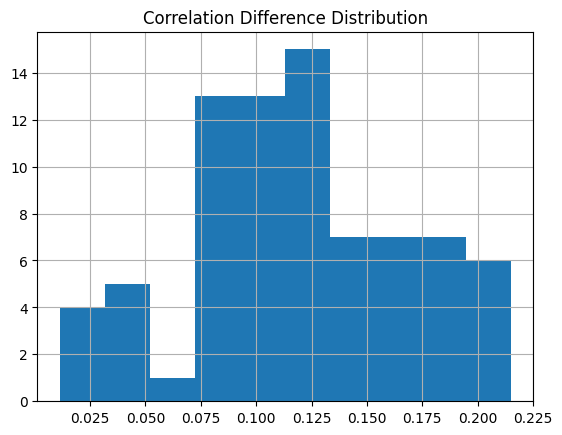

[['dtree'], ['mlp', 'xgb', 'rforest', 'svm_rbf'], ['lr', 'rforest', 'svm_rbf', 'svm_linear', 'kan', 'svm_poly', 'sgd'], ['lr', 'rforest', 'svm_rbf', 'svm_linear', 'kan', 'adab', 'sgd'], ['lr', 'rforest', 'svm_rbf', 'xgb', 'kan'], ['gb', 'rforest', 'svm_rbf', 'xgb'], ['knn', 'svm_rbf']]


In [46]:
metrics_df.loc['MRT(g)',:] = assr_performance(mrfg, Xa_test, ya_test, Xa_train, ya_train)

results = correlation_pred_performance(mrfg, Xa_test, ya_test, min_score=MIN_SCORE, name="MultiRandomForest-Group")

diff_metrics.loc['MRT(g)',:] = results['results']

groups['mrfg_assessor'] = results['groups']
print(groups['mrfg_assessor']['test'])

In [47]:
#keys = list(groups.keys())
#OBJV = len(groups['true_assessor_test'])
#for i in range(len(keys)):
#    if('test' in keys[i] and keys[i] != 'true_assessor_test'):
#        print(f'{keys[i]}({len(groups[keys[i]])}) & true_assessor_test({OBJV}):')
#        count = 0
#        for g in groups[keys[i]]:
#            if(g in groups['true_assessor_test']):
#                print(g)
#                count += 1
#        print(f'Número de grupos em comum: {count}\n\n')

## Análises

In [71]:
results_df = metrics_df.dropna().copy()
results_df = results_df.reset_index().sort_values(by='Assessor')

results_df

Assessor       Model       MSE       MAE      NMSE      NMAE    aRRMSE  \
4          RC          lr  0.040188  0.591167  0.133254  0.594507  0.768874   
5          RC         kan  0.037168  0.591912  0.123581  0.586229  0.769358   
6          RC         sgd  0.032903  0.566096  0.118093  0.571083  0.752393   
7          RC  svm_linear  0.038628  0.576955  0.129083  0.580858  0.759575   
10      RC(g)         sgd   0.03177  0.546606  0.116309  0.562458  0.739328   
11      RC(g)  svm_linear  0.038628  0.576955  0.129083  0.580858  0.759575   
9       RC(g)         kan  0.037375   0.59521  0.121718  0.577389  0.771499   
8       RC(g)          lr  0.040188  0.591167  0.133254  0.594507  0.768874   
43     RC[10]  svm_linear  0.036427  0.544076  0.128813  0.579641  0.737615   
40     RC[10]          lr  0.038879  0.571907  0.132105   0.58938  0.756245   
41     RC[10]         kan  0.035189  0.560394  0.121432  0.576035  0.748595   
42     RC[10]         sgd  0.031081  0.534757  0.116127  0.561576  0.731271   
12  RC[10](g)          lr  0.038726  0.569665  0.131511  0.586731  0.754761   
13  RC[10](g)         kan  0.036034  0.573848  0.122196  0.579659  0.757528   
14  RC[10](g)         sgd  0.031253  0.537712   0.11481   0.55521  0.733288   
15  RC[10](g)  svm_linear   0.03616  0.540082  0.129014  0.580545  0.734903   
16     RC[30]          lr  0.038641  0.568413  0.132493  0.591111  0.753932   
17     RC[30]         kan   0.03507  0.558495  0.121232  0.575084  0.747325   
18     RC[30]         sgd  0.030848  0.530753  0.115418  0.558149  0.728528   
19     RC[30]  svm_linear  0.036311  0.542344   0.12906  0.580755   0.73644   
22  RC[30](g)         sgd  0.031241  0.537506  0.114741  0.554873  0.733148   
23  RC[30](g)  svm_linear  0.036282  0.541909  0.128839  0.579758  0.736145   
21  RC[30](g)         kan  0.036039  0.573926  0.122278  0.580044  0.757579   
20  RC[30](g)          lr  0.038497   0.56629  0.131561  0.586953  0.752522   
24     RC[50]          lr  0.038542  0.566952  0.132199  0.589798  0.752962   
25     RC[50]         kan  0.035082  0.558695  0.121332  0.575561  0.747459   
26     RC[50]         sgd  0.030849  0.530756  0.115266  0.557416   0.72853   
27     RC[50]  svm_linear  0.036208  0.540806  0.129064  0.580774  0.735395   
31  RC[50](g)  svm_linear  0.036411  0.543842  0.128816  0.579658  0.737457   
28  RC[50](g)          lr  0.038508  0.566454  0.131677  0.587468  0.752631   
29  RC[50](g)         kan  0.036034  0.573848  0.122196  0.579659  0.757528   
30  RC[50](g)         sgd  0.031235  0.537403  0.114812  0.555216  0.733078   
35     RC[80]  svm_linear  0.036094  0.539108  0.129141   0.58112   0.73424   
34     RC[80]         sgd  0.030892  0.531496  0.115135  0.556783  0.729038   
33     RC[80]         kan  0.035129  0.559431  0.121425     0.576  0.747951   
32     RC[80]          lr   0.03855  0.567078  0.132149  0.589574  0.753046   
39  RC[80](g)  svm_linear  0.036433  0.544158  0.128952  0.580268  0.737671   
36  RC[80](g)          lr  0.038527  0.566726  0.131758  0.587829  0.752812   
37  RC[80](g)         kan  0.036034  0.573848  0.122196  0.579659  0.757528   
38  RC[80](g)         sgd  0.031269  0.537984  0.114814  0.555229  0.733474   
1          ST         kan  0.037375   0.59521  0.121718  0.577389  0.771499   
3          ST  svm_linear  0.038628  0.576955  0.129083  0.580858  0.759575   
2          ST         sgd  0.032947  0.566861   0.11546  0.558353  0.752902   
0          ST          lr  0.040561  0.596657  0.131293  0.585756  0.772436   

         aCC  
4   0.644206  
5   0.644486  
6   0.662237  
7   0.658345  
10  0.675103  
11  0.658345  
9   0.645028  
8   0.644206  
43  0.677237  
40   0.65624  
41  0.665101  
42  0.682709  
12  0.658299  
13  0.656925  
14  0.681687  
15  0.679547  
16  0.658344  
17  0.666498  
18  0.685742  
19  0.678139  
22  0.681876  
23  0.678532  
21   0.65683  
20  0.660417  
24  0.659447  
25  0.666257  
26   0.68577  
27  0.679071  
31  0.677372  

In [63]:
diff_results = diff_metrics.dropna().reset_index(names=['Assessor'])
diff_results.to_csv(f'data/{DIR}/results_diff_RC.csv') # MUDAR PARA O NORMAL
diff_results

Assessor       MSE       MAE      NMSE      NMAE    aRRMSE       aCC
0          ST  0.000569  0.017482  0.145393  0.324896  0.354796   0.98244
1          RC  0.014611  0.101206  3.466774  1.837188  1.841709  0.940557
2       RC(g)  0.012778  0.088835  3.098307  1.636243  1.738741  0.863439
3      RC[10]  0.001738  0.032512  0.415974  0.593957  0.625252  0.962595
4   RC[10](g)  0.000714  0.019238   0.17305  0.353698  0.401032  0.969318
5      RC[30]  0.000518  0.012203  0.120202  0.221941  0.291809  0.966893
6   RC[30](g)  0.000541  0.016208  0.132212  0.300077  0.352366  0.975612
7      RC[50]  0.000275  0.008596  0.063643  0.155303  0.210015  0.977191
8   RC[50](g)  0.000724  0.018633  0.176076  0.345201  0.402656  0.968822
9      RC[80]  0.000187  0.008764  0.043022  0.157572  0.190318  0.982885
10  RC[80](g)   0.00073  0.019056  0.179066  0.353339  0.405106  0.968229

In [64]:
win_table = pd.DataFrame(index=results_df['Assessor'].unique(), columns=results_df.drop(columns=['Assessor', 'Model']).columns)

for mt in ['MSE', 'MAE', 'NMSE', 'NMAE', 'aRRMSE']:
    assr_wins = results_df.loc[results_df.groupby("Model")[mt].idxmin(), ["Model", "Assessor", mt]]
    win_table[mt] = assr_wins['Assessor'].value_counts()

assr_wins = results_df.loc[results_df.groupby("Model")['aCC'].idxmin(), ["Model", "Assessor", 'aCC']]
win_table['aCC'] = assr_wins['Assessor'].value_counts()

win_table = win_table.fillna(0)
win_table.to_csv(f'data/{DIR}/win_table_RC.csv') # MUDAR PARA NORMAL
win_table

MSE  MAE  NMSE  NMAE  aRRMSE  aCC
ST         0.0  0.0   1.0   1.0     0.0  2.0
RC         0.0  0.0   0.0   0.0     0.0  2.0
RC(g)      0.0  0.0   0.0   0.0     0.0  0.0
RC[10](g)  0.0  0.0   0.0   0.0     0.0  0.0
RC[30]     2.0  2.0   1.0   1.0     2.0  0.0
RC[30](g)  1.0  1.0   1.0   1.0     1.0  0.0
RC[50]     0.0  0.0   0.0   0.0     0.0  0.0
RC[50](g)  0.0  0.0   0.0   0.0     0.0  0.0
RC[80]     1.0  1.0   0.0   0.0     1.0  0.0
RC[80](g)  0.0  0.0   0.0   0.0     0.0  0.0
RC[10]     0.0  0.0   1.0   1.0     0.0  0.0

In [65]:
summary = results_df.drop(columns=['Model']).groupby(['Assessor']).agg(['mean', 'std'])
summary.to_csv(f'data/{DIR}/results_RC.csv') # MUDAR PARA O NORMAL
summary

MSE                 MAE                NMSE            \
               mean       std      mean       std      mean       std   
Assessor                                                                
RC         0.037222  0.003132  0.581532  0.012380  0.126003  0.006596   
RC(g)       0.03699  0.003666  0.577484  0.022024  0.125091  0.007552   
RC[10]     0.035394  0.003258  0.552783  0.016577  0.124619  0.007209   
RC[10](g)  0.035543  0.003118  0.555327  0.019073  0.124383  0.007498   
RC[30]     0.035218  0.003267  0.550001  0.016736  0.124551  0.007699   
RC[30](g)  0.035515  0.003056  0.554908  0.017917  0.124355  0.007501   
RC[50]      0.03517  0.003221  0.549302  0.016491  0.124465  0.007646   
RC[50](g)  0.035547  0.003074  0.555387  0.017512  0.124375  0.007511   
RC[80]     0.035166  0.003193  0.549278  0.016729  0.124463  0.007685   
RC[80](g)  0.035565  0.003066  0.555679  0.017301   0.12443  0.007563   
ST         0.037378  0.003232  0.583921  0.014482  0.124388  0.007224   

               NMAE              aRRMSE                 aCC            
               mean       std      mean       std      mean       std  
Assessor                                                               
RC         0.583169  0.009821   0.76255  0.008131  0.652319  0.009343  
RC(g)      0.578803  0.013166  0.759819  0.014587  0.655671  0.014485  
RC[10]     0.576658  0.011527  0.743431  0.011144  0.670322  0.011928  
RC[10](g)  0.575536  0.013911   0.74512  0.012797  0.669115  0.013323  
RC[30]     0.576275  0.013786  0.741556  0.011289  0.672181  0.012154  
RC[30](g)  0.575407  0.014088  0.744849  0.012022  0.669414  0.012619  
RC[50]     0.575887  0.013646  0.741087  0.011131  0.672636  0.011952  
RC[50](g)    0.5755  0.014015  0.745173  0.011749   0.66911  0.012366  
RC[80]     0.575869  0.013901  0.741069  0.011287  0.672673  0.012120  
RC[80](g)  0.575746  0.014174  0.745371  0.011605  0.668912  0.012253  
ST         0.575589  0.011992  0.764103  0.009488  0.652783  0.010818

In [66]:
results_df_c = results_df.copy()

In [51]:
class_palette = sns.color_palette()[:7]

In [97]:
from torch import relu
from torch import Tensor

class_palette = [
                 sns.color_palette('bright')[-3],
                 sns.color_palette('bright')[3], relu(Tensor(sns.color_palette()[3])-Tensor([0.2]*3)).tolist(),
                 sns.color_palette('bright')[2], relu(Tensor(sns.color_palette()[2])-Tensor([0.15]*3)).tolist(),
                 sns.color_palette('bright')[0], relu(Tensor(sns.color_palette()[0])-Tensor([0.15]*3)).tolist(),
                 sns.color_palette('bright')[8], relu(Tensor(sns.color_palette()[8])-Tensor([0.15]*3)).tolist(),
                 sns.color_palette('bright')[4], relu(Tensor(sns.color_palette()[4])-Tensor([0.15]*3)).tolist(),
                 
                 ]

In [75]:
results_df['Assessor'].unique()

array(['RC', 'RC(g)', 'RC[10]', 'RC[10](g)', 'RC[30]', 'RC[30](g)',
       'RC[50]', 'RC[50](g)', 'RC[80]', 'RC[80](g)', 'ST'], dtype=object)

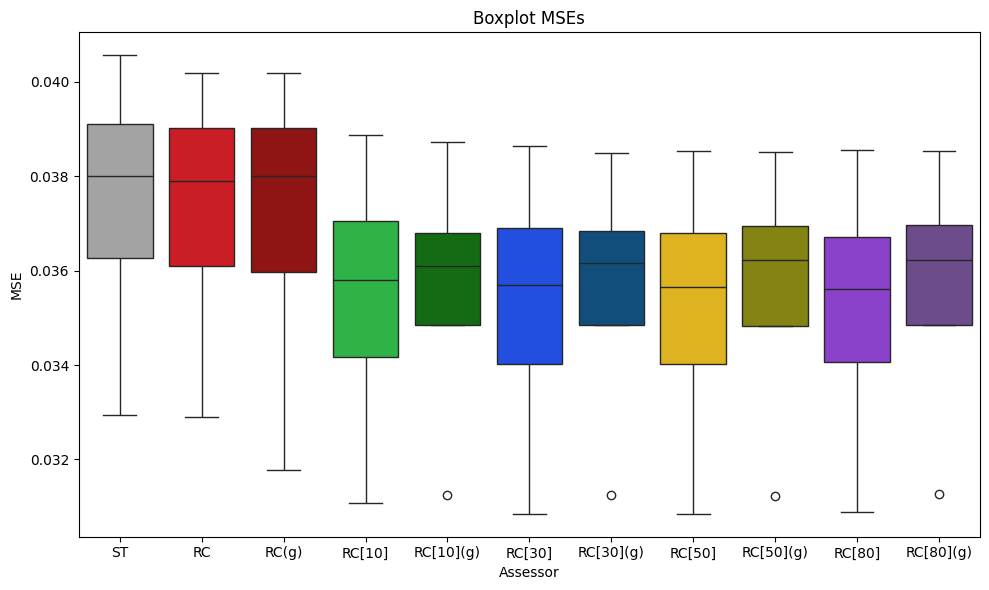

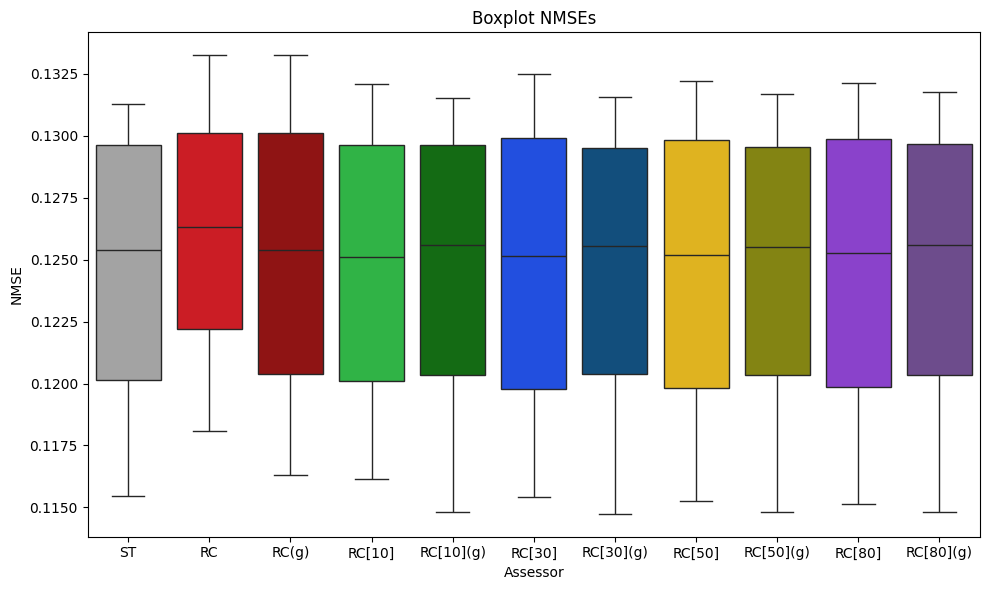

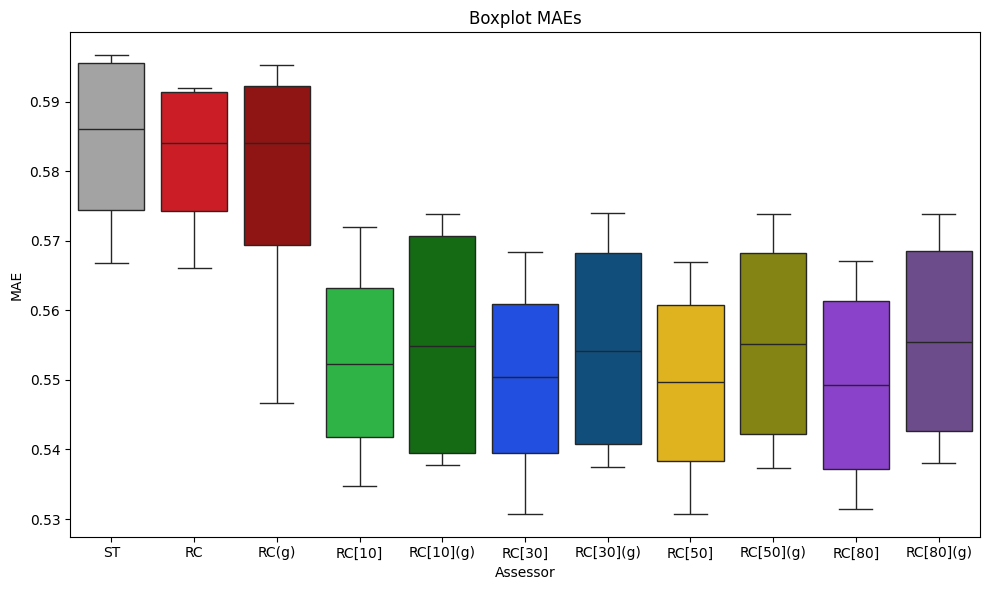

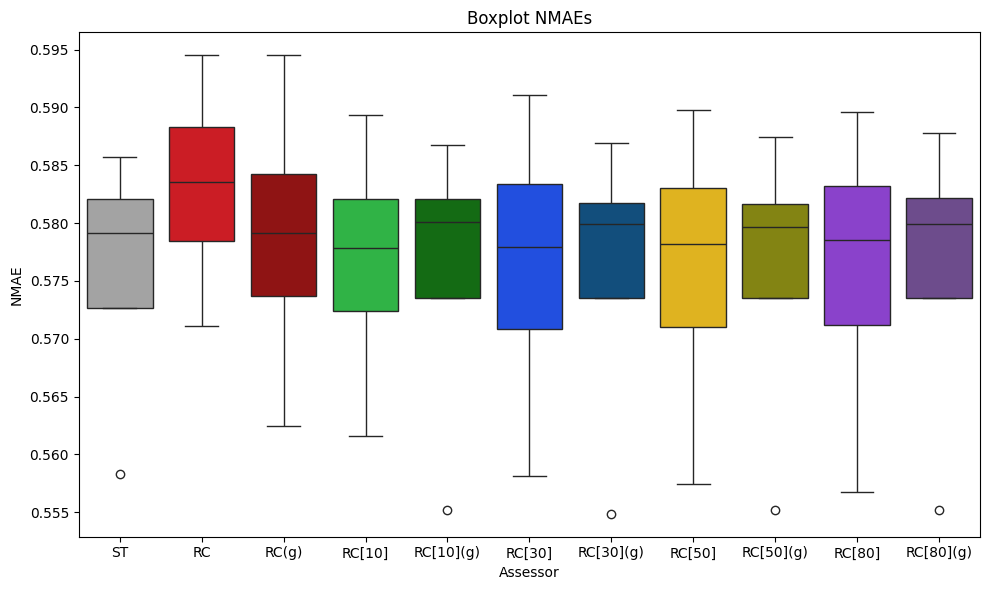

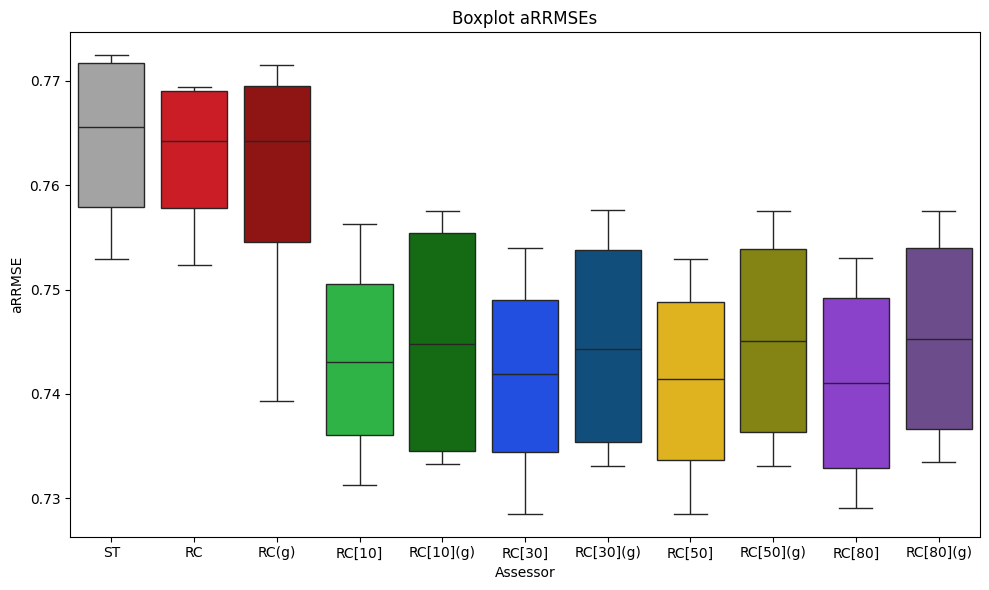

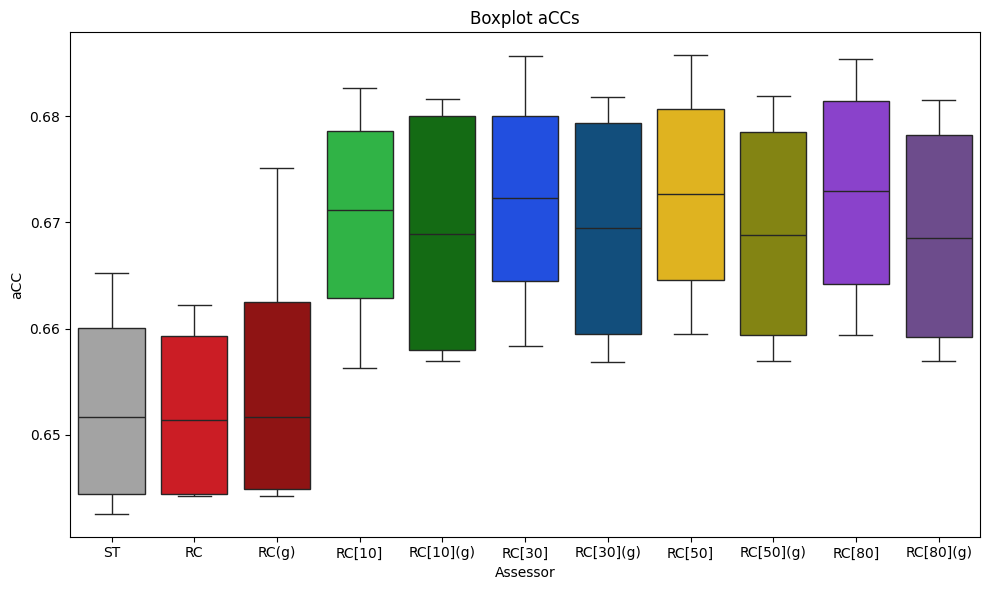

In [90]:
#temp = results_df.drop(index=results_df[results_df['Assessor'].str.contains('M-SVR')].index) #.copy()

for mt in ['MSE', 'NMSE', 'MAE', 'NMAE', 'aRRMSE', 'aCC']:
    plt.figure(figsize=(10,6))
    plt.title(f'Boxplot {mt}s')
    temp = results_df.loc[:,['Assessor','Model',mt]].copy()
    if((temp[mt] > 1.2).any()):
        dicio = {}
        for a in temp['Assessor'].unique():
            out_limits = (temp.loc[temp["Assessor"]==a,mt]>1.2).sum()
            if(out_limits > 0):
                dicio[a] = a + "*"*out_limits
        temp = temp.replace(dicio)
        plt.ylim(bottom=temp[mt].min()-0.017,top=temp.loc[temp[mt]<1.2,mt].max()+0.017)
    imgplt = sns.boxplot(temp, y=mt, x='Assessor', hue='Assessor', palette=class_palette, order=['ST', 'RC', 'RC(g)', 'RC[10]', 'RC[10](g)', 'RC[30]', 'RC[30](g)', 'RC[50]', 'RC[50](g)', 'RC[80]', 'RC[80](g)'])
    plt.tight_layout()
    plt.show(imgplt)
    imgplt.figure.savefig(f'data/{DIR}/imgs/bp_{mt.lower()}_RC.eps', format='eps', dpi=300)

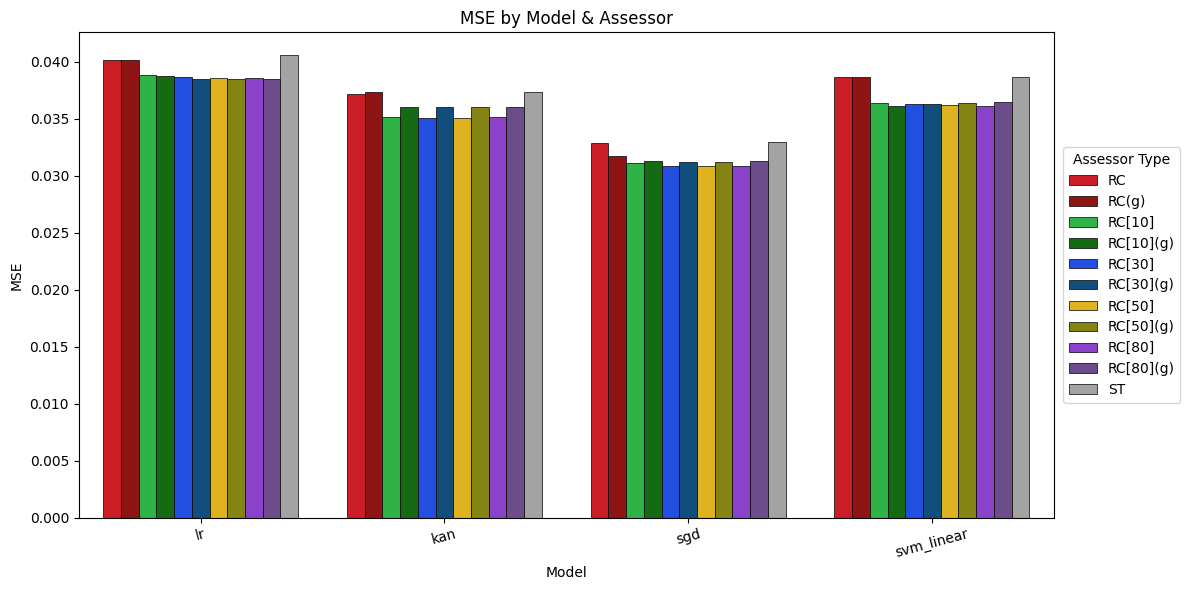

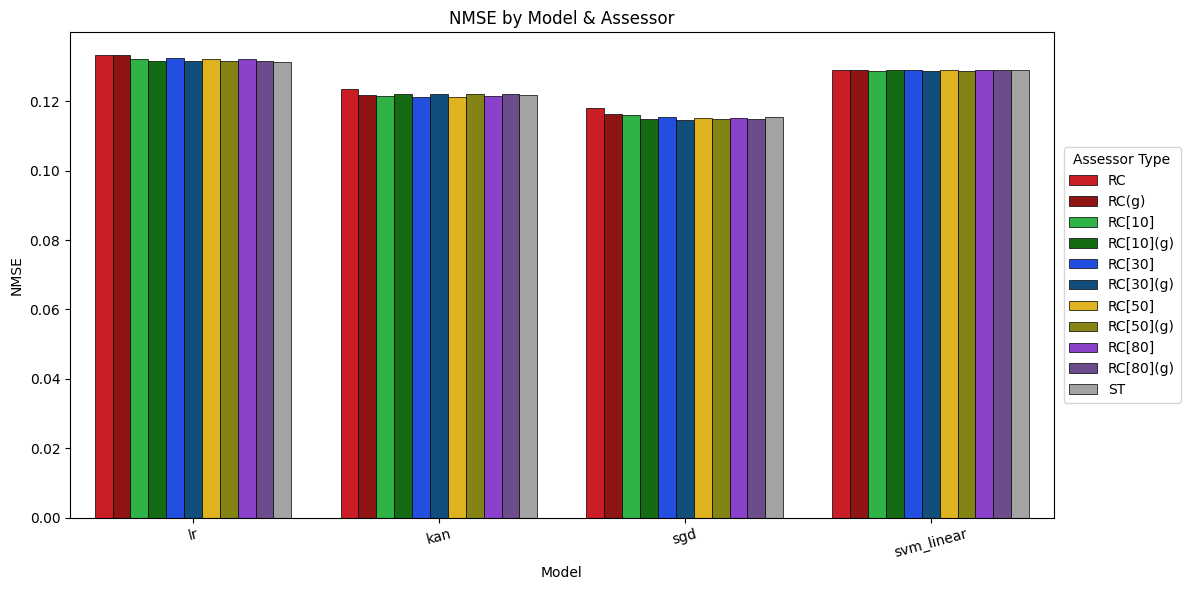

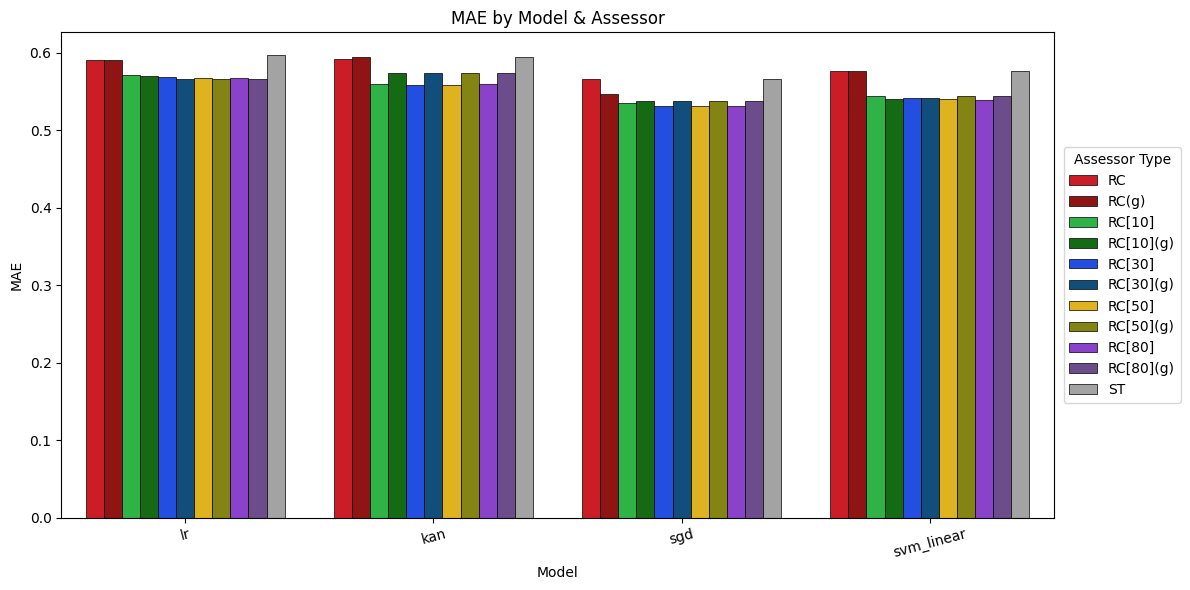

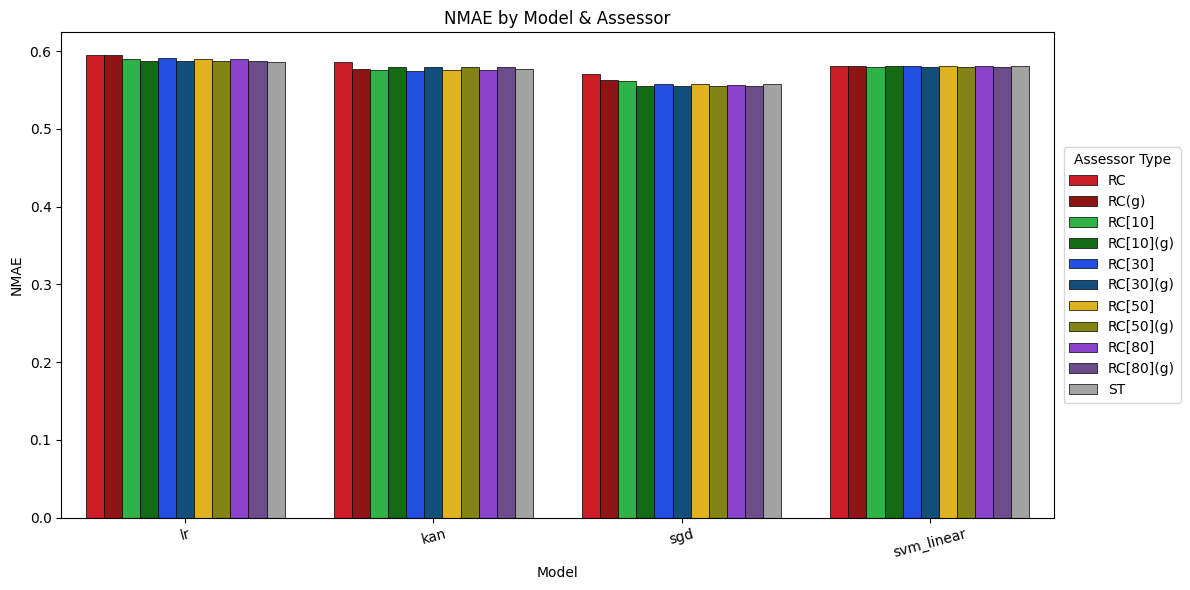

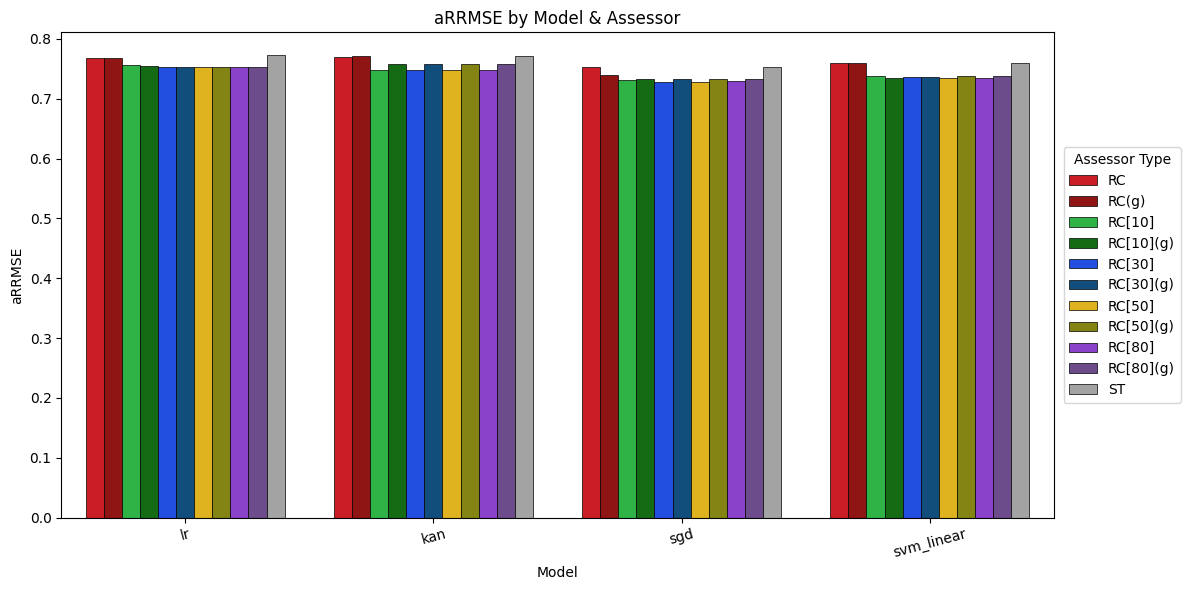

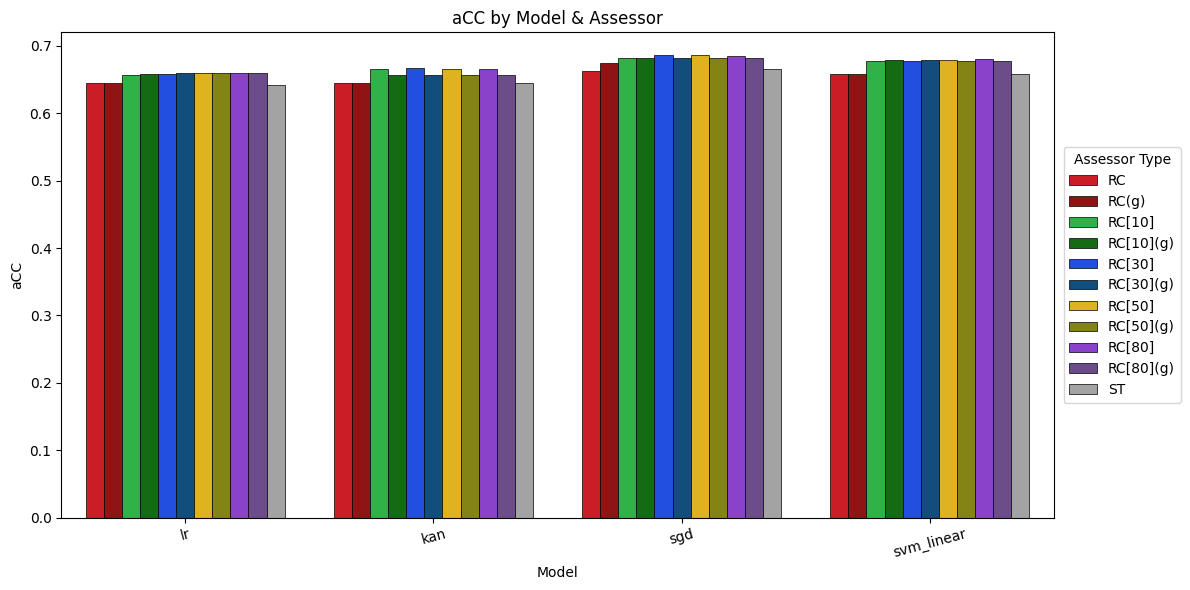

In [91]:
for mt in ['MSE', 'NMSE', 'MAE', 'NMAE', 'aRRMSE', 'aCC']:
    plt.figure(figsize=(12, 6))
    imgplt = sns.barplot(data=results_df, x='Model', y=mt, hue='Assessor', palette=class_palette, edgecolor='black', linewidth=0.5)
    plt.legend(bbox_to_anchor=(1.01, 0.5), loc='center left', borderaxespad=0, title='Assessor Type')
    plt.title(f'{mt} by Model & Assessor')
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show(imgplt)
    #imgplt.figure.savefig(f'data/{DIR}/imgs/bar_{mt.lower()}.eps', format='eps', dpi=300)

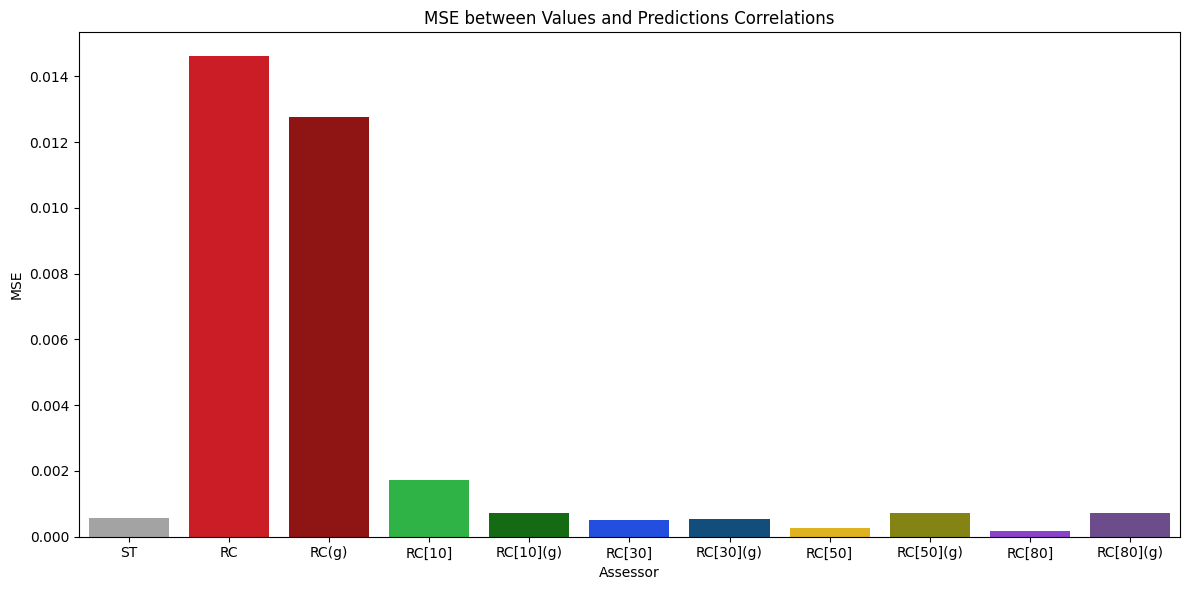

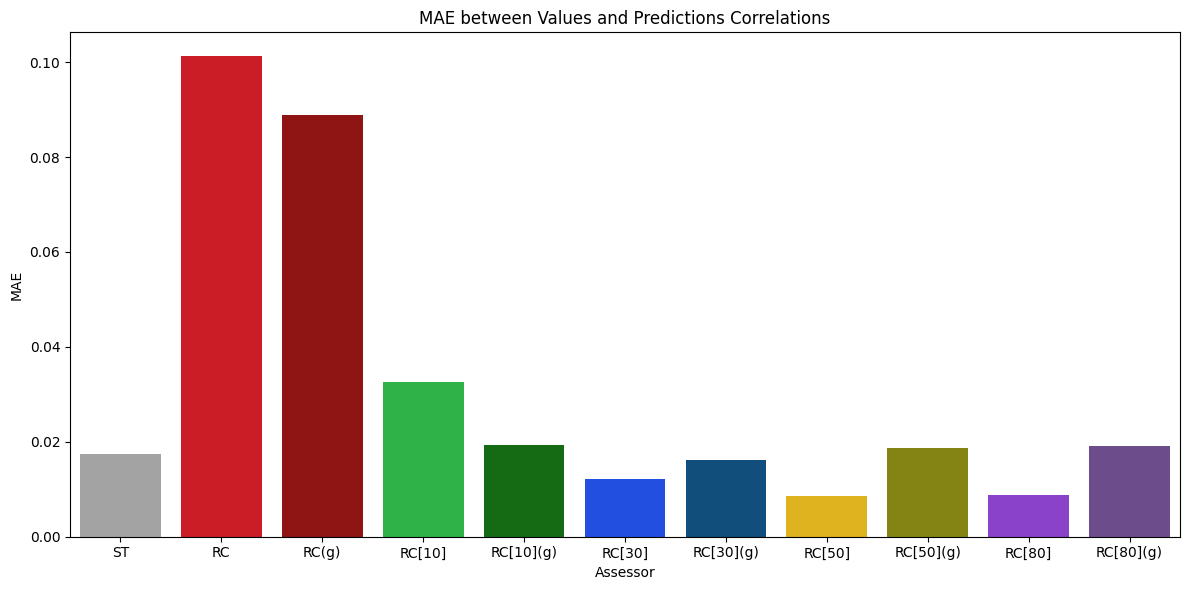

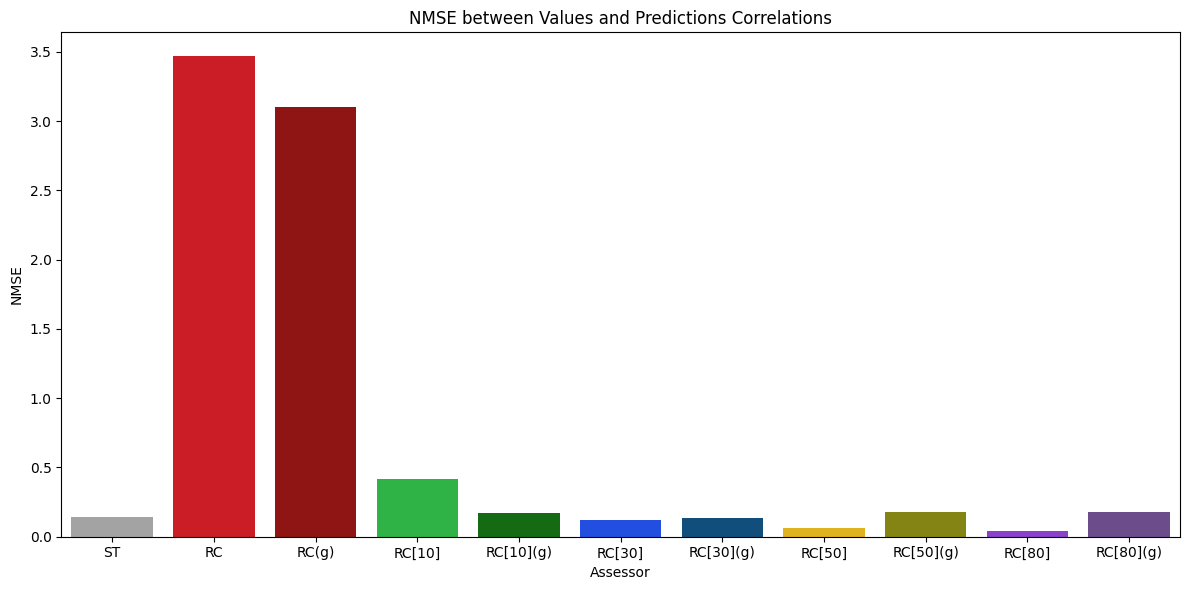

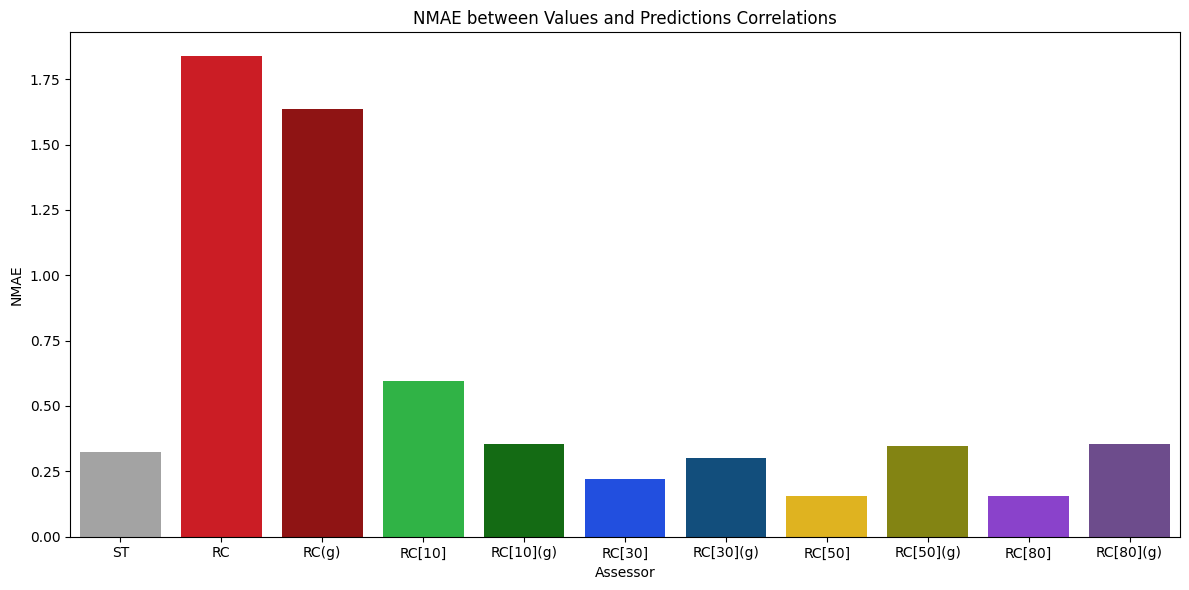

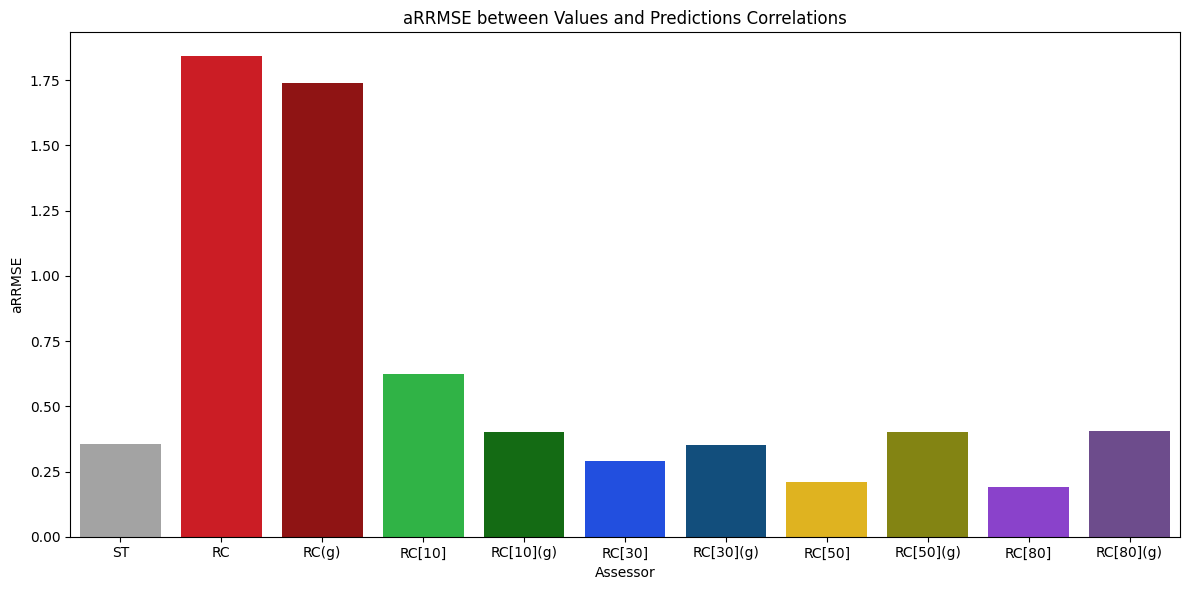

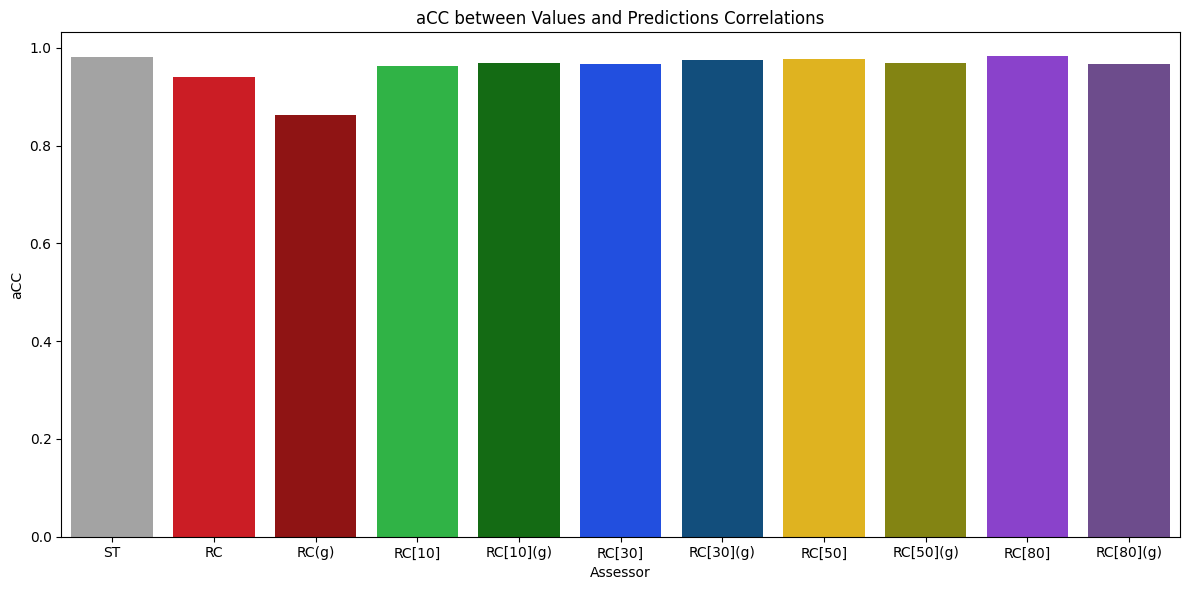

In [98]:
for mt in diff_metrics.columns:
    plt.figure(figsize=(12, 6))
    imgplt = sns.barplot(data=diff_results.loc[:,['Assessor', mt]], x='Assessor', y=mt, hue='Assessor', palette=class_palette, order=['ST', 'RC', 'RC(g)', 'RC[10]', 'RC[10](g)', 'RC[30]', 'RC[30](g)', 'RC[50]', 'RC[50](g)', 'RC[80]', 'RC[80](g)'])
    plt.title(f"{mt} between Values and Predictions Correlations")
    plt.tight_layout()
    plt.show(imgplt)
    #imgplt.figure.savefig(f'data/{DIR}/imgs/bardiff_{mt.lower()}.eps', format='eps', dpi=300)

---

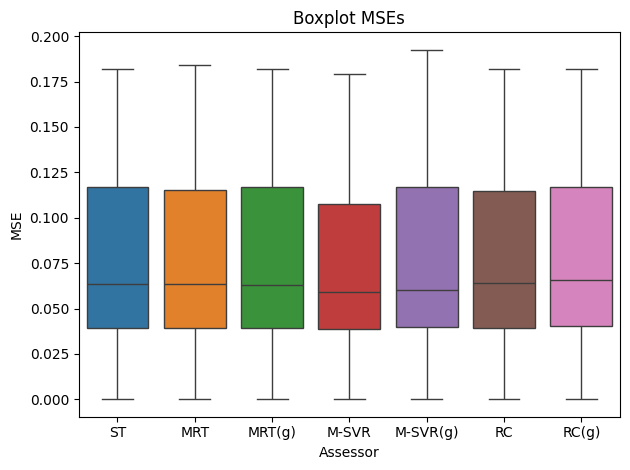

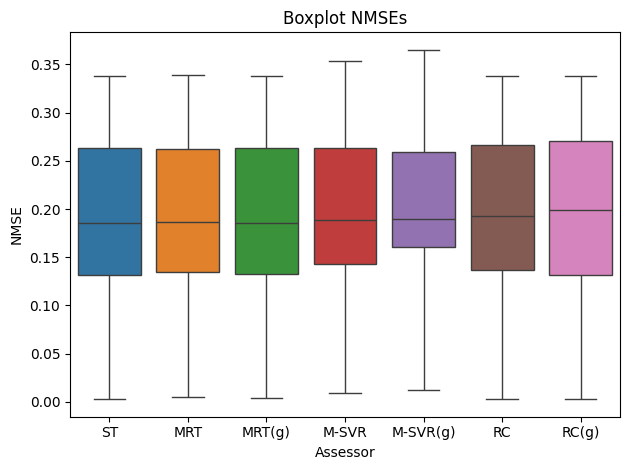

C:\Users\pedro\AppData\Local\Temp\ipykernel_19956\1332952985.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp = temp.replace(dicio)


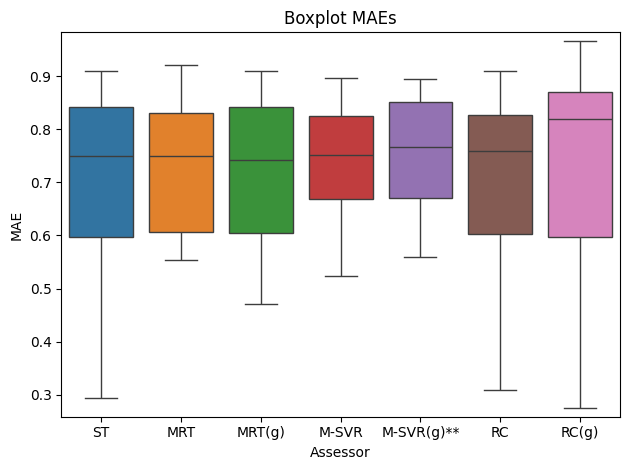

C:\Users\pedro\AppData\Local\Temp\ipykernel_19956\1332952985.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp = temp.replace(dicio)


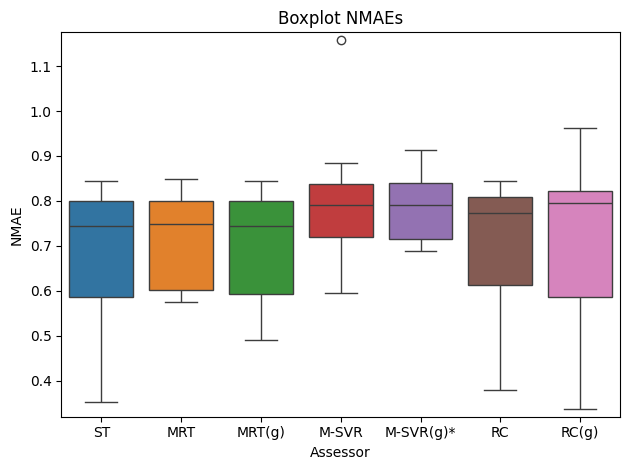

C:\Users\pedro\AppData\Local\Temp\ipykernel_19956\1332952985.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp = temp.replace(dicio)


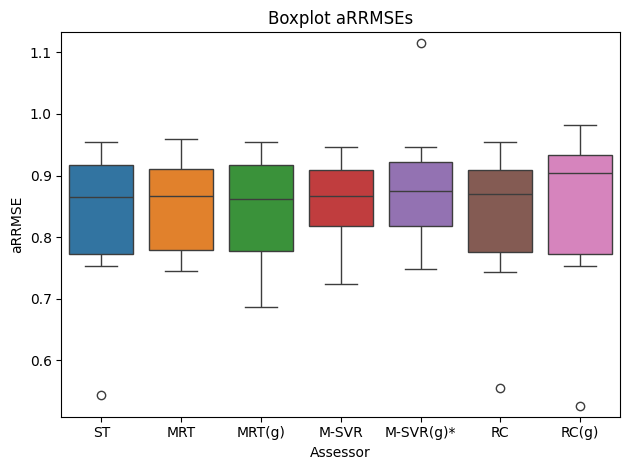

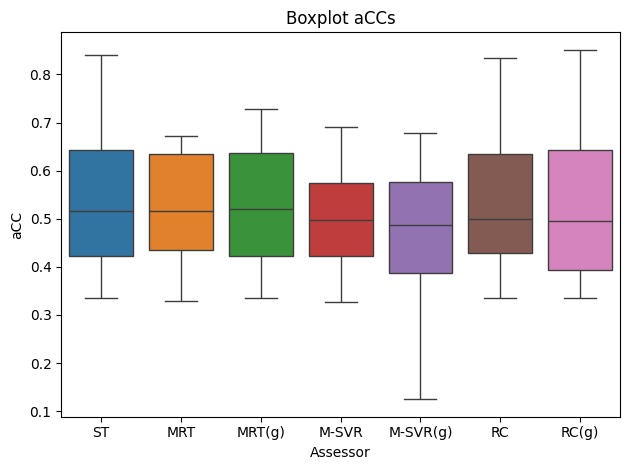

In [54]:
#temp = results_df.drop(index=results_df[results_df['Assessor'].str.contains('M-SVR')].index) #.copy()

for mt in ['MSE', 'NMSE', 'MAE', 'NMAE', 'aRRMSE', 'aCC']:
    plt.title(f'Boxplot {mt}s')
    temp = results_df.loc[:,['Assessor','Model',mt]].copy()
    if((temp[mt] > 1.2).any()):
        dicio = {}
        for a in temp['Assessor'].unique():
            out_limits = (temp.loc[temp["Assessor"]==a,mt]>1.2).sum()
            if(out_limits > 0):
                dicio[a] = a + "*"*out_limits
        temp = temp.replace(dicio)
        plt.ylim(bottom=temp[mt].min()-0.017,top=temp.loc[temp[mt]<1.2,mt].max()+0.017)
    imgplt = sns.boxplot(temp, y=mt, x='Assessor', hue='Assessor', palette=class_palette)
    plt.tight_layout()
    plt.show(imgplt)
    imgplt.figure.savefig(f'data/{DIR}/imgs/bp_{mt.lower()}.eps', format='eps', dpi=300)

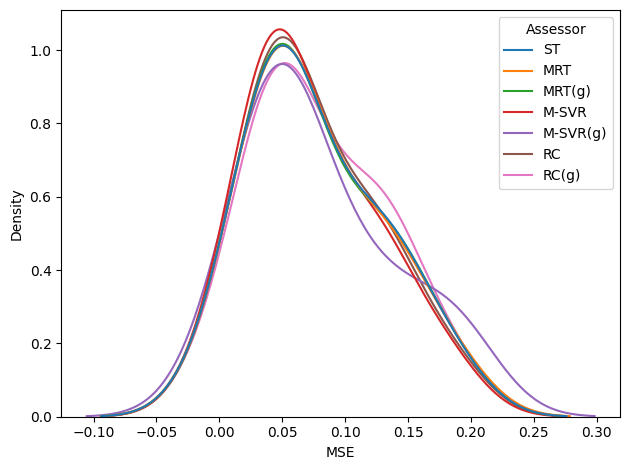

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


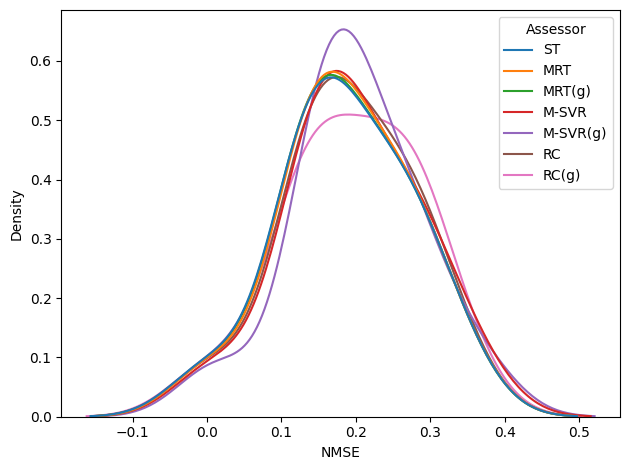

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


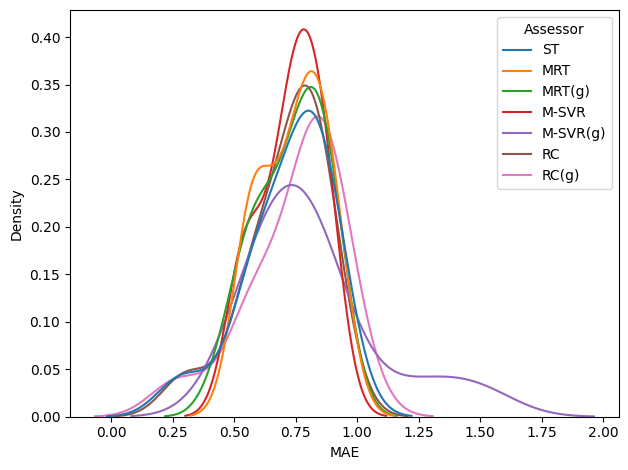

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
C:\Users\pedro\AppData\Local\Temp\ipykernel_19956\1270300147.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp = temp.replace(dicio)


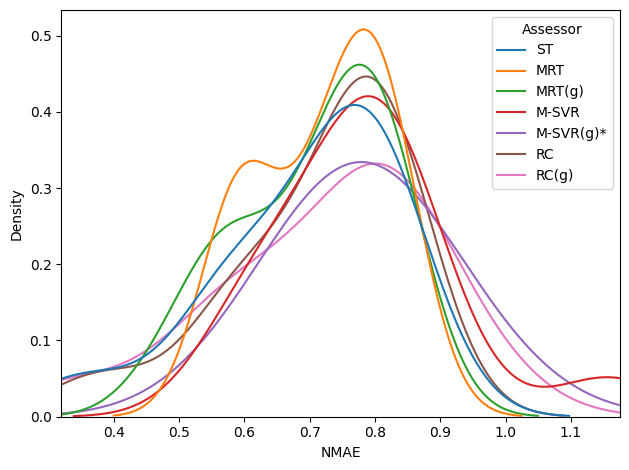

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


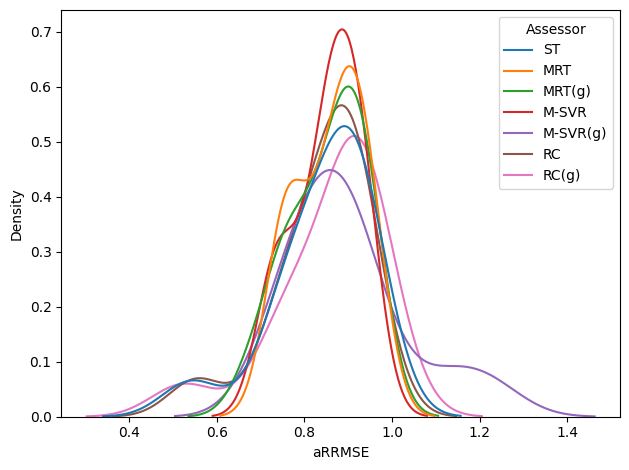

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


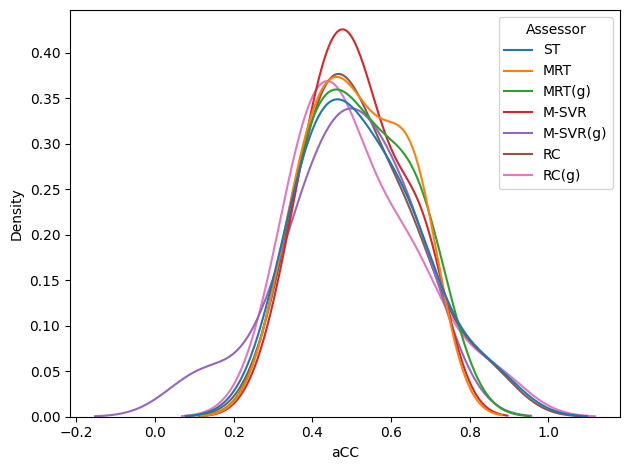

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [55]:
for mt in ['MSE', 'NMSE', 'MAE', 'NMAE', 'aRRMSE', 'aCC']:
    temp = results_df.loc[:,['Assessor','Model',mt]].copy()
    if((temp[mt] > 1.5).any()):
        dicio = {}
        for a in temp['Assessor'].unique():
            out_limits = (temp.loc[temp["Assessor"]==a,mt]>1.5).sum()
            if(out_limits > 0):
                dicio[a] = a + "*"*out_limits
        temp = temp.replace(dicio)
        plt.xlim(temp[mt].min()-0.017,temp.loc[temp[mt]<1.5,mt].max()+0.017)
    imgplt = sns.kdeplot(temp, x=mt, hue='Assessor', palette=class_palette)
    plt.tight_layout()
    plt.show(imgplt)
    imgplt.figure.savefig(f'data/{DIR}/imgs/kde_{mt.lower()}.eps', format='eps', dpi=300)

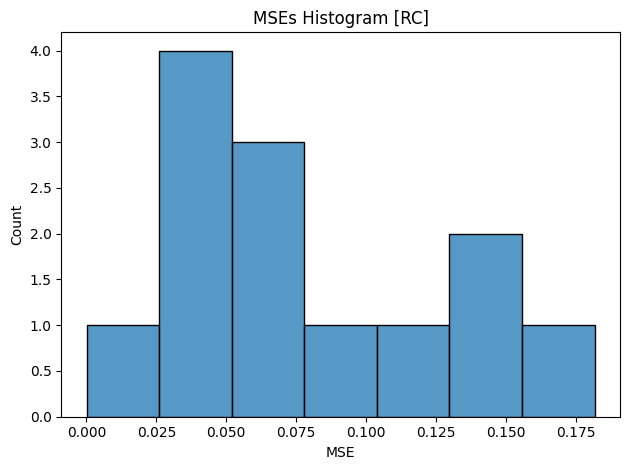

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


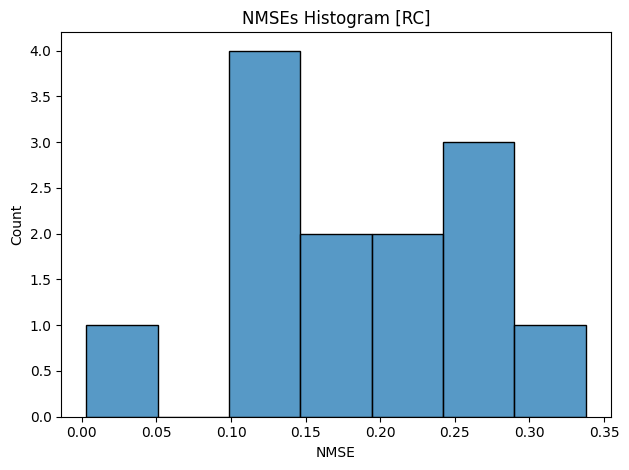

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


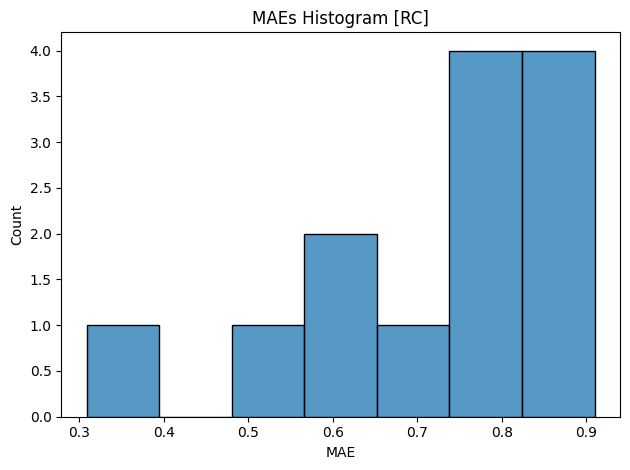

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


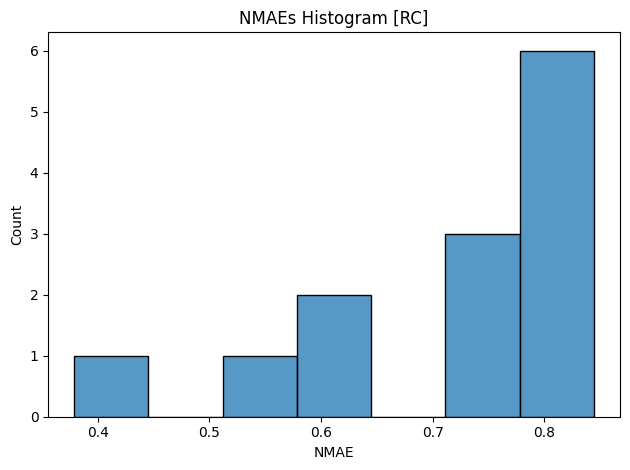

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


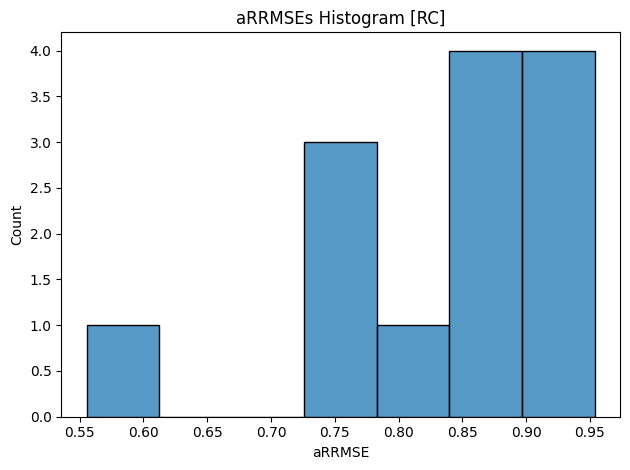

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


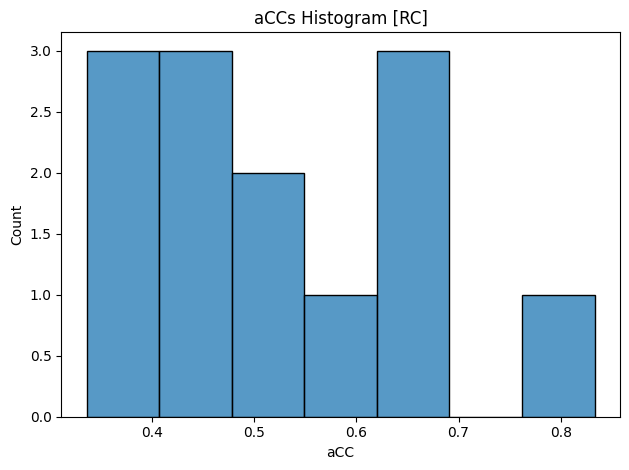

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


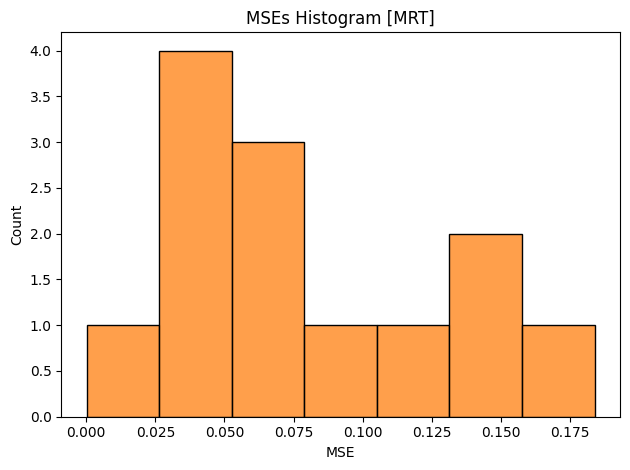

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


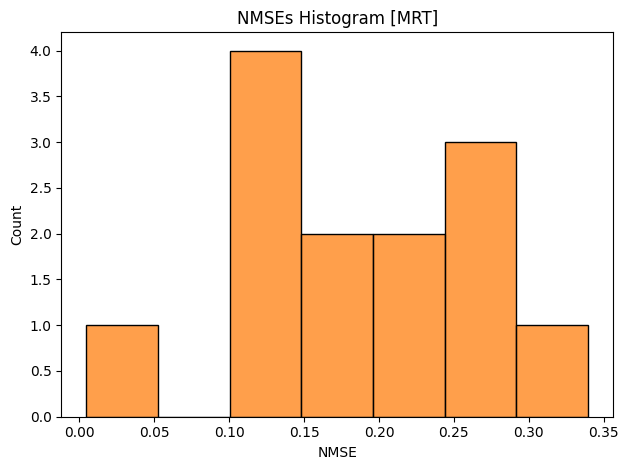

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


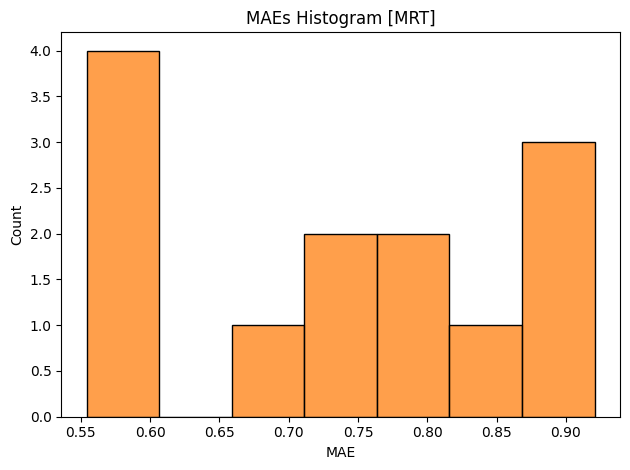

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


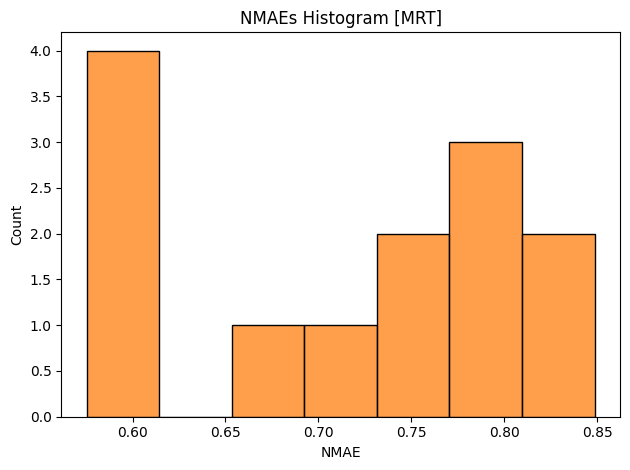

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


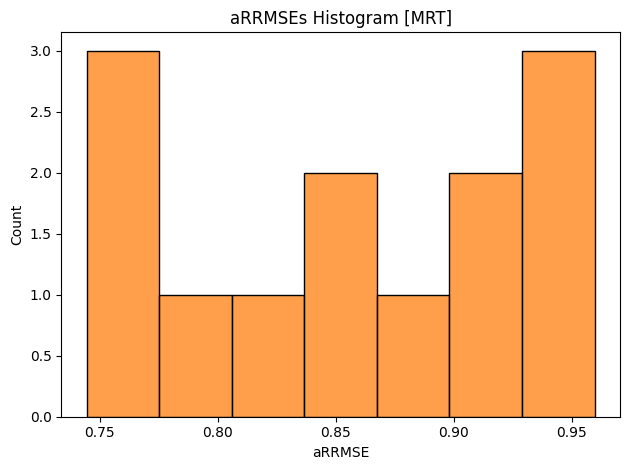

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


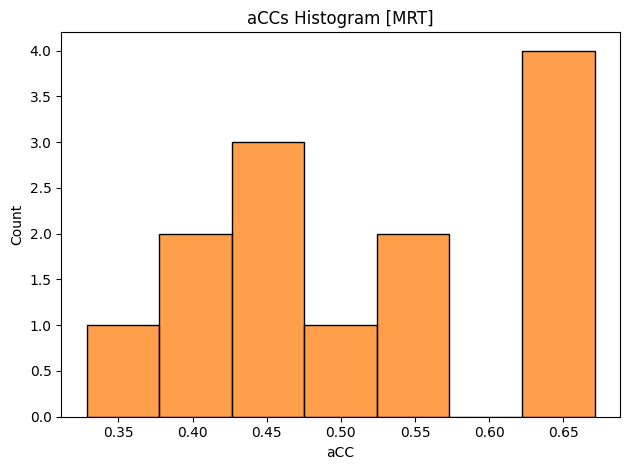

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


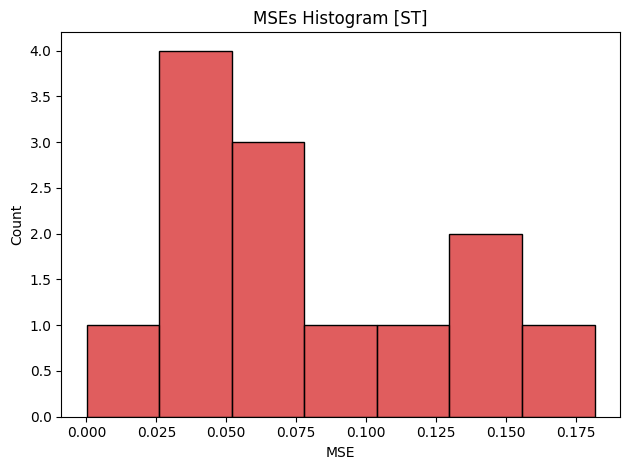

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


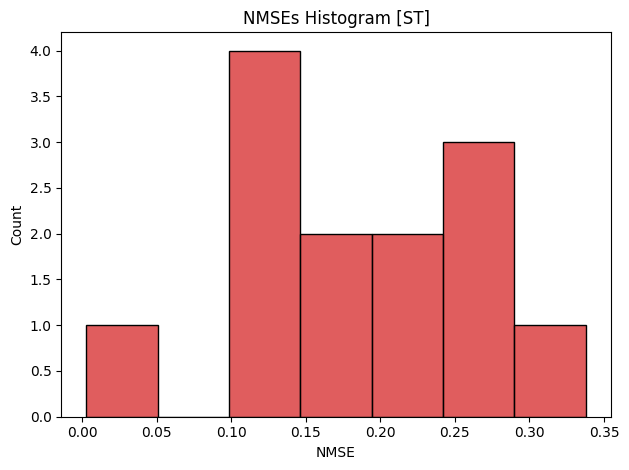

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


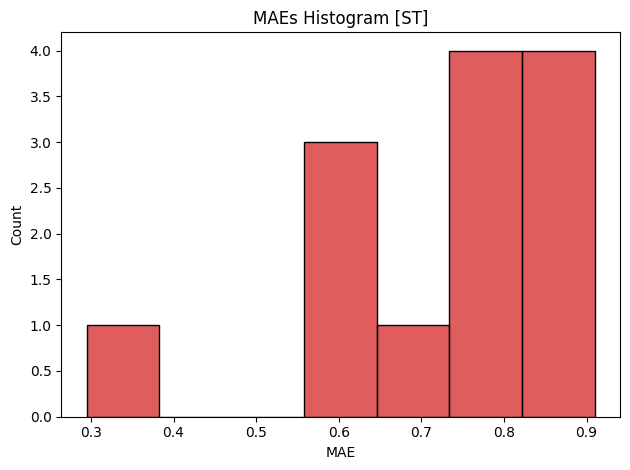

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


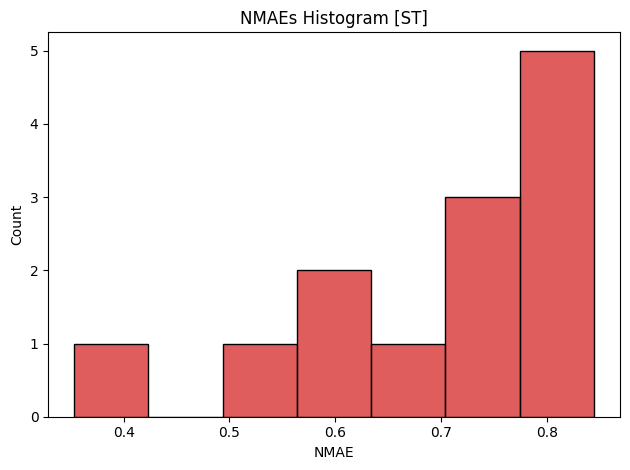

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


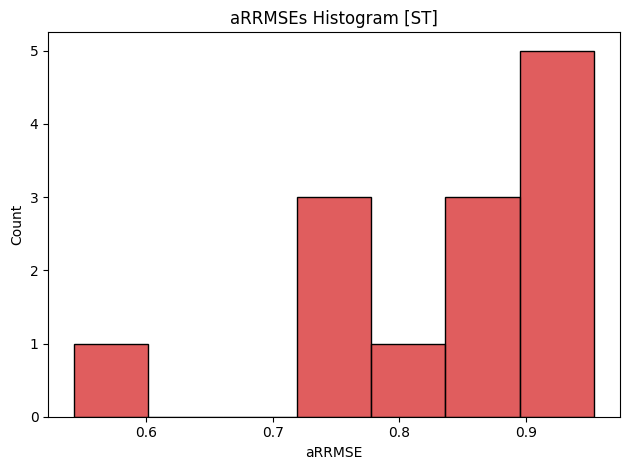

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


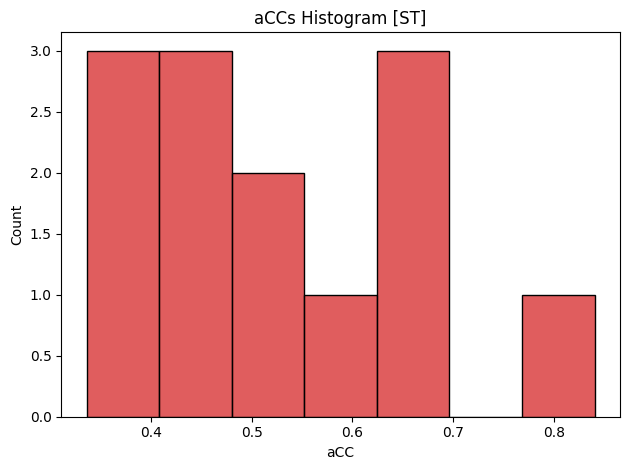

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


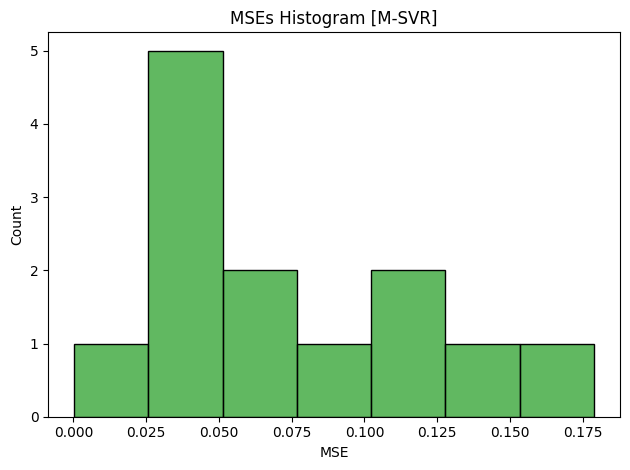

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


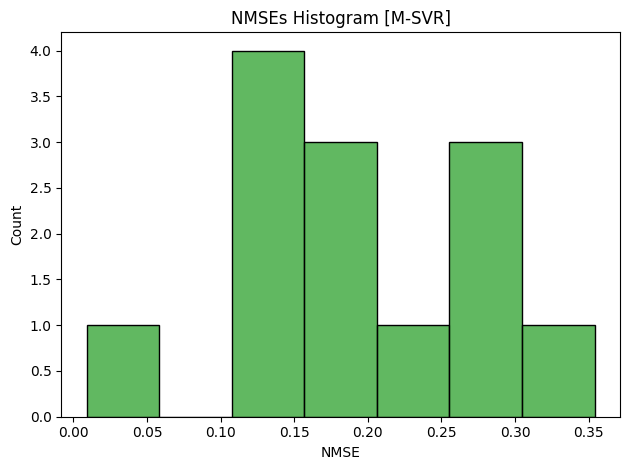

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


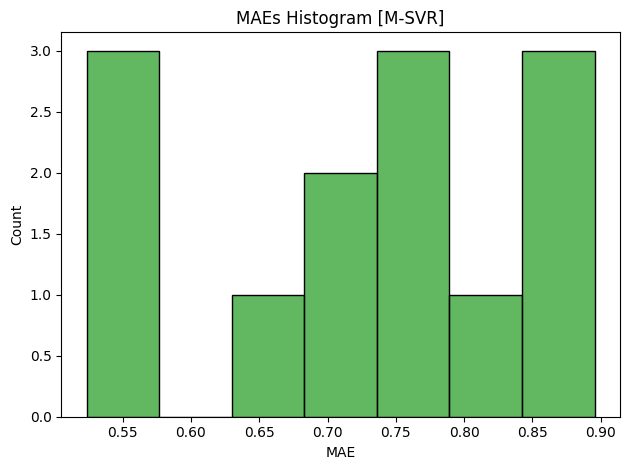

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


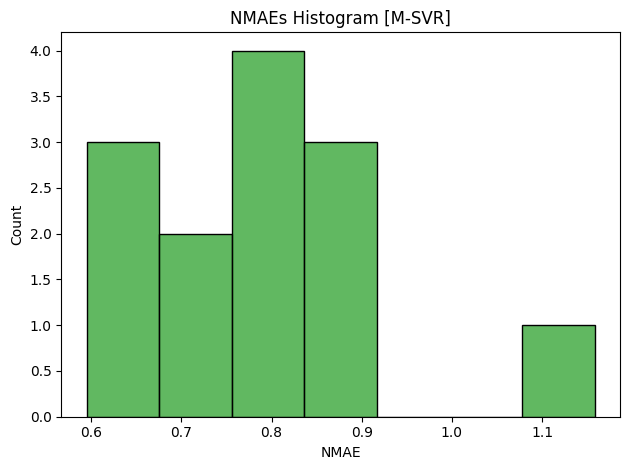

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


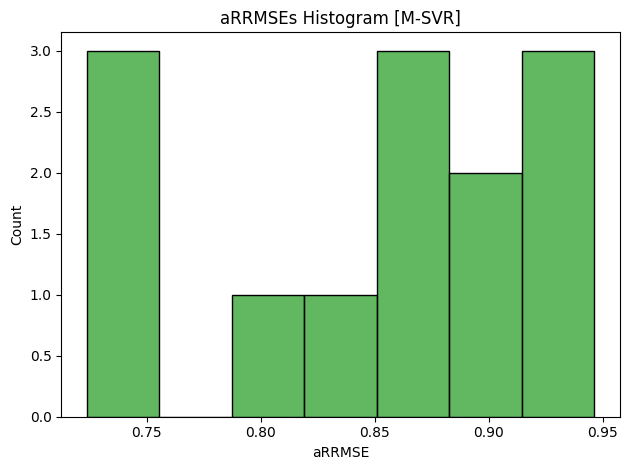

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


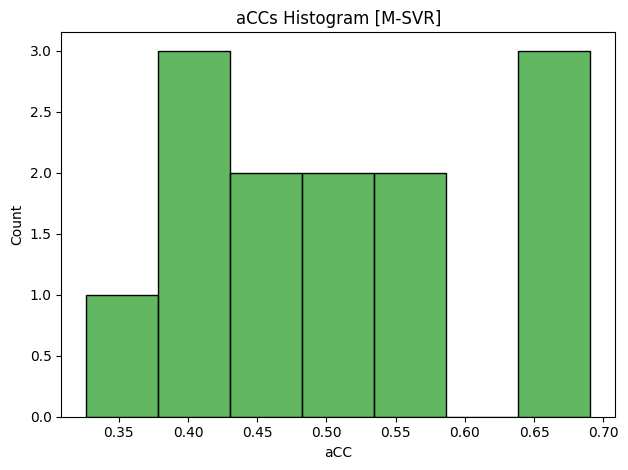

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


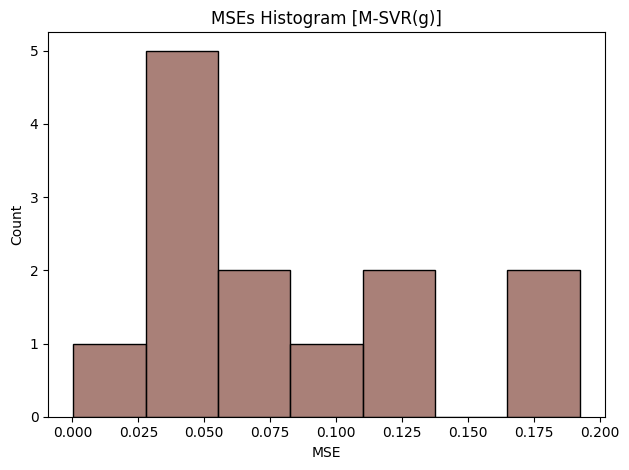

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


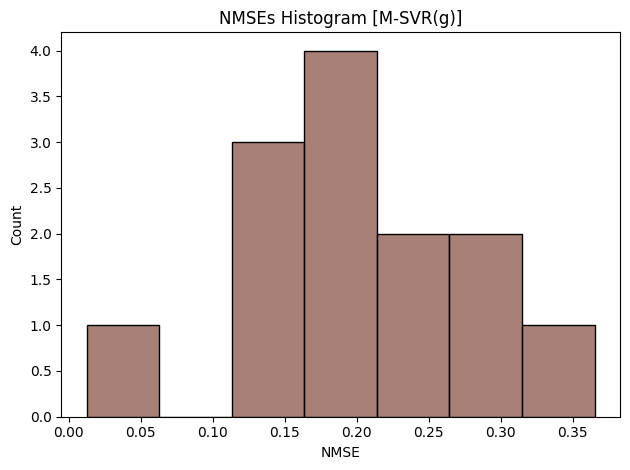

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


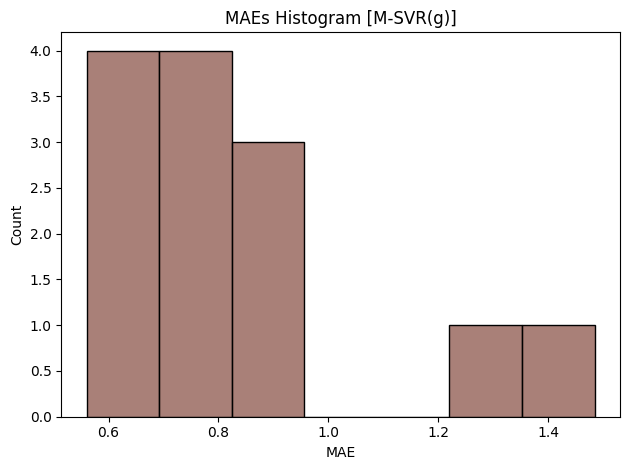

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


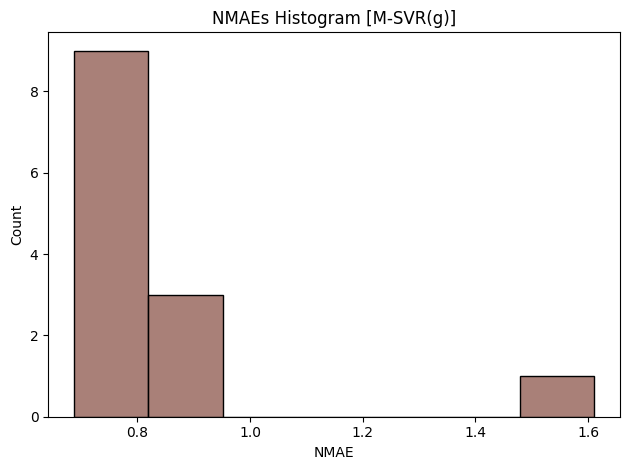

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


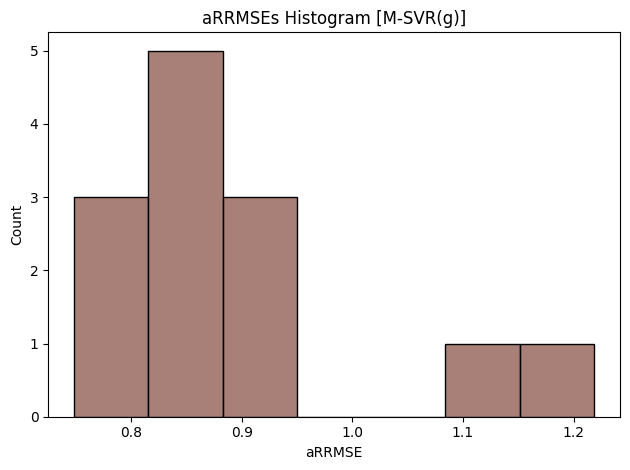

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


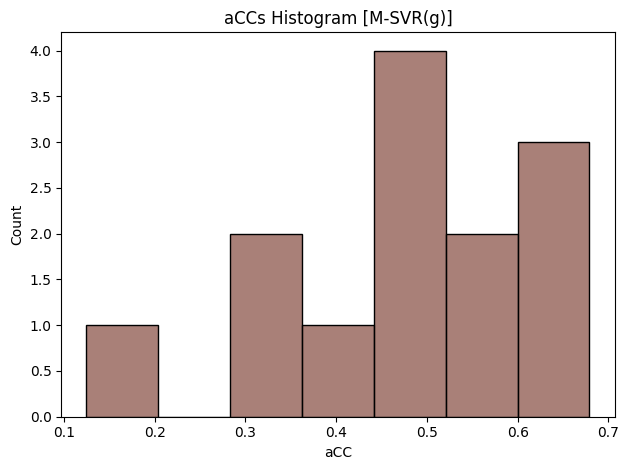

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


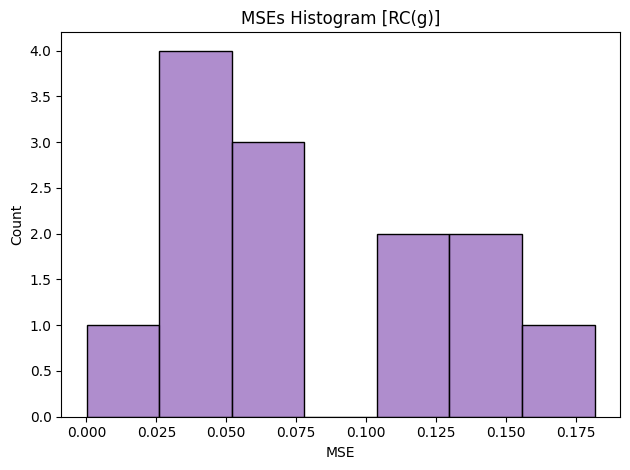

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


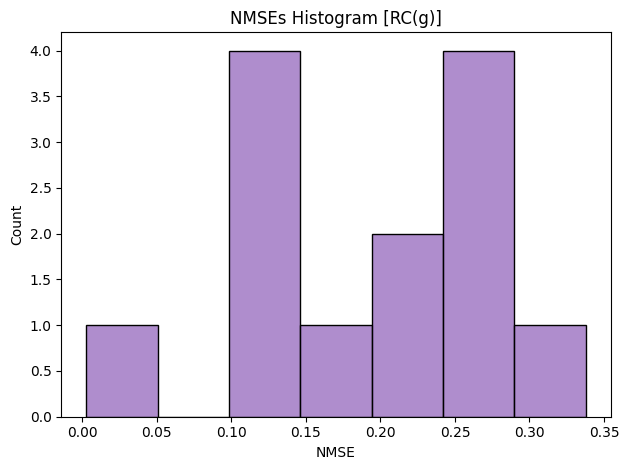

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


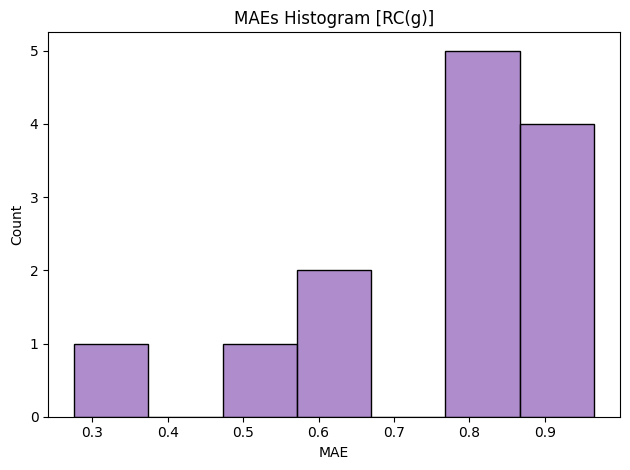

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


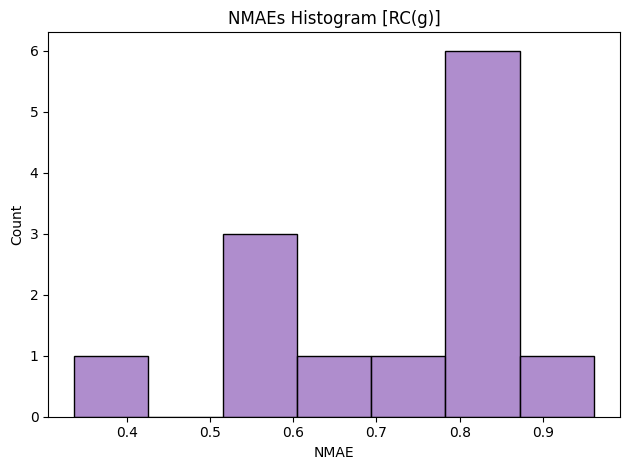

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


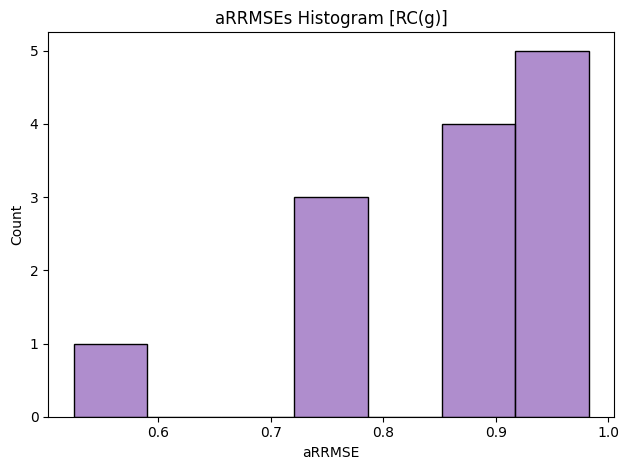

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


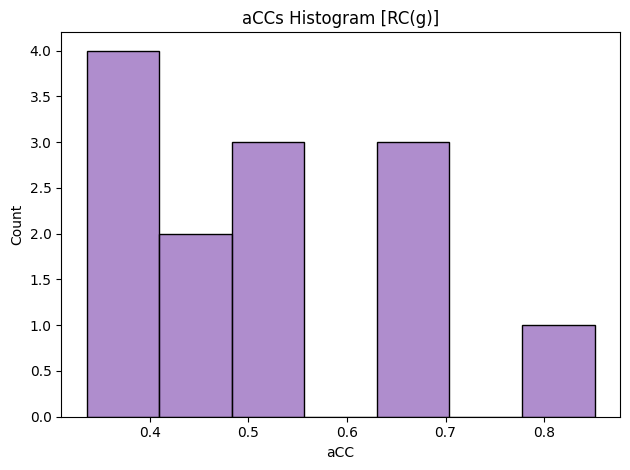

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


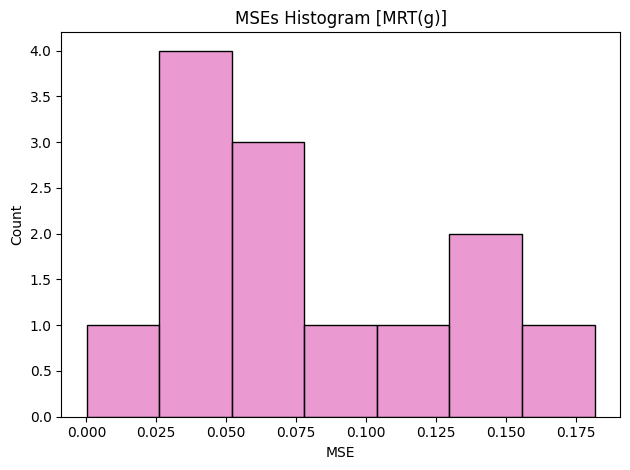

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


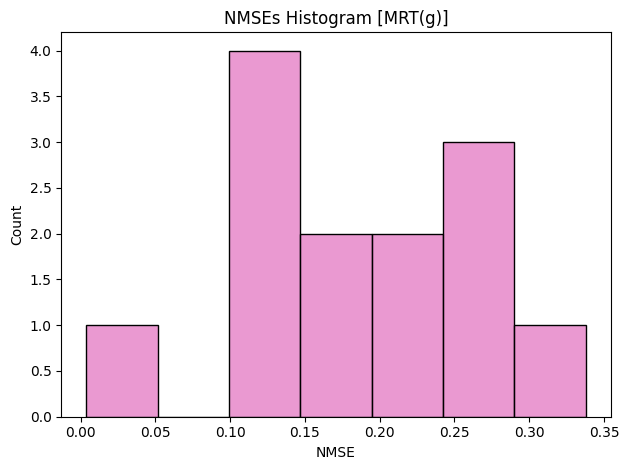

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


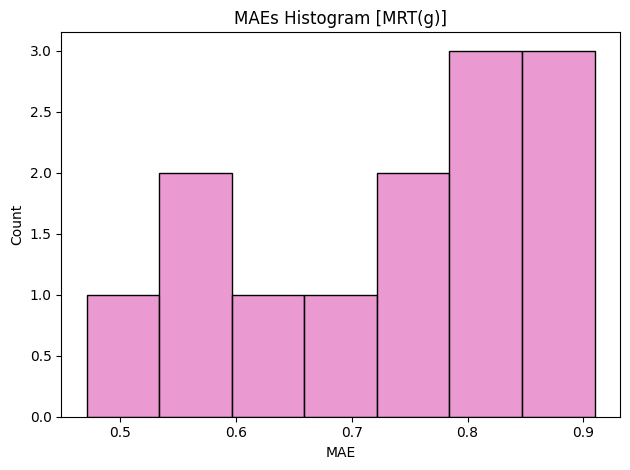

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


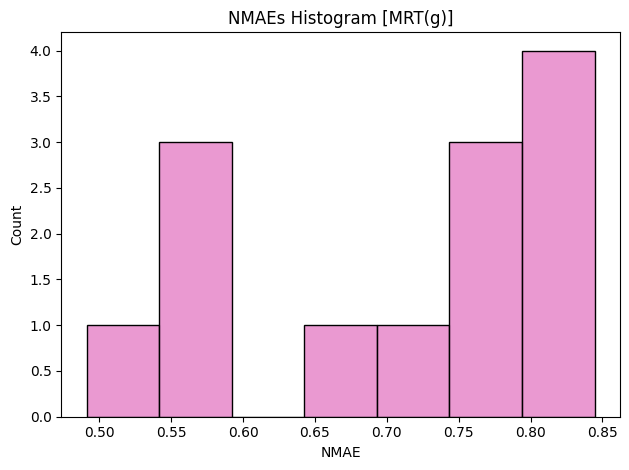

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


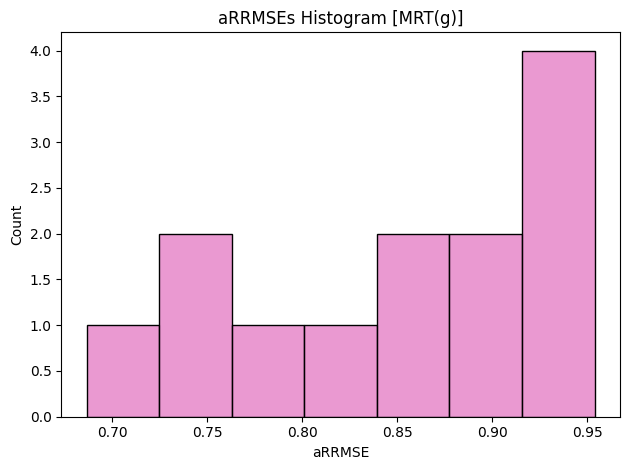

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


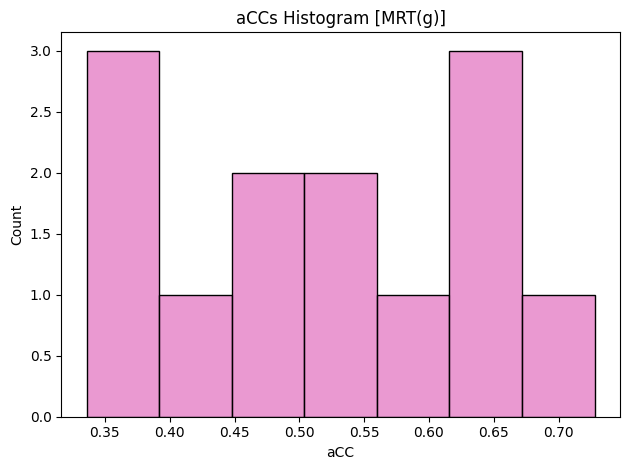

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [56]:
dicio = {'RC': {'color': class_palette[0], 'code': 'RC'},
         'MRT': {'color': class_palette[1], 'code': 'MRT'},
         'ST': {'color': class_palette[3], 'code': 'ST'},
         'M-SVR': {'color': class_palette[2], 'code': 'MSVR'},
         'M-SVR(g)': {'color': class_palette[-2], 'code': 'MSVRG'},
         'RC(g)': {'color': class_palette[-3], 'code': 'RCG'},
         'MRT(g)': {'color': class_palette[-1], 'code': 'MRTG'}}

for a in dicio.keys():
    for mt in ['MSE', 'NMSE', 'MAE', 'NMAE', 'aRRMSE', 'aCC']:
        plt.title(f'{mt}s Histogram [{a}]')
        imgplt = sns.histplot(results_df.loc[results_df['Assessor']==a,['Assessor','Model',mt]], x=mt, bins=7, color=dicio[a]['color'])
        plt.tight_layout()
        plt.show(imgplt)
        imgplt.figure.savefig(f'data/{DIR}/imgs/hg_{dicio[a]["code"]}_{mt.lower()}.eps', format='eps', dpi=300)

In [57]:
results_df

Assessor       Model       MSE       MAE      NMSE      NMAE    aRRMSE  \
0        ST       dtree  0.181723  0.909715  0.337815    0.8446   0.95379   
1        ST         sgd  0.032892  0.565911  0.115303  0.557592  0.752271   
2        ST          lr  0.040547  0.596436  0.131403  0.586247  0.772293   
3        ST         knn  0.116835  0.842509  0.263283  0.798898  0.917883   
4        ST  svm_linear  0.038628  0.576955  0.129083  0.580858  0.759575   
..      ...         ...       ...       ...       ...       ...       ...   
86    RC(g)         kan  0.041679  0.784798  0.133938  0.685187  0.885888   
87    RC(g)     rforest  0.063073  0.824896  0.202312    0.8717  0.908238   
88    RC(g)          gb  0.137709  0.870389  0.270384  0.802271  0.932946   
89    RC(g)        adab  0.000074  0.275801  0.002625  0.336503  0.525168   
90    RC(g)         xgb   0.11083  0.965389  0.275095  0.961565  0.982542   

         aCC  
0   0.335972  
1   0.665716  
2   0.642698  
3   0.422981  
4   0.658345  
..       ...  
86  0.504878  
87  0.509928  
88  0.390141  
89  0.851247  
90  0.392785  

[91 rows x 8 columns]

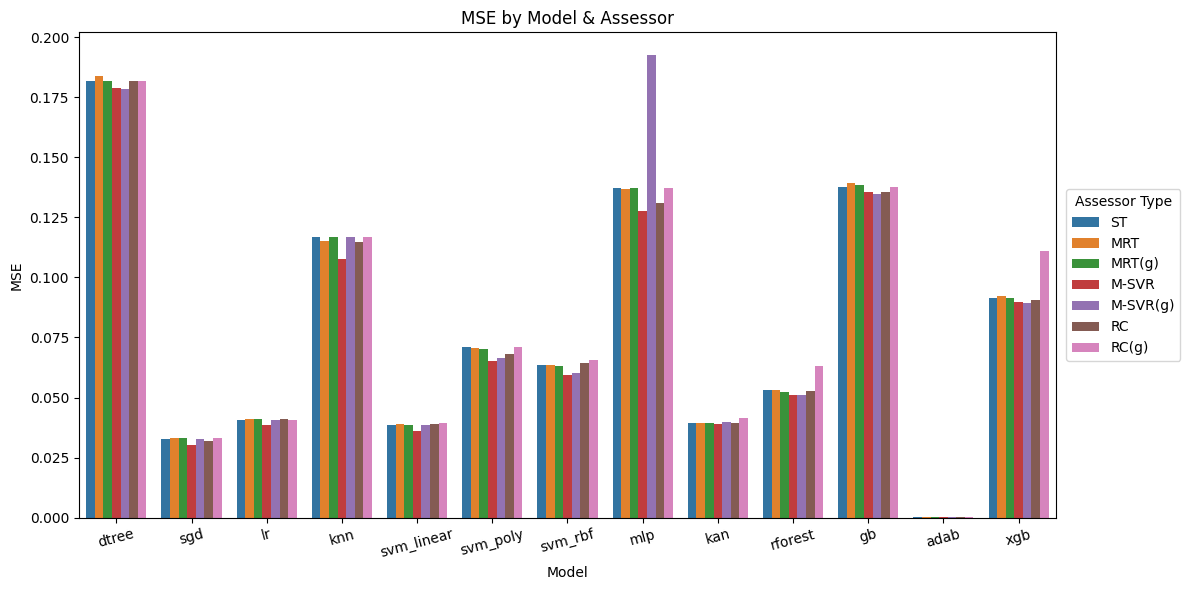

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


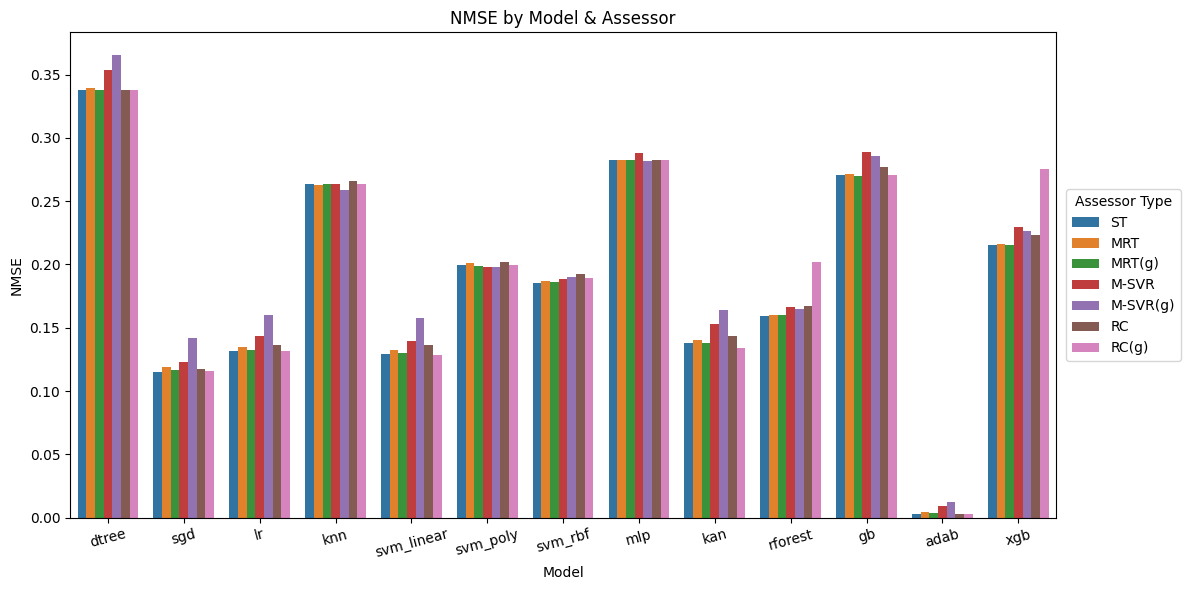

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


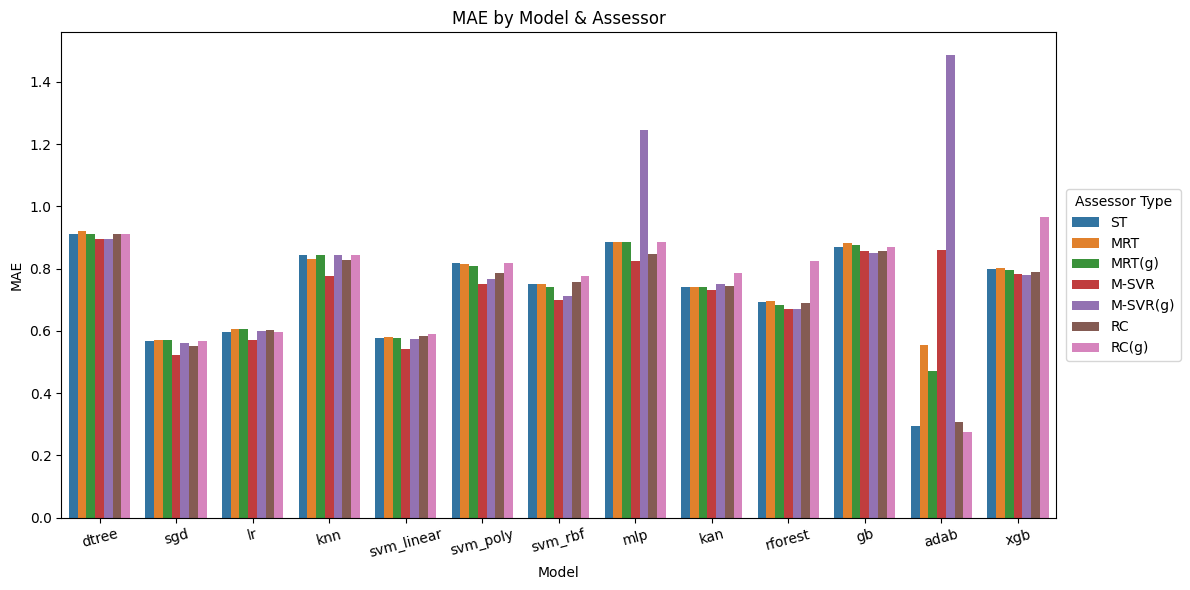

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


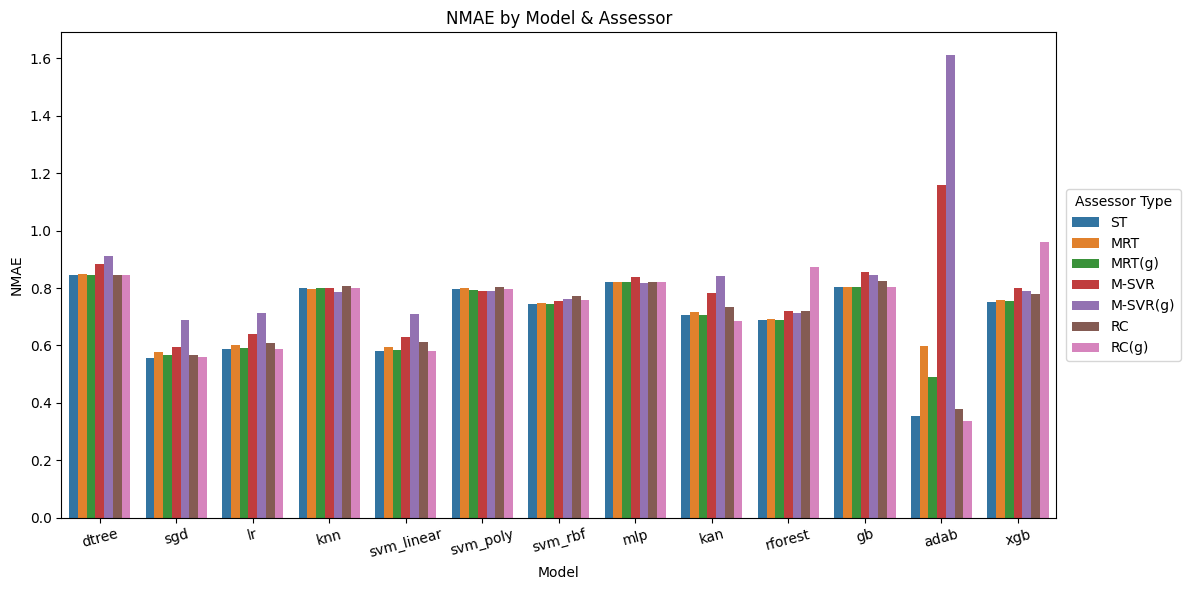

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


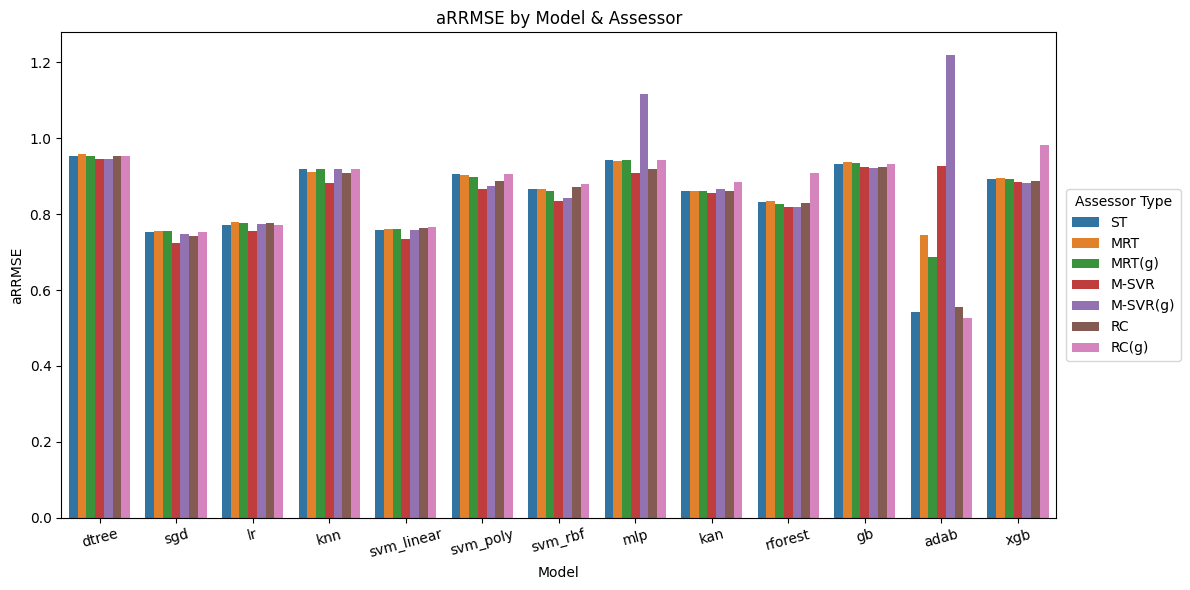

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


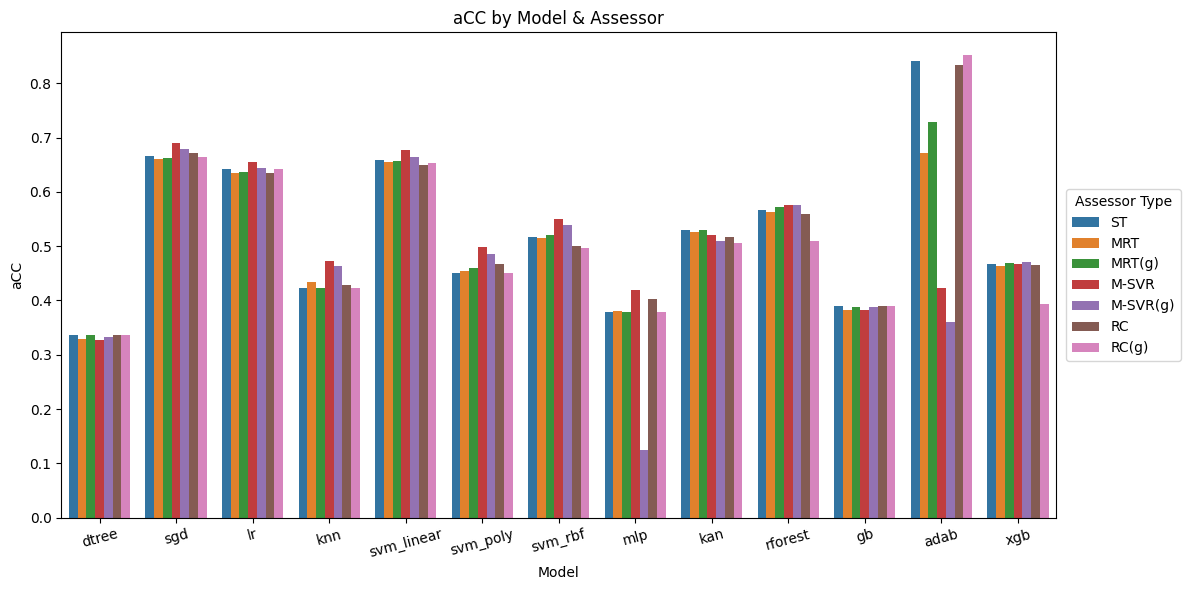

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [58]:
for mt in ['MSE', 'NMSE', 'MAE', 'NMAE', 'aRRMSE', 'aCC']:
    plt.figure(figsize=(12, 6))
    imgplt = sns.barplot(data=results_df, x='Model', y=mt, hue='Assessor', palette=class_palette)
    plt.legend(bbox_to_anchor=(1.01, 0.5), loc='center left', borderaxespad=0, title='Assessor Type')
    plt.title(f'{mt} by Model & Assessor')
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show(imgplt)
    imgplt.figure.savefig(f'data/{DIR}/imgs/bar_{mt.lower()}.eps', format='eps', dpi=300)

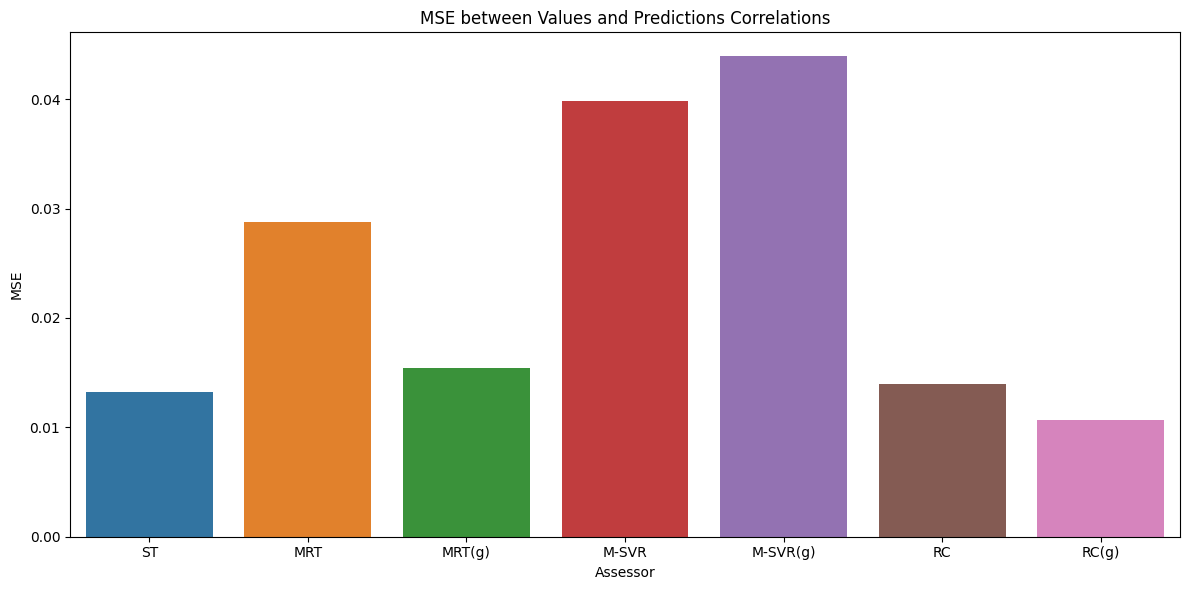

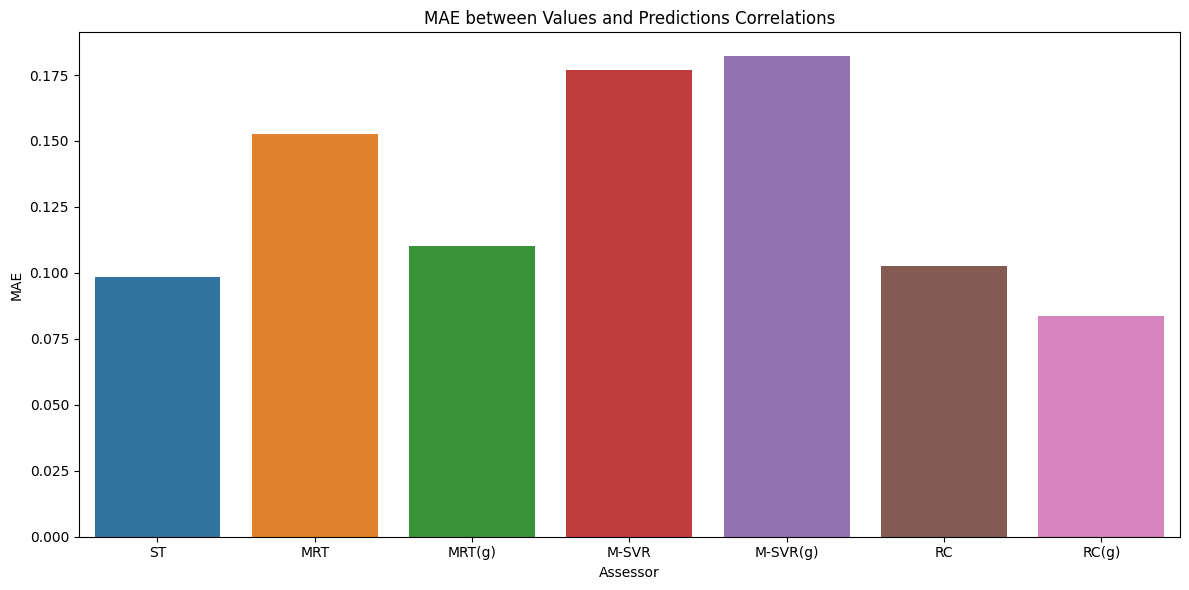

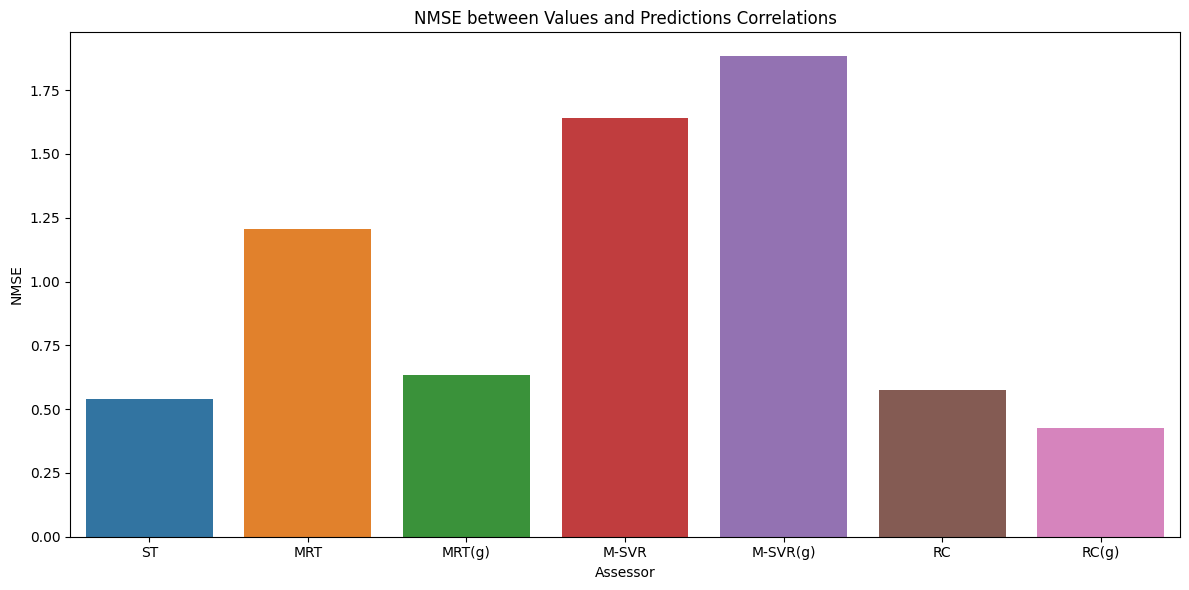

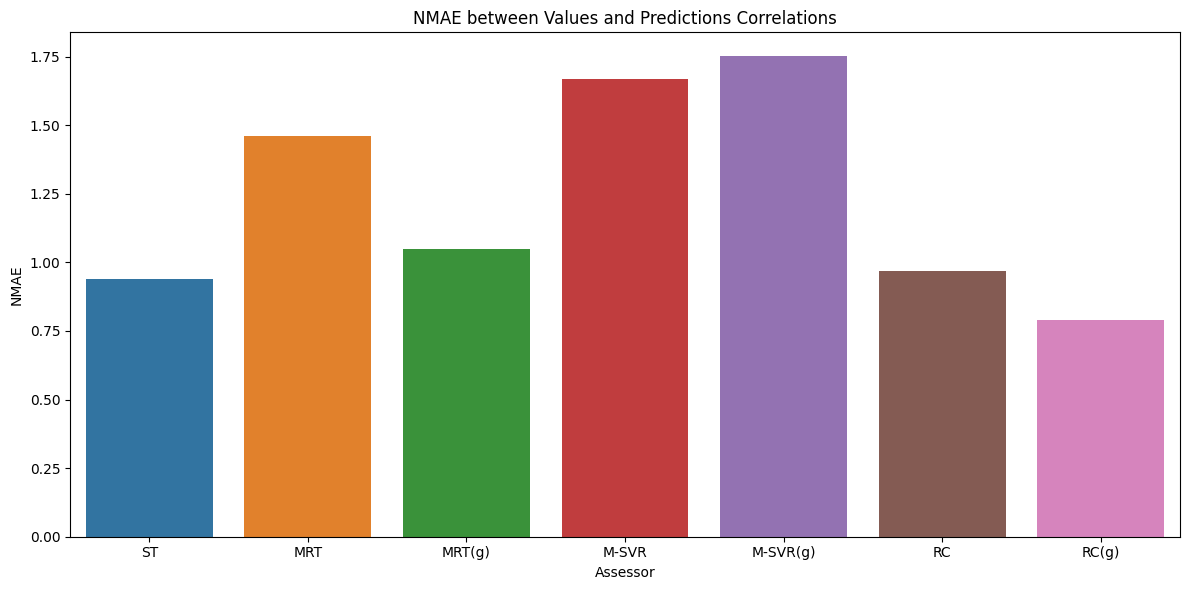

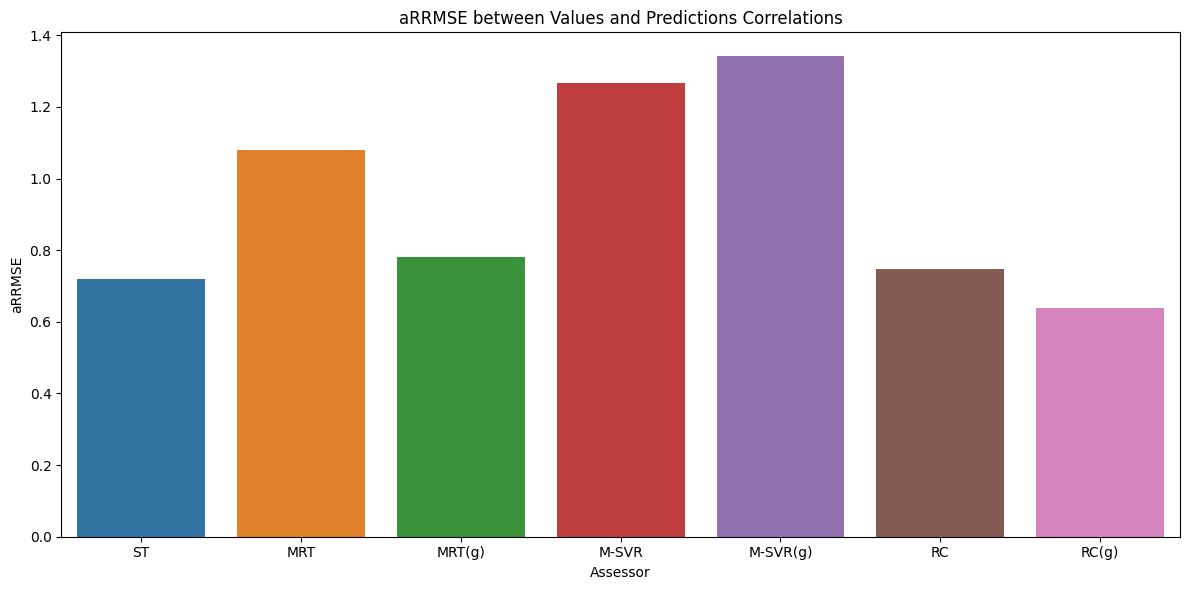

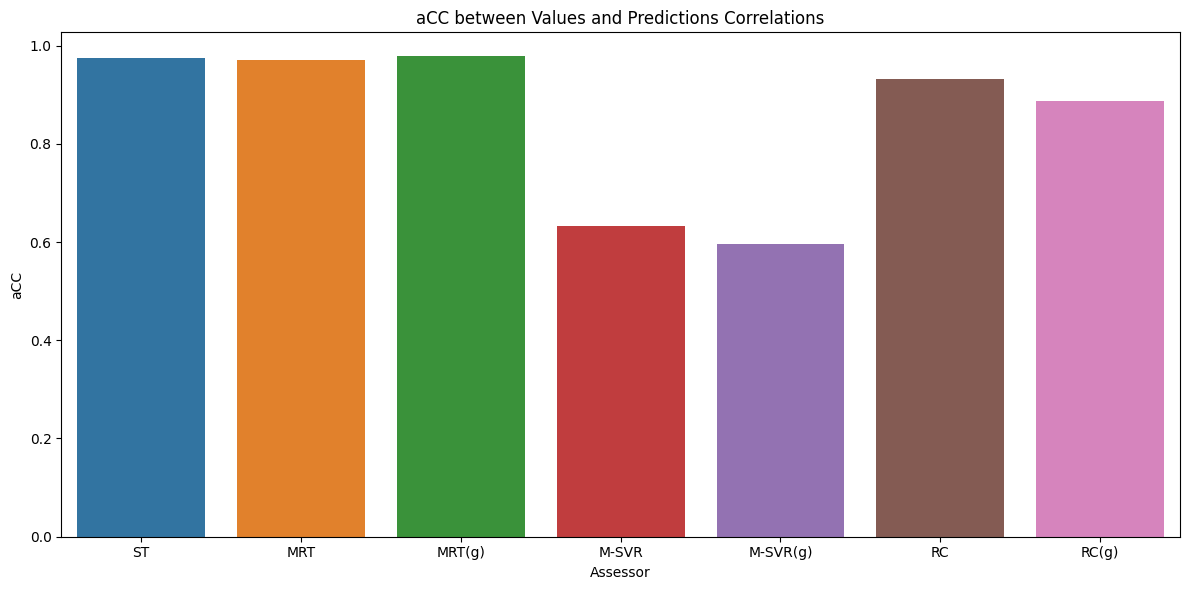

In [59]:
for mt in diff_metrics.columns:
    plt.figure(figsize=(12, 6))
    imgplt = sns.barplot(data=diff_results.loc[:,['Assessor', mt]], x='Assessor', y=mt, hue='Assessor', palette=class_palette)
    plt.title(f"{mt} between Values and Predictions Correlations")
    plt.tight_layout()
    plt.show(imgplt)
    imgplt.figure.savefig(f'data/{DIR}/imgs/bardiff_{mt.lower()}.eps', format='eps', dpi=300)